

$\;$

---
<h2 align="center">MLG Banco (Estudio de creditos buenos)</h2>

### Oscar Julian Layton

----------

**Contexto:** La gerencia de riesgo quiere evaluar si los criterios actuales de aprobación están generando una cartera sana. Al mismo tiempo, el equipo de cobranzas busca entender qué perfiles presentan mayor riesgo de incumplimiento y cómo optimizar la gestión.

Se tienen tres tablas que permiten tener conocimiento de la población:

* **Tabla de solicitud (scores y características del cliente)**:  edad, ocupación, ingresos, scores de crédito (TU, FICO, LexisNexis, Serasa, Unit4), cupo solicitado y aprobado.
* **Tabla de desempeño (seguimiento del crédito)**:  Esta muestra el estado de incumplimiento, gasto mensual, fecha de finalización, canal y resultado de cobranza.
* **Tabla de comportamiento MOB (Months on Book)**:  Esta muestra la evolución mensual del crédito y estado (vigente/incumplido).

In [2]:
require(dplyr)

In [ ]:
getwd()

## Limpieza de datos (p1)

Se procede a realizar mineria de datos con las tablas demográficas de cartera:

In [5]:
library(readxl)
info1 <- read_excel("Datos_Prueba.xlsx", sheet = "Info aplicación")
#names(info1)[names(info1) == "id"] <- "id_1"

info1 <- info1 %>%
  rename(
    id_1 = id,
    Fecha_aplicacion = `Fecha de aplicación`,
    Sexo = Género,
    Ocupacion = Ocupación,
    Ingresos_mensuales = `Ingresos mensuales`,
    Duracion_perfil_de_facebook = `Duración de perfil de Facebook`,
    Cupo_solicitado = `Cupo solicitado`,
    Cupo_aprobado = `Cupo aprobado`
  )


head(info1,n=10)
print("---------------------------------------------------------------------------")
str(info1)

id_1,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,score_FICO_money,score_lexisnexis,score_serasa,score_unit4,Cupo_solicitado,Cupo_aprobado
<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86423388,2022-01-05,Bogotá,38,male,Ama de casa,1407,4-12 meses,888,820,654,555,698,18783,11700
86550634,2022-07-28,Barranquilla,59,female,Pensionado,2312,4-12 meses,386,887,791,835,483,26725,20900
84304572,2022-10-19,Bogotá,49,male,Empleado,2349,3+ años,891,896,891,751,856,12426,10300
82234489,2019-06-28,Medellín,35,male,Ama de casa,3830,4-12 meses,708,745,323,719,864,3148,2200
89958614,2019-08-26,Medellín,50,female,Pensionado,2195,<4 meses,680,816,339,493,891,24670,14900
89524682,2022-03-04,Medellín,31,male,Independiente,2428,<4 meses,773,306,612,521,891,23494,18900
87204212,2021-05-26,Bogotá,23,male,Empleado,3860,1-3 años,384,336,665,497,657,15517,11700
89628519,2021-06-20,Medellín,28,male,Pensionado,2277,<4 meses,771,545,529,351,848,12990,11400
84472471,2019-10-07,Bogotá,63,female,Pensionado,2347,4-12 meses,659,798,618,707,864,6289,4100


[1] "---------------------------------------------------------------------------"
tibble [10,000 × 15] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:10000] 86423388 86550634 84304572 82234489 89958614 ...
 $ Fecha_aplicacion           : POSIXct[1:10000], format: "2022-01-05" "2022-07-28" ...
 $ Ciudad                     : chr [1:10000] "Bogotá" "Barranquilla" "Bogotá" "Medellín" ...
 $ Edad                       : num [1:10000] 38 59 49 35 50 31 23 28 63 37 ...
 $ Sexo                       : chr [1:10000] "male" "female" "male" "male" ...
 $ Ocupacion                  : chr [1:10000] "Ama de casa" "Pensionado" "Empleado" "Ama de casa" ...
 $ Ingresos_mensuales         : num [1:10000] 1407 2312 2349 3830 2195 ...
 $ Duracion_perfil_de_facebook: chr [1:10000] "4-12 meses" "4-12 meses" "3+ años" "4-12 meses" ...
 $ score_TU                   : num [1:10000] 888 386 891 708 680 773 384 771 659 610 ...
 $ score_FICO_money           : num [1:10000] 820 887 896 745 816 

In [6]:
info_limpia <- info1 %>% distinct()
str(info_limpia)

tibble [10,000 × 15] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:10000] 86423388 86550634 84304572 82234489 89958614 ...
 $ Fecha_aplicacion           : POSIXct[1:10000], format: "2022-01-05" "2022-07-28" ...
 $ Ciudad                     : chr [1:10000] "Bogotá" "Barranquilla" "Bogotá" "Medellín" ...
 $ Edad                       : num [1:10000] 38 59 49 35 50 31 23 28 63 37 ...
 $ Sexo                       : chr [1:10000] "male" "female" "male" "male" ...
 $ Ocupacion                  : chr [1:10000] "Ama de casa" "Pensionado" "Empleado" "Ama de casa" ...
 $ Ingresos_mensuales         : num [1:10000] 1407 2312 2349 3830 2195 ...
 $ Duracion_perfil_de_facebook: chr [1:10000] "4-12 meses" "4-12 meses" "3+ años" "4-12 meses" ...
 $ score_TU                   : num [1:10000] 888 386 891 708 680 773 384 771 659 610 ...
 $ score_FICO_money           : num [1:10000] 820 887 896 745 816 306 336 545 798 814 ...
 $ score_lexisnexis           : num [1:10000] 654 791 891 

In [7]:
dup_vals <- names(table(info1$id_1))[table(info1$id_1) > 1]
dup_vals

[1] "87073575" "87156406"

La anterior salida indica la existencia de observaciones duplicadas

* id1: **87073575**
* id2 : **87156406**

observese los registros correspondientes:

In [8]:
info_duplicados <- info1 %>% 
  filter(id_1 %in% dup_vals)

info_duplicados

id_1,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,score_FICO_money,score_lexisnexis,score_serasa,score_unit4,Cupo_solicitado,Cupo_aprobado
<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87156406,2022-10-29,Bucaramanga,21,male,Independiente,511,4-12 meses,417,590,485,555,310,24299,21700
87156406,2022-10-29,Bucaramanga,21,male,Independiente,511,4-12 meses,417,590,485,555,350,24299,21700
87073575,2020-11-28,Cali,43,male,Independiente,1895,<4 meses,515,484,696,314,620,21003,12800
87073575,2020-11-28,Cali,43,male,Independiente,1895,<4 meses,515,484,696,314,646,21003,12800


Los anteriores registros indican que difieren del *score_unit4*, se procede a imputar por la media aritmética en estos dos registros.

In [9]:
info1 <- info1 %>%
  group_by(id_1) %>%
  summarise(
    score_unit4 = mean(score_unit4, na.rm = TRUE),
    across(-score_unit4, first),   # Conserva la primera aparición de todas las demás columnas
    .groups = "drop"
  )

In [10]:
info_duplicados <- info1 %>% 
  filter(id_1 %in% dup_vals)

info_duplicados

id_1,score_unit4,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,score_FICO_money,score_lexisnexis,score_serasa,Cupo_solicitado,Cupo_aprobado
<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87073575,633,2020-11-28,Cali,43,male,Independiente,1895,<4 meses,515,484,696,314,21003,12800
87156406,330,2022-10-29,Bucaramanga,21,male,Independiente,511,4-12 meses,417,590,485,555,24299,21700


In [11]:
str(info1)

tibble [9,998 × 15] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:9998] 8e+07 8e+07 8e+07 8e+07 8e+07 ...
 $ score_unit4                : num [1:9998] 858 678 753 532 655 890 846 859 687 762 ...
 $ Fecha_aplicacion           : POSIXct[1:9998], format: "2019-01-18" "2022-06-09" ...
 $ Ciudad                     : chr [1:9998] "Cali" "Bogotá" "Barranquilla" "Bogotá" ...
 $ Edad                       : num [1:9998] 50 27 31 19 20 21 57 25 57 44 ...
 $ Sexo                       : chr [1:9998] "male" "female" "female" "male" ...
 $ Ocupacion                  : chr [1:9998] "Empleado" "Independiente" "Estudiante" "Ama de casa" ...
 $ Ingresos_mensuales         : num [1:9998] 3017 636 1631 2706 3172 ...
 $ Duracion_perfil_de_facebook: chr [1:9998] "1-3 años" "4-12 meses" "3+ años" "4-12 meses" ...
 $ score_TU                   : num [1:9998] 694 769 685 562 355 683 796 644 743 871 ...
 $ score_FICO_money           : num [1:9998] 740 740 536 799 466 599 652 786 355 502 ..

## Limpieza de datos (p2)
Se procede a realizar mineria con tabla de desempeño:

In [12]:
info2 <- read_excel("Datos_Prueba.xlsx", sheet = "Desempeño")
#names(info2)[names(info2) == "id"] <- "id_2"

info2 <- info2 %>%
  rename(
    id_2 = id,
    Gasto_mensual = `Gasto mensual`,
    Cliente_hasta = `Cliente hasta`,
    Canal_cobranza = `Canal de cobranza`,
    Resultado_cobranza = `Resultado cobranza`
  )

head(info2,n=10)

id_2,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>
86423388,FALSO,1570,2023-02-03,Ninguno,No aplica
86550634,VERDADERO,3063,2023-09-21,Correo,No contactado
84304572,FALSO,1447,2024-03-18,Ninguno,No aplica
82234489,FALSO,613,2020-02-28,Ninguno,No aplica
89958614,FALSO,3633,2021-06-19,Ninguno,No aplica
89524682,FALSO,2926,2024-03-21,Ninguno,No aplica
87204212,FALSO,3462,2023-10-21,Ninguno,No aplica
89628519,FALSO,2244,2022-12-01,Ninguno,No aplica
84472471,FALSO,1201,2022-01-12,Ninguno,No aplica


In [13]:
info_duplicados2 <- info2 %>% 
  filter(id_2 %in% dup_vals)

info_duplicados2

id_2,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>
87156406,VERDADERO,2366,2024-07-03,Correo,Promesa de pago
87156406,VERDADERO,1309,2020-07-01,Ninguno,No aplica
87073575,FALSO,6127,2022-06-03,Ninguno,No aplica
87073575,FALSO,4335,2022-01-18,Call center,No contactado


In [14]:
info2 <- info2 %>%
  group_by(id_2) %>%
  arrange(desc(`Cliente_hasta`)) %>%  # esta linea me permite ordenar los registros desde más reciente a más antigua
  slice(1) %>%                        # Toma solo la primera (más reciente)
  ungroup()

In [15]:
info2 %>% 
  filter(id_2 %in% dup_vals)

id_2,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>
87073575,FALSO,6127,2022-06-03,Ninguno,No aplica
87156406,VERDADERO,2366,2024-07-03,Correo,Promesa de pago


Nos quedamos con los datos más recientes

In [16]:
str(info2)

tibble [9,998 × 6] (S3: tbl_df/tbl/data.frame)
 $ id_2              : num [1:9998] 8e+07 8e+07 8e+07 8e+07 8e+07 ...
 $ Incumplido        : chr [1:9998] "FALSO" "FALSO" "FALSO" "VERDADERO" ...
 $ Gasto_mensual     : num [1:9998] 6348 7434 10913 6928 4014 ...
 $ Cliente_hasta     : POSIXct[1:9998], format: "2020-05-25" "2024-09-02" ...
 $ Canal_cobranza    : chr [1:9998] "Ninguno" "Ninguno" "Ninguno" "Call center" ...
 $ Resultado_cobranza: chr [1:9998] "No aplica" "No aplica" "No aplica" "No contactado" ...


## Limpieza de datos (p3)

Se procede a realizar mineria con tabla MOB mensual:

In [17]:
info3 <- read_excel("Datos_Prueba.xlsx", sheet = "MOB mensual")
names(info3)[names(info3) == "id"] <- "id_3"

set.seed(123)
muestra <- sample_n(info3, 5)
muestra

id_3,MOB,Estado
<dbl>,<dbl>,<chr>
83305742,9,VIGENTE
83033932,16,VIGENTE
86292357,7,VIGENTE
88580504,21,VIGENTE
82050241,21,VIGENTE


* Cantidad de obsservaciones o cantidad de meses con creditos (ordenados por mayor frecuencia).

In [18]:
freq_id <- as.data.frame(table(info3$id_3))
colnames(freq_id) <- c("info3", "frecuencia")

freq_id <- freq_id %>%
  arrange(desc(frecuencia))

head(freq_id)   # Muestra los más frecuentes

,info3,frecuencia
,<fct>,<int>
1,87073575,50
2,87156406,50
3,80000037,25
4,80000917,25
5,80003196,25
6,80004011,25


In [19]:
info3[info3$id_3 == 87073575, ]

id_3,MOB,Estado
<dbl>,<dbl>,<chr>
87073575,0,VIGENTE
87073575,1,VIGENTE
87073575,2,VIGENTE
87073575,3,VIGENTE
87073575,4,VIGENTE
87073575,5,VIGENTE
87073575,6,VIGENTE
87073575,7,VIGENTE
87073575,8,VIGENTE


* En la salida anterior se observa que el cliente 87073575, tiene históricamente dos créditos. La cantidad de MOB==0 por clientes indican la cantidad de créditos:

In [20]:
library(dplyr)

creditos_por_id <- info3 %>%
  group_by(id_3) %>%
  summarise(
    frecuencia_creditos = sum(MOB == 0, na.rm = TRUE)
  ) %>%
  arrange(desc(frecuencia_creditos))

head(creditos_por_id, n=7)   #observemos los 7 primeros clientes para observar los que tienen más creditos.

id_3,frecuencia_creditos
<dbl>,<int>
87073575,2
87156406,2
80000037,1
80000917,1
80003196,1
80004011,1
80004138,1


* Calculando la cantidad de cumplimientos y cantidad de incumplimientos por cliente:

In [21]:
creditos_por_id <- info3 %>%
  group_by(id_3) %>%
  summarise(
    cantidad_creditos = sum(MOB == 0, na.rm = TRUE),  # cantidad de créditos
    n_incumplimientos = sum(Estado == "INCUMPLIDO", na.rm = TRUE),  # meses en incumplimiento
    n_cumplimientos = sum(Estado == "VIGENTE", na.rm = TRUE),     # meses vigentes
    .groups = "drop"
  ) %>%
  arrange(desc(cantidad_creditos))

head(creditos_por_id, n=6)  #imprimo los primeros 6 registros

id_3,cantidad_creditos,n_incumplimientos,n_cumplimientos
<dbl>,<int>,<int>,<int>
87073575,2,22,28
87156406,2,22,28
80000037,1,0,25
80000917,1,0,25
80003196,1,0,25
80004011,1,21,4


Se observan dos id_clientes con 50 MOB, para estos dos clientes se tienen MOB==0 lo cual significa que tinen dos creditos diferentes.
* id: 87073575 
* id: 87156406

In [22]:
str(creditos_por_id)

tibble [9,998 × 4] (S3: tbl_df/tbl/data.frame)
 $ id_3             : num [1:9998] 87073575 87156406 80000037 80000917 80003196 ...
 $ cantidad_creditos: int [1:9998] 2 2 1 1 1 1 1 1 1 1 ...
 $ n_incumplimientos: int [1:9998] 22 22 0 0 0 21 0 0 0 0 ...
 $ n_cumplimientos  : int [1:9998] 28 28 25 25 25 4 25 25 25 25 ...


## Limpieza de datos (p4)  (Consolidación de tabla unica)

El conjunto de información se encuentra distribuido en tres tablas con diferentes características, se procede a unir esta información en una tabla consolidada:


In [23]:
datos1 <- left_join(info1, info2, by = c("id_1" = "id_2"))
print(dim(datos1))
sample_n(datos1,6)

[1] 9998   20


id_1,score_unit4,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,score_FICO_money,score_lexisnexis,score_serasa,Cupo_solicitado,Cupo_aprobado,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza
<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>
84735524,872,2022-09-30,Bogotá,25,male,Ama de casa,2024,4-12 meses,722,756,355,600,1340,1200,FALSO,128,2023-01-30,Ninguno,No aplica
86688304,861,2019-04-07,Bogotá,62,male,Empleado,1696,4-12 meses,805,491,561,375,22048,19200,FALSO,5873,2021-02-18,Ninguno,No aplica
89830553,650,2020-11-25,Bogotá,41,female,Independiente,2000,1-3 años,506,846,419,421,16021,15800,FALSO,8493,2022-02-26,Ninguno,No aplica
82740855,870,2020-02-12,Cali,63,male,Pensionado,2477,4-12 meses,839,488,363,433,17998,11600,FALSO,6023,2020-06-22,Ninguno,No aplica
85053929,335,2019-08-04,Bucaramanga,66,male,Ama de casa,1411,4-12 meses,567,896,407,457,25475,23800,VERDADERO,7635,2019-10-15,Ninguno,Promesa de pago
89129773,544,2022-07-29,Bucaramanga,43,male,Estudiante,930,1-3 años,782,623,579,651,22873,21400,VERDADERO,10719,2024-08-20,Ninguno,No aplica


In [24]:
datos2 <- left_join(datos1, creditos_por_id, by = c("id_1" = "id_3"))
sample_n(datos2,6)

id_1,score_unit4,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,⋯,Cupo_solicitado,Cupo_aprobado,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza,cantidad_creditos,n_incumplimientos,n_cumplimientos
<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<int>,<int>,<int>
89188066,867,2021-09-18,Medellín,28,male,Pensionado,1883,<4 meses,819,⋯,7677,6700,FALSO,3974,2023-09-16,Ninguno,No aplica,1,0,25
82863793,891,2022-08-05,Medellín,32,male,Pensionado,1948,4-12 meses,721,⋯,18769,12100,FALSO,7237,2023-12-21,Ninguno,No aplica,1,0,25
86113790,513,2021-09-12,Bogotá,64,male,Pensionado,1634,4-12 meses,539,⋯,26510,20200,VERDADERO,4923,2021-10-18,Whatsapp,Sin gestión,1,20,5
82565513,467,2019-09-16,Bogotá,47,male,Estudiante,939,4-12 meses,370,⋯,13909,9700,VERDADERO,1477,2020-03-14,Ninguno,Pago parcial,1,21,4
89647720,898,2020-02-25,Medellín,68,female,Estudiante,3017,4-12 meses,877,⋯,10001,8500,FALSO,4466,2020-04-29,Ninguno,No aplica,1,0,25
89982394,890,2021-05-10,Medellín,34,male,Independiente,2284,<4 meses,830,⋯,16912,14700,FALSO,3541,2021-09-06,Ninguno,No aplica,1,0,25


In [25]:
glimpse(datos2)

Rows: 9,998
Columns: 23
$ id_1                        <dbl> 80000037, 80000917, 80003196, 80004011, 80…
$ score_unit4                 <dbl> 858, 678, 753, 532, 655, 890, 846, 859, 68…
$ Fecha_aplicacion            <dttm> 2019-01-18, 2022-06-09, 2021-01-15, 2019-…
$ Ciudad                      <chr> "Cali", "Bogotá", "Barranquilla", "Bogotá"…
$ Edad                        <dbl> 50, 27, 31, 19, 20, 21, 57, 25, 57, 44, 48…
$ Sexo                        <chr> "male", "female", "female", "male", "femal…
$ Ocupacion                   <chr> "Empleado", "Independiente", "Estudiante",…
$ Ingresos_mensuales          <dbl> 3017, 636, 1631, 2706, 3172, 2398, 2565, 3…
$ Duracion_perfil_de_facebook <chr> "1-3 años", "4-12 meses", "3+ años", "4-12…
$ score_TU                    <dbl> 694, 769, 685, 562, 355, 683, 796, 644, 74…
$ score_FICO_money            <dbl> 740, 740, 536, 799, 466, 599, 652, 786, 35…
$ score_lexisnexis            <dbl> 528, 615, 708, 427, 714, 884, 416, 662, 74…
$ score_serasa  

# Consolidacion de tablas (p5) (limpieza)

In [141]:
names(datos2)

[1] "Ciudad"                      "Edad"                       
 [3] "Sexo"                        "Ocupacion"                  
 [5] "Ingresos_mensuales"          "Duracion_perfil_de_facebook"
 [7] "score_TU"                    "score_FICO_money"           
 [9] "score_lexisnexis"            "score_serasa"               
[11] "Cupo_solicitado"             "Cupo_aprobado"              
[13] "Gasto_mensual"               "Canal_cobranza"             
[15] "Resultado_cobranza"          "cantidad_creditos"          
[17] "anio_cliente_hasta"          "mes_cliente_hasta"          
[19] "anio_fecha_aplicacion"       "mes_fecha_aplicacion"       
[21] "Incumplido_dummy"            "prob_incumplimiento"        
[23] "segmento_riesgo"             "cupo_maximo"                
[25] "riesgo_segmento"

In [31]:
library(dplyr)

# Limpieza general
d_ <- datos2 %>%
  mutate(
    Fecha_de_aplicacion = as.Date(Fecha_aplicacion),
    Cliente_hasta = as.Date(Cliente_hasta),
    Ciudad = trimws(Ciudad),
    Sexo = factor(Sexo),
    Ocupacion = factor(Ocupacion)
  )
head(d_)

id_1,score_unit4,Fecha_aplicacion,Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,⋯,Cupo_aprobado,Incumplido,Gasto_mensual,Cliente_hasta,Canal_cobranza,Resultado_cobranza,cantidad_creditos,n_incumplimientos,n_cumplimientos,Fecha_de_aplicacion
<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<int>,<int>,<int>,<date>
80000037,858,2019-01-18,Cali,50,male,Empleado,3017,1-3 años,694,⋯,15300,FALSO,6348,2020-05-25,Ninguno,No aplica,1,0,25,2019-01-18
80000917,678,2022-06-09,Bogotá,27,female,Independiente,636,4-12 meses,769,⋯,12600,FALSO,7434,2024-09-02,Ninguno,No aplica,1,0,25,2022-06-09
80003196,753,2021-01-15,Barranquilla,31,female,Estudiante,1631,3+ años,685,⋯,23300,FALSO,10913,2021-08-07,Ninguno,No aplica,1,0,25,2021-01-15
80004011,532,2019-09-24,Bogotá,19,male,Ama de casa,2706,4-12 meses,562,⋯,20600,VERDADERO,6928,2022-01-03,Call center,No contactado,1,21,4,2019-09-24
80004138,655,2020-05-14,Bogotá,20,female,Pensionado,3172,<4 meses,355,⋯,13600,FALSO,4014,2021-04-02,Ninguno,No aplica,1,0,25,2020-05-14
80004677,890,2020-09-21,Cali,21,female,Independiente,2398,1-3 años,683,⋯,12700,FALSO,6535,2023-05-30,Ninguno,No aplica,1,0,25,2020-09-21


In [32]:
datos2 <- datos2 %>%
  mutate(
    Cliente_hasta = as.Date(Cliente_hasta),
  )

# Integración de solicitud y desempeño
datos_riesgo <- d_ %>%
  left_join(datos2, by = "id_1")

In [33]:
str(datos2)

tibble [9,998 × 23] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:9998] 8e+07 8e+07 8e+07 8e+07 8e+07 ...
 $ score_unit4                : num [1:9998] 858 678 753 532 655 890 846 859 687 762 ...
 $ Fecha_aplicacion           : POSIXct[1:9998], format: "2019-01-18" "2022-06-09" ...
 $ Ciudad                     : chr [1:9998] "Cali" "Bogotá" "Barranquilla" "Bogotá" ...
 $ Edad                       : num [1:9998] 50 27 31 19 20 21 57 25 57 44 ...
 $ Sexo                       : chr [1:9998] "male" "female" "female" "male" ...
 $ Ocupacion                  : chr [1:9998] "Empleado" "Independiente" "Estudiante" "Ama de casa" ...
 $ Ingresos_mensuales         : num [1:9998] 3017 636 1631 2706 3172 ...
 $ Duracion_perfil_de_facebook: chr [1:9998] "1-3 años" "4-12 meses" "3+ años" "4-12 meses" ...
 $ score_TU                   : num [1:9998] 694 769 685 562 355 683 796 644 743 871 ...
 $ score_FICO_money           : num [1:9998] 740 740 536 799 466 599 652 786 355 502 ..

In [34]:
datos2$anio_cliente_hasta <- as.integer(format(datos2$Cliente_hasta, "%Y"))
datos2$mes_cliente_hasta  <- as.integer(format(datos2$Cliente_hasta, "%m"))

In [35]:
datos2$Fecha_aplicacion <- as.Date(datos2$Fecha_aplicacion)

datos2$anio_fecha_aplicacion <- as.integer(format(datos2$Cliente_hasta, "%Y"))
datos2$mes_fecha_aplicacion  <- as.integer(format(datos2$Cliente_hasta, "%m"))

In [36]:
# Valores faltantes en los datos compilados
colSums(is.na(datos2))

id_1                 score_unit4 
                          0                           0 
           Fecha_aplicacion                      Ciudad 
                          0                           0 
                       Edad                        Sexo 
                          0                           0 
                  Ocupacion          Ingresos_mensuales 
                          0                           0 
Duracion_perfil_de_facebook                    score_TU 
                          0                           0 
           score_FICO_money            score_lexisnexis 
                          0                           0 
               score_serasa             Cupo_solicitado 
                          0                           0 
              Cupo_aprobado                  Incumplido 
                          0                           0 
              Gasto_mensual               Cliente_hasta 
                          0                           0 
             Canal_cobranza          Resultado_cobranza 
                          0                           0 
          cantidad_creditos           n_incumplimientos 
                          0                           0 
            n_cumplimientos          anio_cliente_hasta 
                          0                           0 
          mes_cliente_hasta       anio_fecha_aplicacion 
                          0                           0 
       mes_fecha_aplicacion 
                          0

# Análisis de los datos:

El conjunto de datos se logra sintetizar en una sola tabla cuyas caracterísitcas se describen a continuación:

* **id_1 (int):** Identificador único del cliente o registro u observación. Permite unir información entre las diferentes tablas (solicitud, desempeño y MOB mensual).
* **score_unit4 (dbl):** Puntaje crediticio interno (“Unit4”) que resume el perfil de riesgo del cliente. (_SUPUESTO:_ A mayor puntaje, menor riesgo esperado.)
* **Fecha_de_aplicación (date):** Fecha en la que el cliente solicitó el crédito. Útil para análisis temporales (por cohorte o antigüedad del crédito).
* **Ciudad (chr):** Ciudad de residencia del solicitante. 
* **Edad (dbl):** Edad del cliente en el momento de la solicitud.
* **Género (chr):** Sexo del solicitante (male / female).
* **Ocupación (chr):** Tipo de actividad laboral del cliente (Ej. “Empleado”, “Independiente”, “Pensionado”, “Ama de casa”, “Estudiante”).
* **Ingresos_mensuales (dbl):** ingresos mensuales del solicitante. 
* **Duración_perfil_Facebook (chr):** Tiempo de existencia del perfil de Facebook del solicitante (Ej. “<4 meses”, “4-12 meses”, “3+ años”).
* **score_TU (dbl):** Puntaje TransUnion, que mide el riesgo crediticio del cliente basado en su historial de crédito formal.
* **score_FICO_money (dbl):** Puntaje FICO, este estandar es utilizado como estándar internacional de riesgo. Rangos altos indican menor probabilidad de incumplimiento.
* **score_lexisnexis (dbl):** Índice de riesgo calculado con información de LexisNexis, que considera variables de comportamiento, antecedentes y factores demográficos externos.
* **score_serasa (dbl):** Puntaje de Serasa.
* **Cupo_solicitado (dbl):** Monto de crédito pedido por el solicitante.
* **Cupo_aprobado (dbl):** Monto efectivamente aprobado por la entidad.
* **Incumplido (chr / bool):** Indicador de si el cliente incurrió en incumplimiento (VERDADERO / FALSO).
* **Gasto_mensual (dbl):** Promedio de gastos mensuales reportados.
* **Cliente_hasta (date):** Fecha de finalización de la relación crediticia.
* **Canal_de_cobranza (chr):** Medio a través del cual se gestionó la cobranza (Ej. “Correo”, “Teléfono”, “Ninguno”).
* **Resultado_cobranza (chr):** Resultado tras la gestión de cobro (Ej. “Pago parcial”, “No aplica”, “No contactado”). 
* **cantidad_creditos (int):** Número de créditos identificados por cliente, calculado a partir de los reinicios de MOB (cuando MOB = 0). Indica recurrencia de solicitudes o renovación de créditos.
* **n_incumplimientos (int):** Cantidad de meses o periodos en los que el cliente presentó estado de incumplimiento en su historial MOB. 
* **n_cumplimientos (int):** Número de meses o periodos en los que el cliente se mantuvo vigente (al día en sus pagos).

In [39]:
# Indetificando patrones de incumplimiento

# Comparación de medias
datos2 %>%
  group_by(Incumplido) %>%
  summarise(
    edad_prom = mean(Edad, na.rm = TRUE),
    ingreso_prom = mean(`Ingresos_mensuales`, na.rm = TRUE),
    score_TU_prom = mean(score_TU, na.rm = TRUE),
    score_FICO_prom = mean(score_FICO_money, na.rm = TRUE),
    gasto_prom = mean(`Gasto_mensual`, na.rm = TRUE)
  )


Incumplido,edad_prom,ingreso_prom,score_TU_prom,score_FICO_prom,gasto_prom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSO,43.61144,2192.258,630.6899,601.4524,3859.409
VERDADERO,43.30056,1405.432,478.7027,603.0592,5499.883


* La edad promedio es similar entre grupos (~43 años), por lo que no influye significativamente en el incumplimiento.
* Los clientes incumplidos tienen menores ingresos (≈1'405) frente a los cumplidos (≈2'192).
* El score TransUnion (TU) es mucho menor en los incumplidos (≈479 vs 631).
* El score FICO no presenta diferencias relevantes entre ambos grupos.
* El gasto promedio es mayor en los incumplidos (≈5'500) que en los cumplidos (≈3'860), reflejando posible sobreendeudamiento.
* También se observa que n conjunto, los clientes que incumplen presentan menor capacidad económica y mayor exposición financiera, tienen rmayor riesgo de nopago.

Ahora observese como la variable Incumplido en el conjunto de solicitantes de creditos se comporta con las variables ddemográficas:

### Incumpliemnto por sexo

In [40]:
tc <- table(datos2$Sexo, datos2$Incumplido)
tabtc <- cbind(tc , Total_F = rowSums(tc))
tabtf <- rbind(tabtc , Total_C = colSums( tabtc )) ;tabtf

,FALSO,VERDADERO,Total_F
female,4004,1054,5058
male,3848,1092,4940
Total_C,7852,2146,9998


In [41]:
#prop.table(tc,1)
tabtc/rowSums(tc)   #perfil fila
#round( tabtf / sum(tc)*100 ,1) 

,FALSO,VERDADERO,Total_F
female,0.7916172,0.2083828,1
male,0.7789474,0.2210526,1


* 7.852 corresponden a clientes no incumplidos (FALSO) y 2.146 a incumplidos (VERDADERO).

Entre las mujeres se puede concluir que:

* 4.004 (79.2%) están al día.
* 1.054 (20.8%) presentan incumplimiento.
* En total, representan 5.058 clientes.

La representación gráfica permite observar viauslmente las anteriores proporciones.

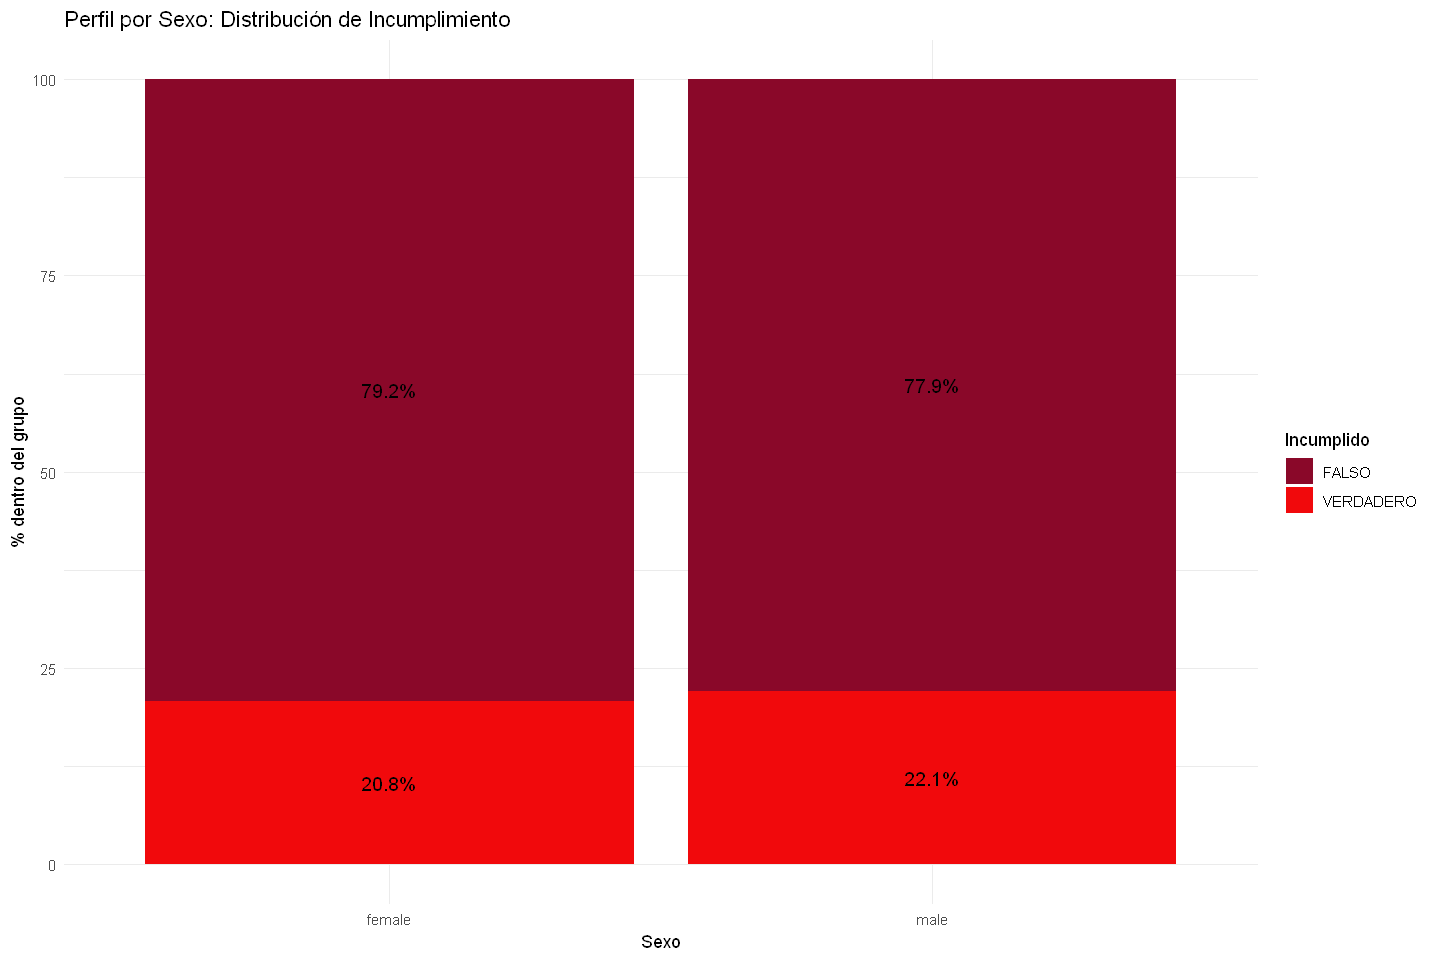

In [42]:
#----------------------------------
# Gráfica
#----------------------------------
t1 = data.frame(tc[,1:2])
colnames(t1) <- c("Sexo", "Incumplido", "Frecuencia")

tabla_larga <- t1 %>%
  group_by(Sexo) %>%
  mutate(Perfil_Fila = Frecuencia / sum(Frecuencia) * 100)


options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(tabla_larga, aes(x = Sexo, y = Perfil_Fila, fill = Incumplido)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Perfil_Fila, 1), "%")), 
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Perfil por Sexo: Distribución de Incumplimiento",
       x = "Sexo",
       y = "% dentro del grupo",
       fill = "Incumplido") +
  scale_fill_manual(values = c( "#8A0829", "#F1090C")) +
  theme_minimal()


### Incumpliemnto por Ciudad

,FALSO,VERDADERO,Total_F
Barranquilla,0.7985125,0.2014875,1
Bogotá,0.7744615,0.2255385,1
Bucaramanga,0.7922568,0.2077432,1
Cali,0.8090737,0.1909263,1
Medellín,0.7742574,0.2257426,1


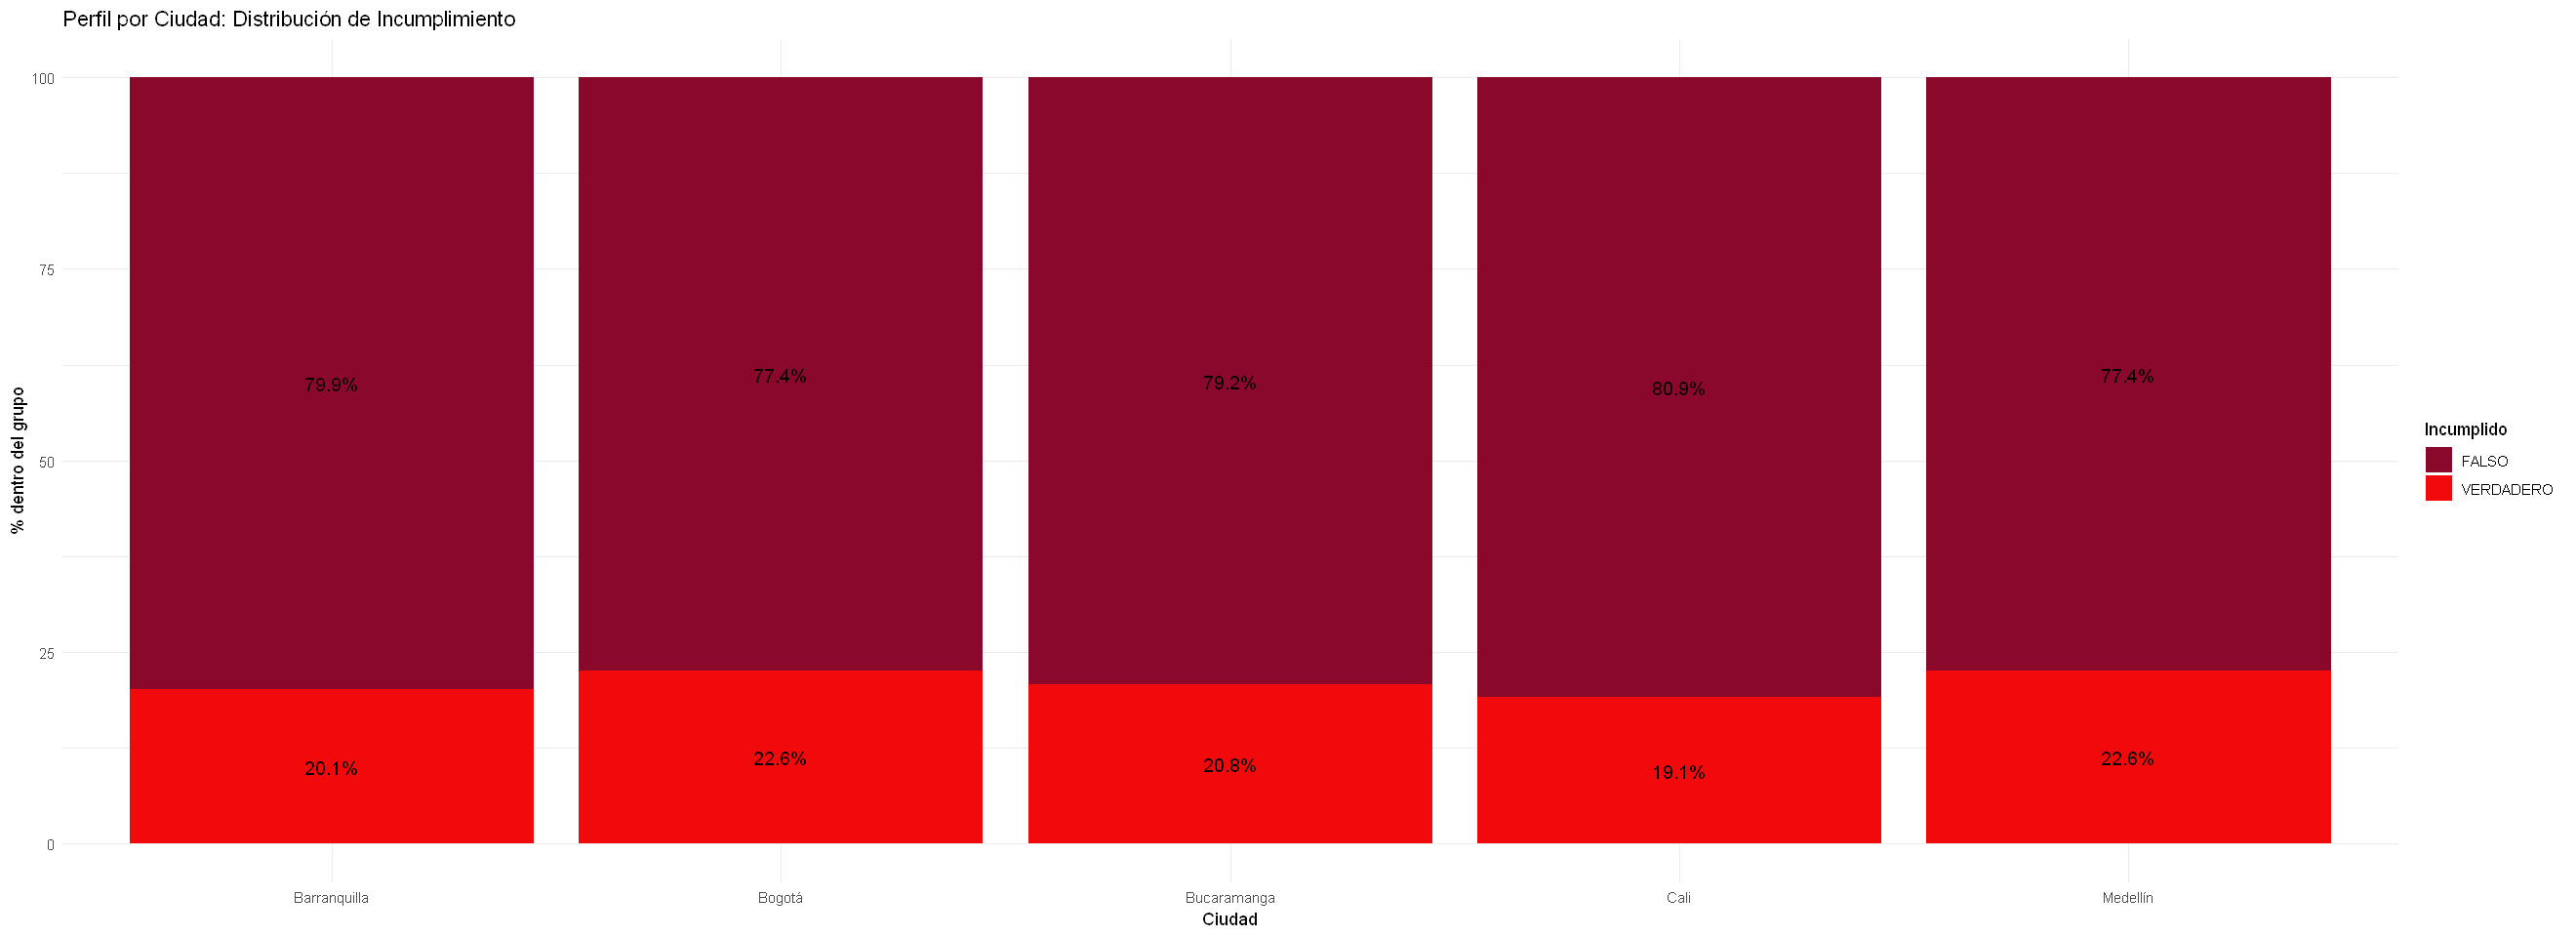

In [43]:
tc <- table(datos2$Ciudad, datos2$Incumplido)
tabtc <- cbind(tc , Total_F = rowSums(tc))
tabtf <- rbind(tabtc , Total_C = colSums( tabtc ))

#prop.table(tc,1)
tabtc/rowSums(tc)   #perfil fila
#round( tabtf / sum(tc)*100 ,1) 


#----------------------------------
# Gráfica
#----------------------------------
t1 = data.frame(tc[,1:2])
colnames(t1) <- c("Ciudad", "Incumplido", "Frecuencia")

tabla_larga <- t1 %>%
  group_by(Ciudad) %>%
  mutate(Perfil_Fila = Frecuencia / sum(Frecuencia) * 100)


options(repr.plot.width = 22, repr.plot.height = 8)

ggplot(tabla_larga, aes(x = Ciudad, y = Perfil_Fila, fill = Incumplido)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Perfil_Fila, 1), "%")), 
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Perfil por Ciudad: Distribución de Incumplimiento",
       x = "Ciudad",
       y = "% dentro del grupo",
       fill = "Incumplido") +
  scale_fill_manual(values = c( "#8A0829", "#F1090C")) +
  theme_minimal()

El análisis por ciudad permite observar cómo varía la tasa de incumplimiento entre regiones. Esto puede reflejar diferencias en el contexto económico local, Conocer las regiiones con mayores tasas permitirá diseñar estrategias focalizadas en focadas a un mejor gestnn del riesgo. De la gráfica anterior se puede inferir que:


* Barranquilla: 79.9 % de los clientes están al día y 20.1 % presentan incumplimiento.Se podría dcri que es un nivel de incumplimiento "moderado".
* Bogotá: 77.4 % al día y 22.6 % en incumplimiento. Esto se traduce a los porcentajes más altos traduciendose a una mayor concentracion del riesgo
* Bucaramanga: 79.2 % al día y 20.8 % en incumplimiento. Un poco mejor que Bogotá.
* En Cali: 80.9 % se encuentra al día y 19.1 % en incumplimiento. Se convierte en la cuidad con menor nivel de incumplimiento.
* Medellín: 77.4 % al día y 22.6 % en incumplimiento. Similar a Bogotá.

### Incumplimiento por Ocupacion

,FALSO,VERDADERO,Total_F
Ama de casa,0.7959079,0.2040921,1
Empleado,0.7889497,0.2110503,1
Estudiante,0.7767722,0.2232278,1
Independiente,0.7849301,0.2150699,1
Pensionado,0.7804998,0.2195002,1


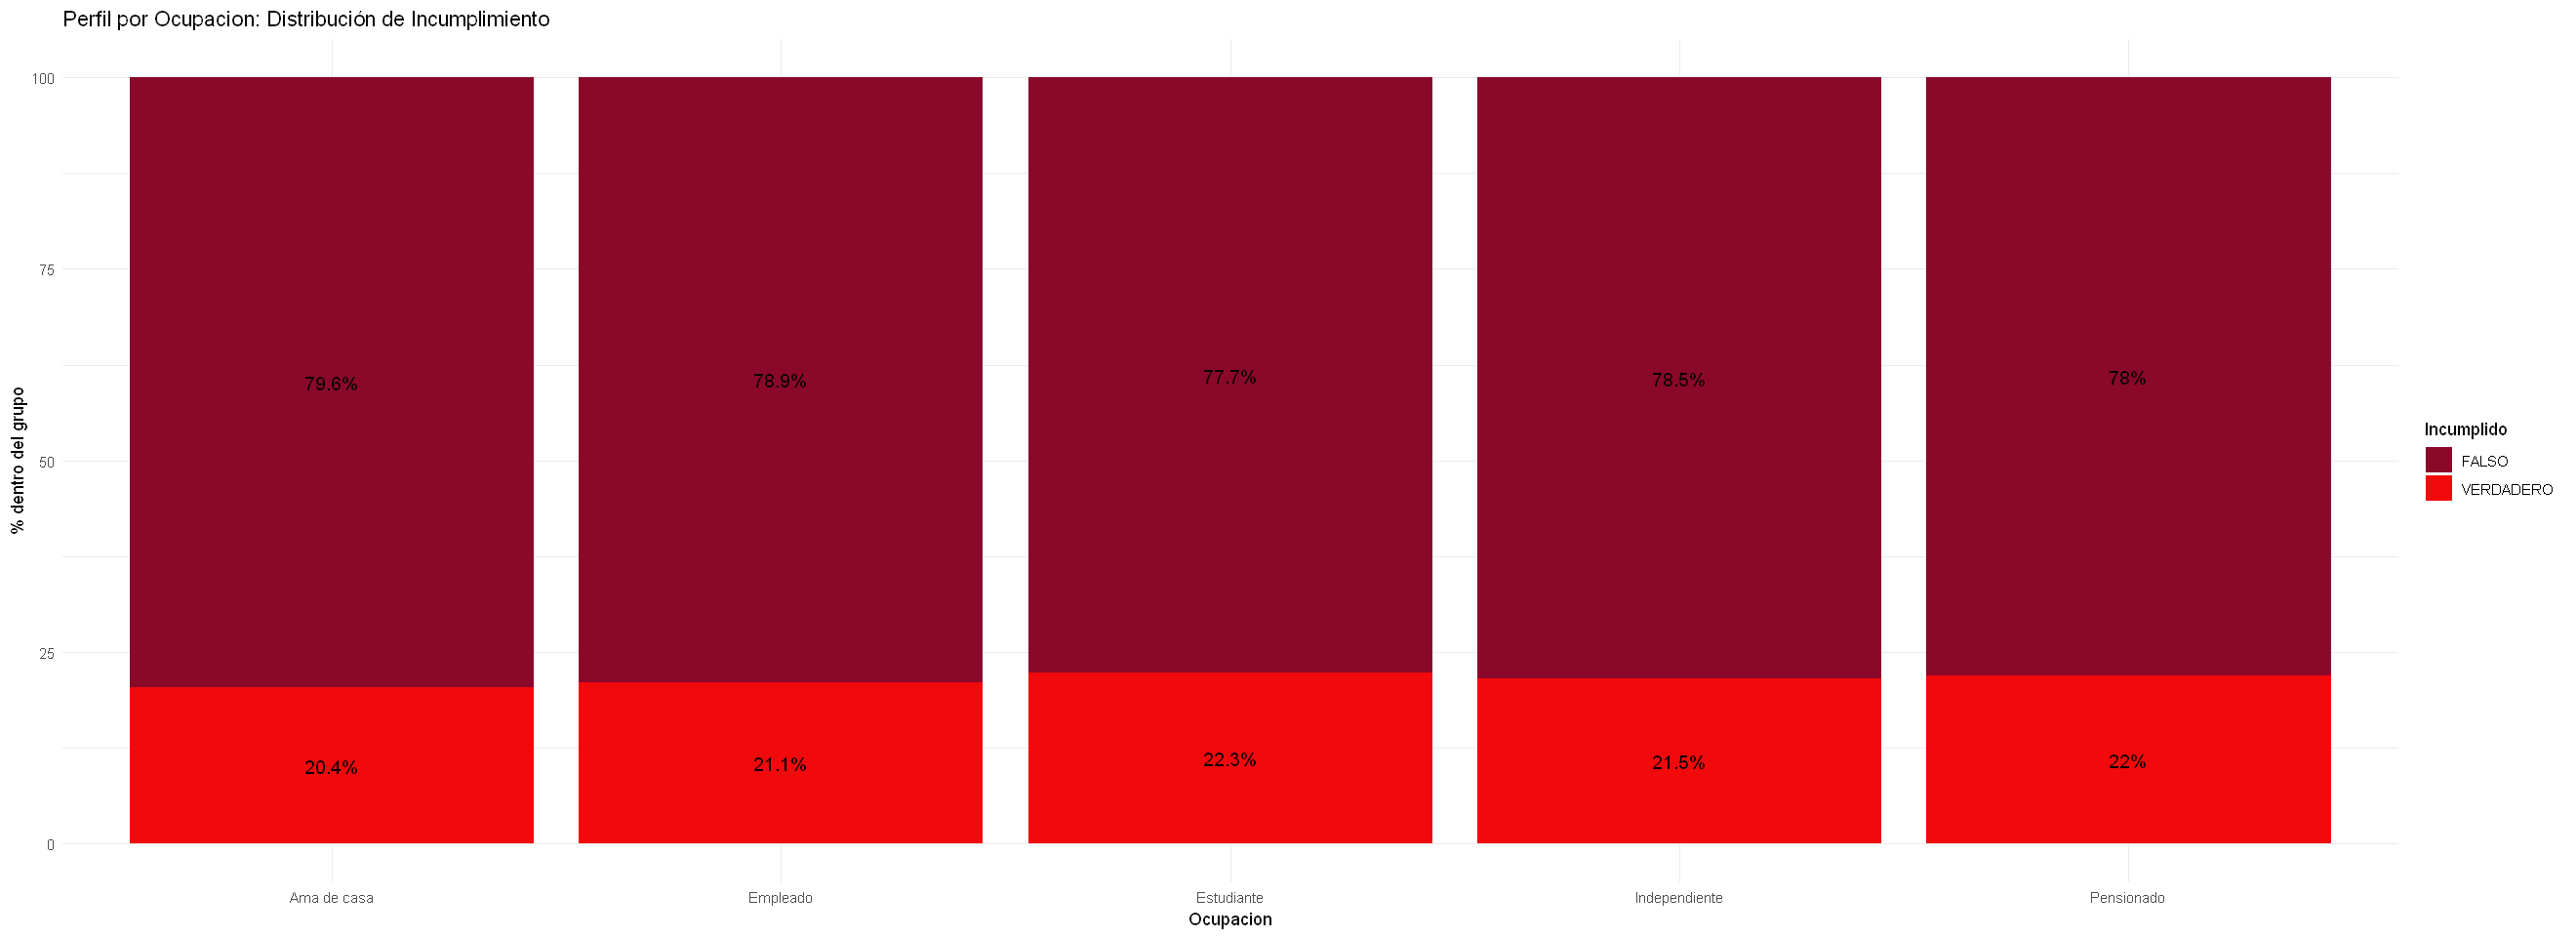

In [44]:
tc <- table(datos2$Ocupacion, datos2$Incumplido)
tabtc <- cbind(tc , Total_F = rowSums(tc))
tabtf <- rbind(tabtc , Total_C = colSums( tabtc ))

#prop.table(tc,1)
tabtc/rowSums(tc)   #perfil fila
#round( tabtf / sum(tc)*100 ,1) 


#----------------------------------
# Gráfica
#----------------------------------
t1 = data.frame(tc[,1:2])
colnames(t1) <- c("Ocupacion", "Incumplido", "Frecuencia")

tabla_larga <- t1 %>%
  group_by(Ocupacion) %>%
  mutate(Perfil_Fila = Frecuencia / sum(Frecuencia) * 100)


options(repr.plot.width = 22, repr.plot.height = 8)

ggplot(tabla_larga, aes(x = Ocupacion, y = Perfil_Fila, fill = Incumplido)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Perfil_Fila, 1), "%")), 
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Perfil por Ocupacion: Distribución de Incumplimiento",
       x = "Ocupacion",
       y = "% dentro del grupo",
       fill = "Incumplido") +
  scale_fill_manual(values = c( "#8A0829", "#F1090C")) +
  theme_minimal()

* Ama de casa: Este grupo poblacoinal presenta una tasa de cumplimiento del 79.6% y una de incumplimiento del 20.4%, siendo uno de los grupos con menor riesgo de impago.
* Empleado: Se observa en la gráfica que mantiene una tasa de cumplimiento del 78.9%, con incumplimiento del 21.1%..
* Estudiante: Este es el grupo poblacional con mayor proporció de incumpliminto con(22.3%), esto pude ser posible ante sus bajos ingresos inestables.
* Independiente: presenta un 21.5% de incumplimiento, lo que puede deberse a la variabilidad en los ingresos y la falta de ingresos fijos.
* Pensionado: tiene una tasa de incumplimiento de 21.9%, ligeramente superior al promedio.

### Proporción de clientes incumplidos por mes

In [49]:
library(dplyr)
library(lubridate)

datos_ <- datos2 %>%
  mutate(Incumplido_bool = case_when(
    Incumplido %in% c("VERDADERO", "TRUE", 1) ~ TRUE,
    Incumplido %in% c("FALSO", "FALSE", 0) ~ FALSE,
    TRUE ~ NA
  ))

In [50]:
library(dplyr)
library(lubridate)

datos_ts <- datos_ %>%
  mutate(mes = floor_date(Fecha_aplicacion, "month")) %>%
  group_by(mes) %>%
  summarise(
    n_clientes = n(),
    n_incumplidos = sum(Incumplido_bool, na.rm = TRUE),
    prop_incumplidos = n_incumplidos / n_clientes
  ) %>%
  arrange(mes)
head(datos_ts,4)

mes,n_clientes,n_incumplidos,prop_incumplidos
<date>,<int>,<int>,<dbl>
2019-01-01,218,40,0.1834862
2019-02-01,189,42,0.2222222
2019-03-01,221,52,0.2352941
2019-04-01,210,47,0.2238095


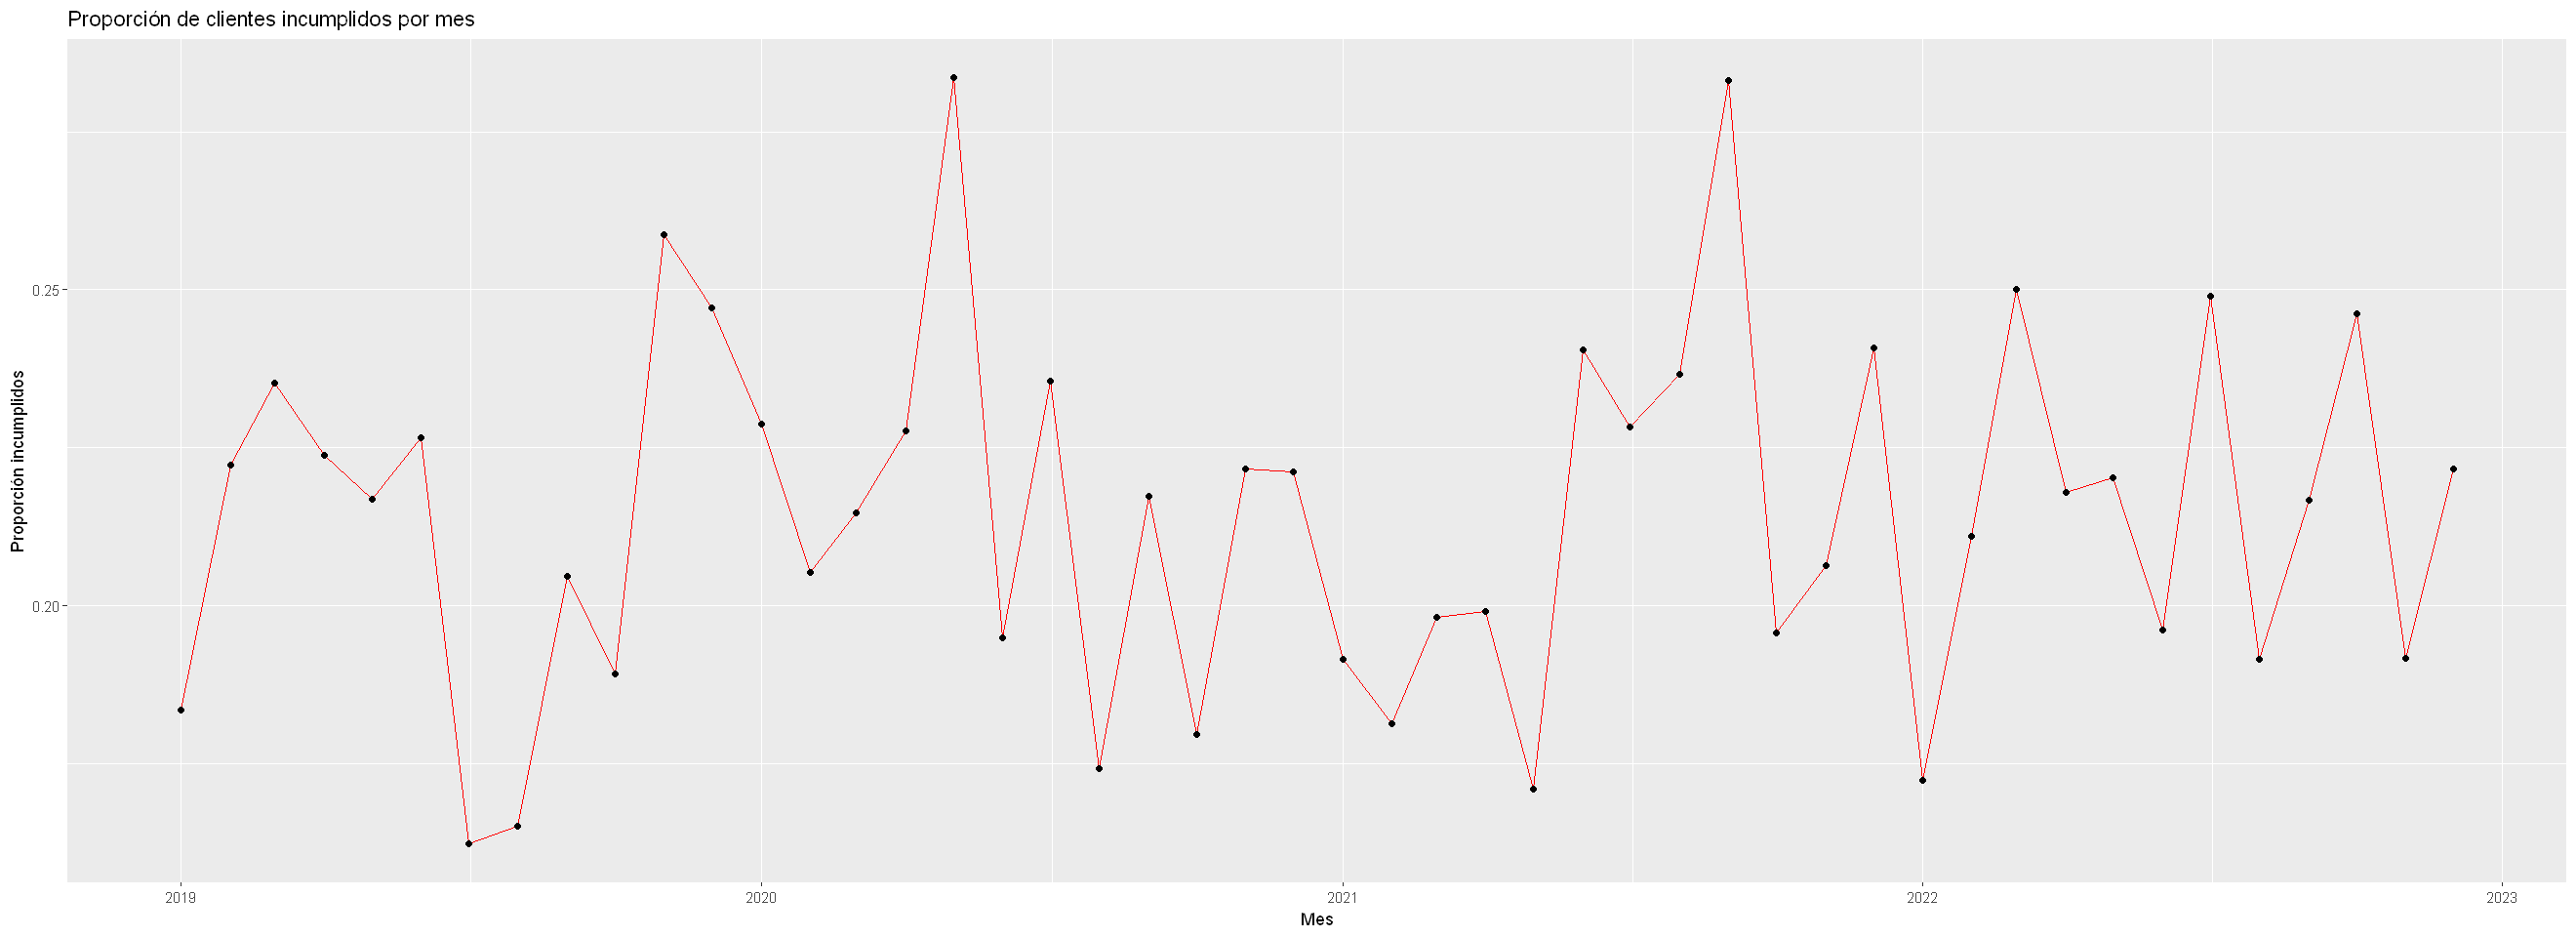

In [51]:
library(ggplot2)

ggplot(datos_ts, aes(x = mes, y = prop_incumplidos)) +
  geom_line(color = "red") +
  geom_point() +
  labs(title = "Proporción de clientes incumplidos por mes",
       x = "Mes",
       y = "Proporción incumplidos")

In [52]:
str(datos2)

tibble [9,998 × 27] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:9998] 8e+07 8e+07 8e+07 8e+07 8e+07 ...
 $ score_unit4                : num [1:9998] 858 678 753 532 655 890 846 859 687 762 ...
 $ Fecha_aplicacion           : Date[1:9998], format: "2019-01-18" "2022-06-09" ...
 $ Ciudad                     : chr [1:9998] "Cali" "Bogotá" "Barranquilla" "Bogotá" ...
 $ Edad                       : num [1:9998] 50 27 31 19 20 21 57 25 57 44 ...
 $ Sexo                       : chr [1:9998] "male" "female" "female" "male" ...
 $ Ocupacion                  : chr [1:9998] "Empleado" "Independiente" "Estudiante" "Ama de casa" ...
 $ Ingresos_mensuales         : num [1:9998] 3017 636 1631 2706 3172 ...
 $ Duracion_perfil_de_facebook: chr [1:9998] "1-3 años" "4-12 meses" "3+ años" "4-12 meses" ...
 $ score_TU                   : num [1:9998] 694 769 685 562 355 683 796 644 743 871 ...
 $ score_FICO_money           : num [1:9998] 740 740 536 799 466 599 652 786 355 502 ...
 

In [53]:
datos <- datos2 %>%
  mutate(Incumplido_bool = case_when(
    Incumplido %in% c("VERDADERO", "TRUE", 1) ~ TRUE,
    Incumplido %in% c("FALSO", "FALSE", 0) ~ FALSE,
    TRUE ~ NA
  ))

### Variables numéricas (Ingresos mensuales)

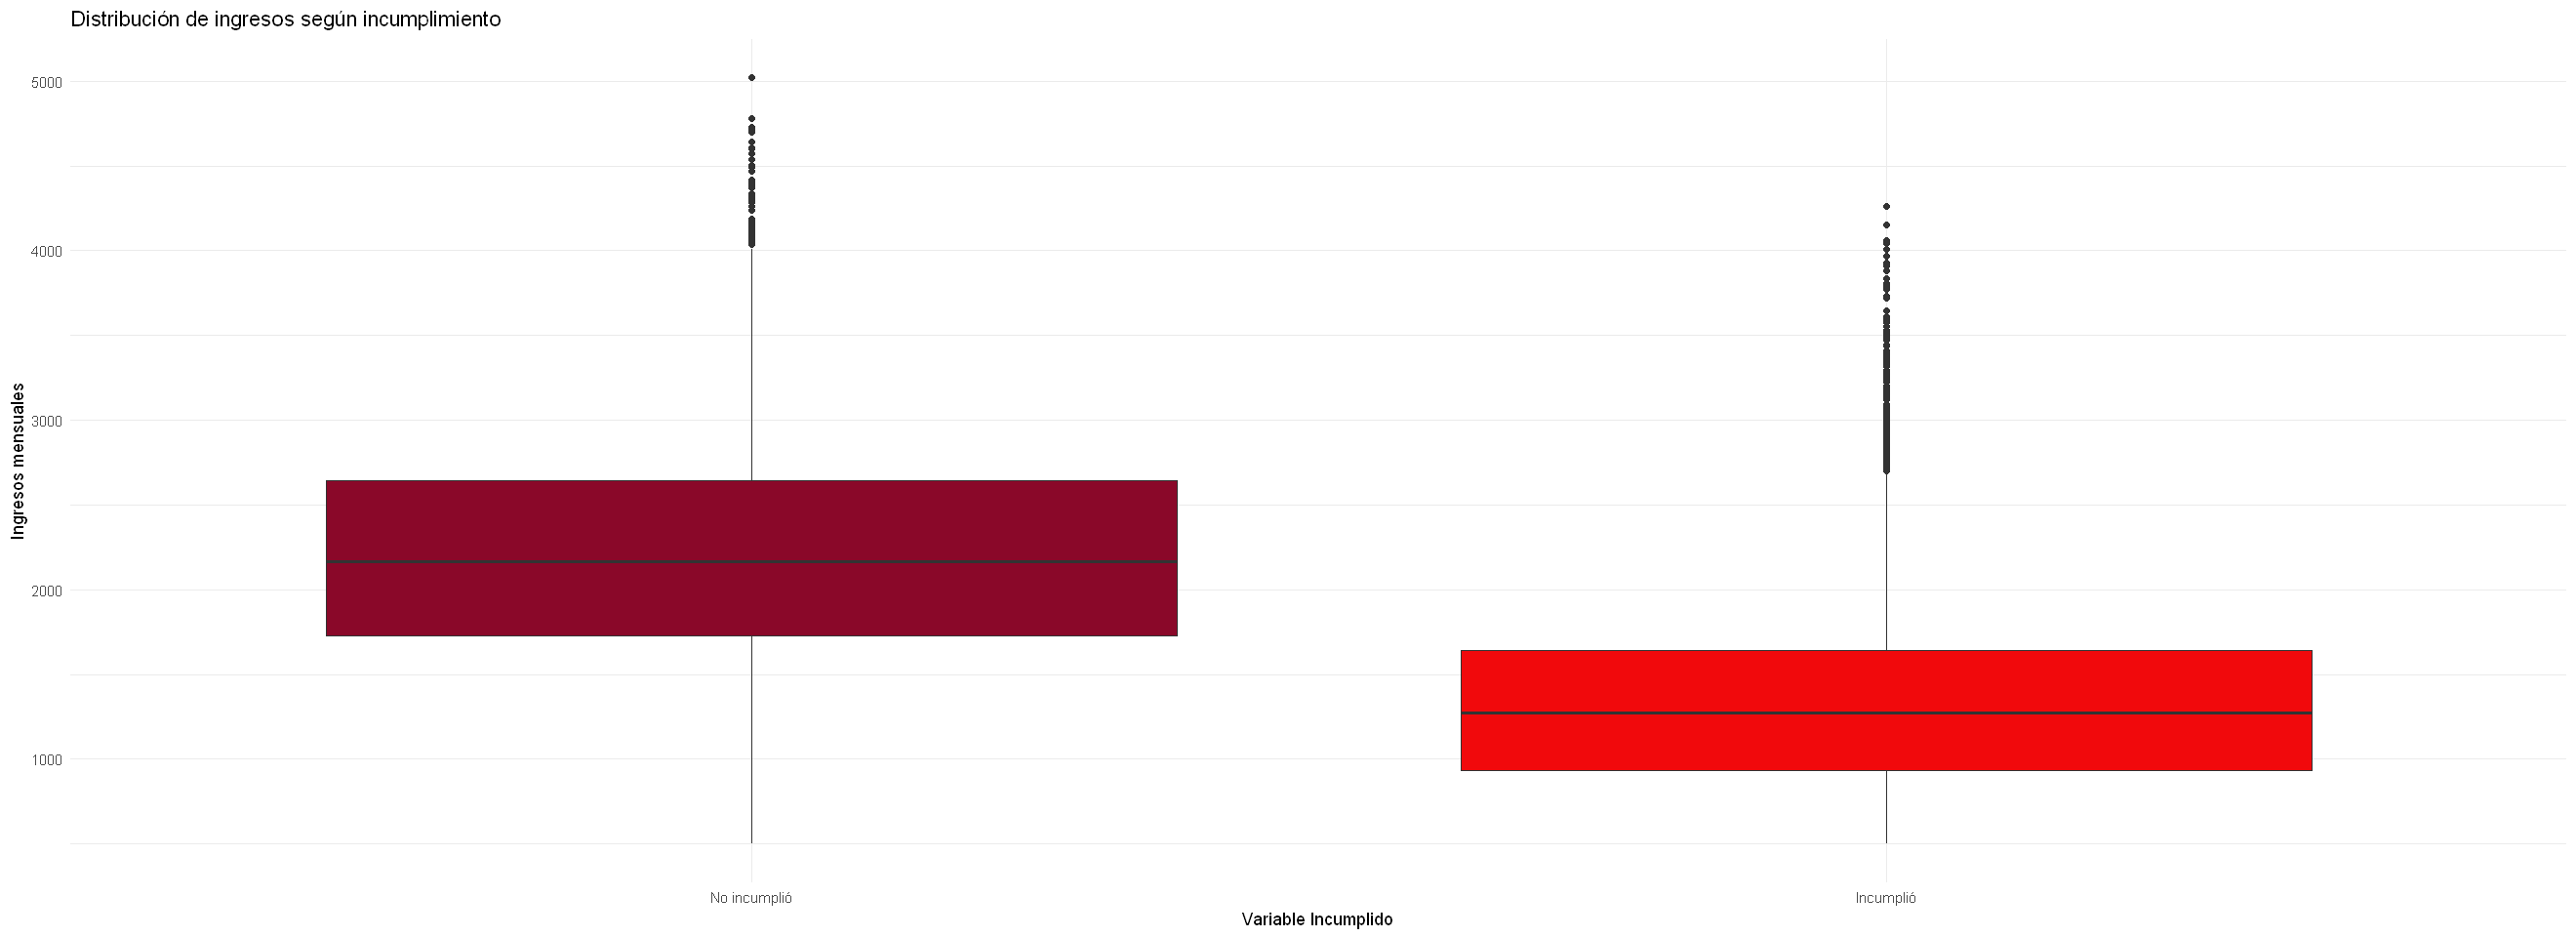

In [54]:
library(ggplot2)

ggplot(datos, aes(x = Incumplido_bool, y = Ingresos_mensuales)) +
  geom_boxplot(fill = c("#8A0829", "#F1090C")) +
  labs(
    title = "Distribución de ingresos según incumplimiento",
    x = "Variable Incumplido",
    y = "Ingresos mensuales"
  ) +
  scale_x_discrete(labels = c("No incumplió", "Incumplió")) +
  theme_minimal()



In [55]:
datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(Ingresos_mensuales, na.rm = TRUE),
    Q1_score  = quantile(Ingresos_mensuales, 0.25, na.rm = TRUE),
    mediana_score = median(Ingresos_mensuales, na.rm = TRUE),
    promedio_score = mean(Ingresos_mensuales, na.rm = TRUE),
    Q3_score  = quantile(Ingresos_mensuales, 0.75, na.rm = TRUE),
    max_score = max(Ingresos_mensuales, na.rm = TRUE),
    RI = quantile(Ingresos_mensuales, 0.75, na.rm = TRUE)- quantile(Ingresos_mensuales, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,500,1728,2163.0,2192.258,2646,5021,918
TRUE,2146,500,934,1271.5,1405.432,1639,4264,705


El análisis de los ingresos mensuales por estado de incumplimiento, logra identificar una diferencia clara entre los clientes que cumplen y los que no. 

* Los clientes incumplidos presentan ingresos más bajos (mediana de 1.271 frente a 2.163 en los cumplidos), así como un rango intercuartílico (RI) menor (705 vs. 918), lo que indica menos dispersión y, por tanto, un perfil económico más homogéneo y limitado. 
* Los clientes cumplidos tienen ingresos más altos y variados, lo que sugiere una mayor capacidad de pago y resiliencia financiera. Estos resultados refuerzan la relación inversa entre nivel de ingreso y probabilidad de incumplimiento, siendo los ingresos una variable clave para segmentar el riesgo y ajustar estrategias de aprobación y cobranza.

### Variables numéricas (Gasto_mensual)

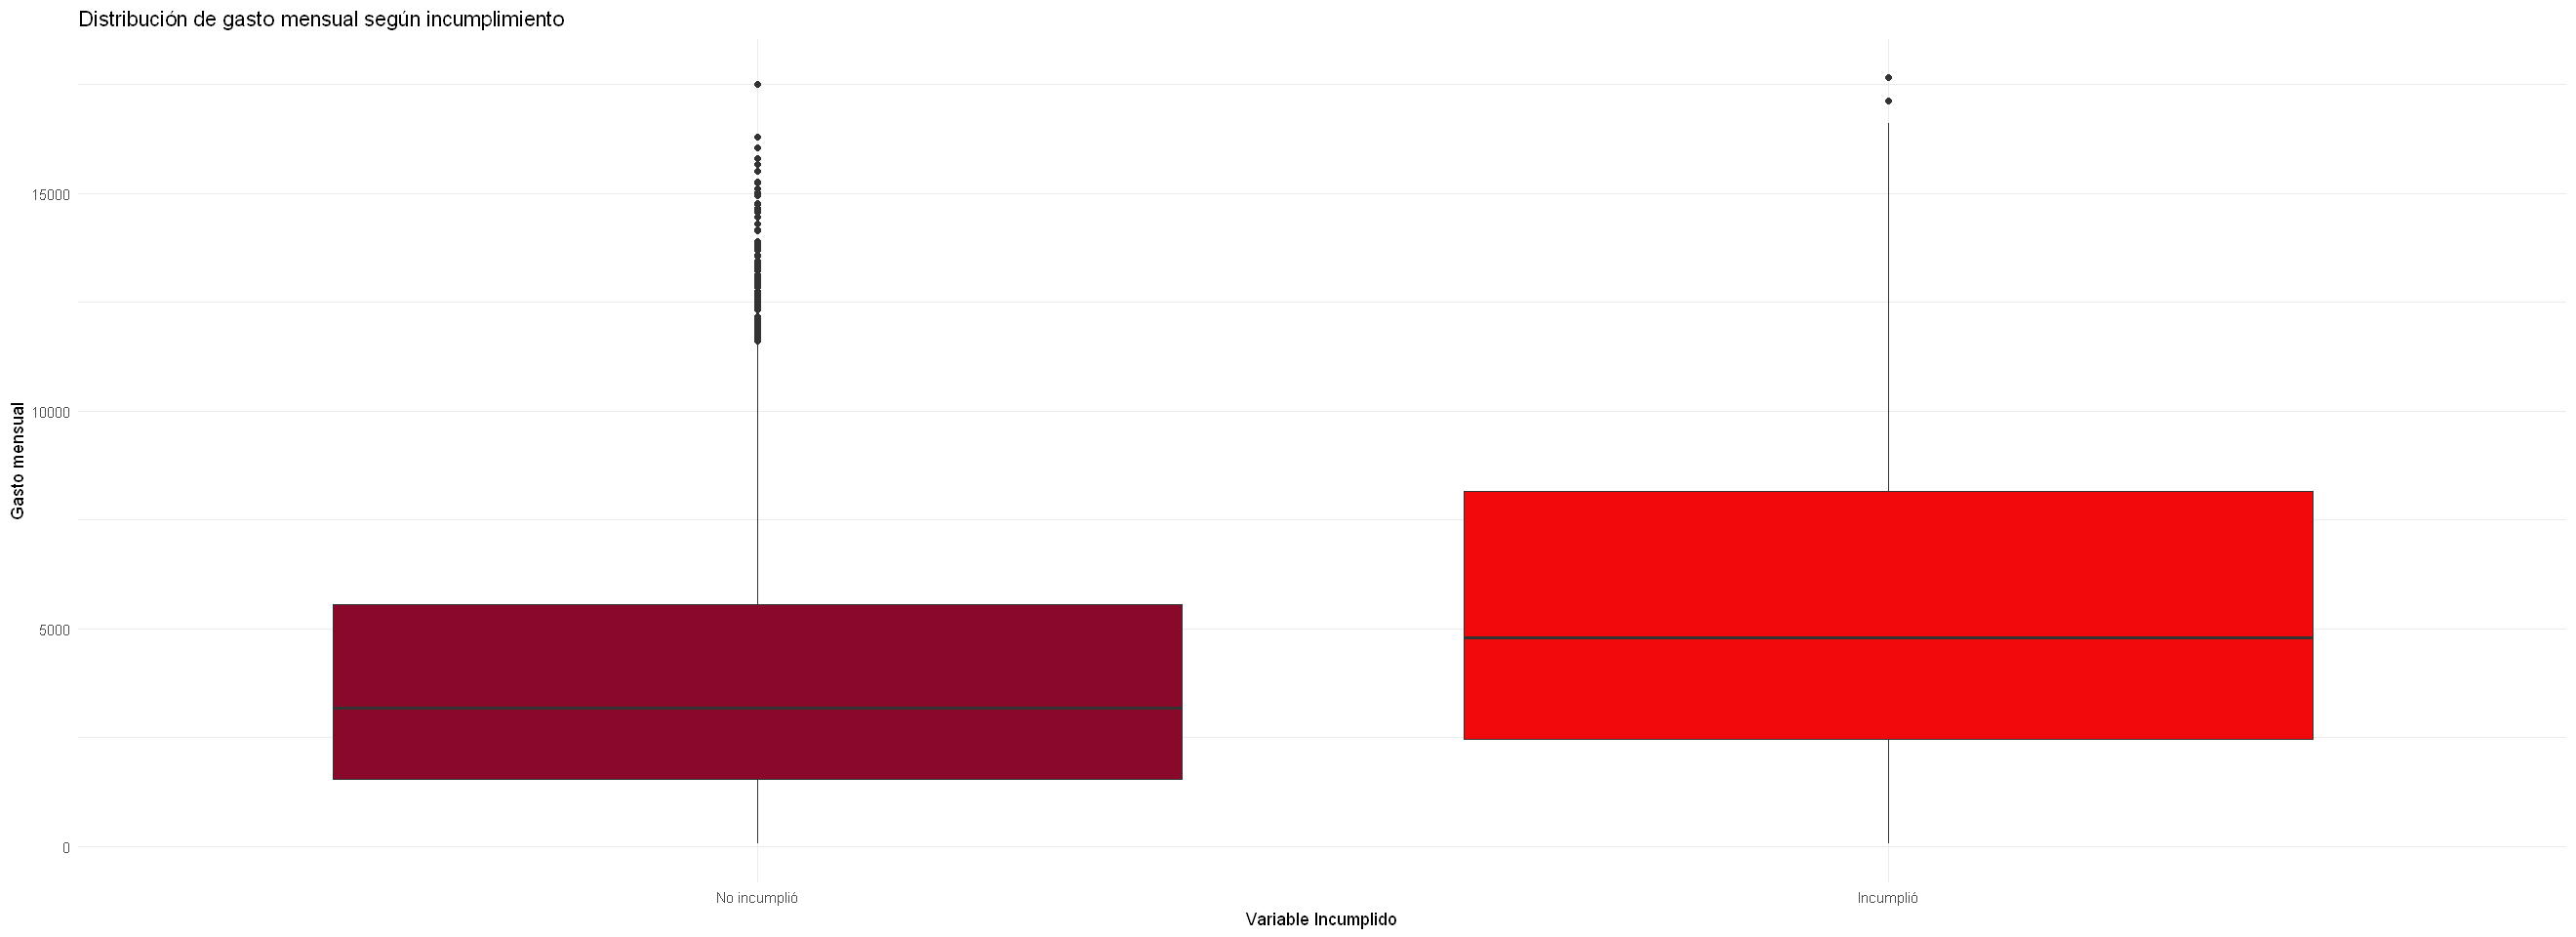

In [56]:
ggplot(datos, aes(x = Incumplido_bool, y = Gasto_mensual)) +
  geom_boxplot(fill = c("#8A0829", "#F1090C")) +
  labs(
    title = "Distribución de gasto mensual según incumplimiento",
    x = "Variable Incumplido",
    y = "Gasto mensual"
  ) +
  scale_x_discrete(labels = c("No incumplió", "Incumplió")) +
  theme_minimal()


In [57]:
datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(Gasto_mensual, na.rm = TRUE),
    Q1_score  = quantile(Gasto_mensual, 0.25, na.rm = TRUE),
    mediana_score = median(Gasto_mensual, na.rm = TRUE),
    promedio_score = mean(Gasto_mensual, na.rm = TRUE),
    Q3_score  = quantile(Gasto_mensual, 0.75, na.rm = TRUE),
    max_score = max(Gasto_mensual, na.rm = TRUE),
    RI = quantile(Gasto_mensual, 0.75, na.rm = TRUE)- quantile(Gasto_mensual, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,52,1540.5,3176.5,3859.409,5553.00,17497,4012.50
TRUE,2146,61,2464.5,4785.0,5499.883,8150.75,17656,5686.25


* El gasto mensual muestra que los clientes incumplidos tienen niveles de gasto significativamente más altos que los cumplidos. Su mediana (4.785) y promedio (5.499) superan ampliamente a los de los clientes cumplidos (3.176 y 3.859, respectivamente), podría indicare sobreendeudamiento. 
* Se observa un rango intercuartílico (RI) mayor (5.666 vs. 4.012), reflejando mayor dispersión y heterogeneidad en el comportamiento de gasto dentro del grupo de incumplidos. 

### Variables numéricas (Cupo_aprobado)

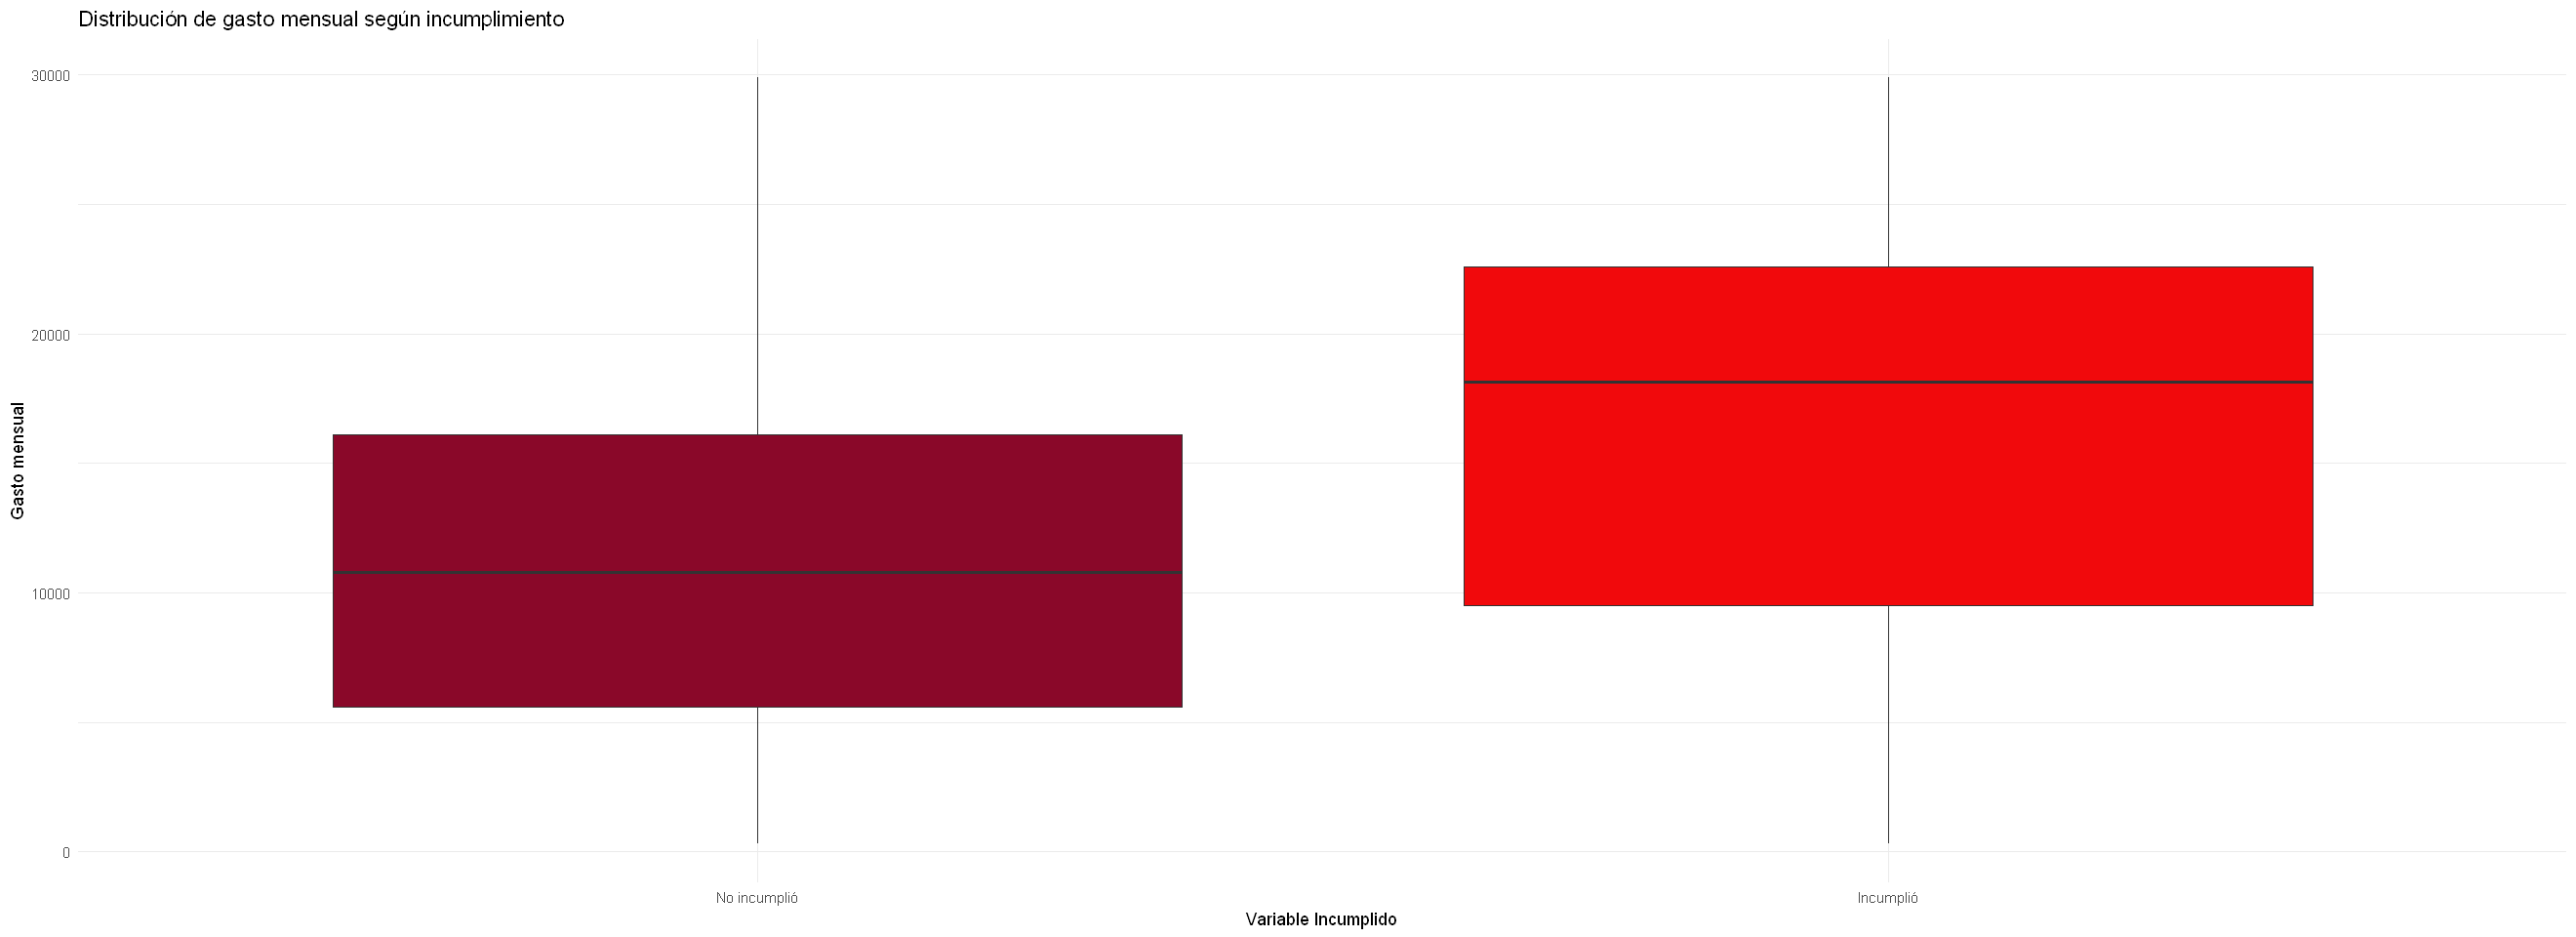

In [58]:
ggplot(datos, aes(x = Incumplido_bool, y = Cupo_aprobado)) +
  geom_boxplot(fill = c("#8A0829", "#F1090C")) +
  labs(
    title = "Distribución de gasto mensual según incumplimiento",
    x = "Variable Incumplido",
    y = "Gasto mensual"
  ) +
  scale_x_discrete(labels = c("No incumplió", "Incumplió")) +
  theme_minimal()

In [59]:
datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(Cupo_aprobado, na.rm = TRUE),
    Q1_score  = quantile(Cupo_aprobado, 0.25, na.rm = TRUE),
    mediana_score = median(Cupo_aprobado, na.rm = TRUE),
    promedio_score = mean(Cupo_aprobado, na.rm = TRUE),
    Q3_score  = quantile(Cupo_aprobado, 0.75, na.rm = TRUE),
    max_score = max(Cupo_aprobado, na.rm = TRUE),
    RI = quantile(Cupo_aprobado, 0.75, na.rm = TRUE)- quantile(Cupo_aprobado, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,300,5600,10800,11031.53,16100,29900,10500
TRUE,2146,300,9500,18150,16164.40,22600,29900,13100


Sobre el cupo aprobado se puede destacar que:

* los clientes incumplidos recibieron montos de crédito más altos que los cumplidos. La mediana (18.150) y el promedio (16.164) de este grupo duplican aproximadamente los valores de los clientes cumplidos (10.800 y 11.031, respectivamente), 
* El rango intercuartílico (RI) de los incumplidos (13.100) también es superior, indicando una mayor dispersión en los montos aprobados. 

---
# 2: Evaluación de los diferentes scores de crédito

### Variables numéricas (Score unit4)

Para poder identificar caracterísitcas asociadas al incumplimiento, analicemos las variabels numéricas entre ellas las score

In [60]:
library(dplyr)

# Convertir Incumplido a booleano
datos <- datos2 %>%
  mutate(
    Incumplido_bool = case_when( Incumplido %in% c("VERDADERO", "TRUE") ~ TRUE,  Incumplido %in% c("FALSO", "FALSE") ~ FALSE,  TRUE ~ NA )
  )

# Revisar
table(datos$Incumplido, datos$Incumplido_bool)

           
            FALSE TRUE
  FALSO      7852    0
  VERDADERO     0 2146

`geom_smooth()` using formula = 'y ~ x'


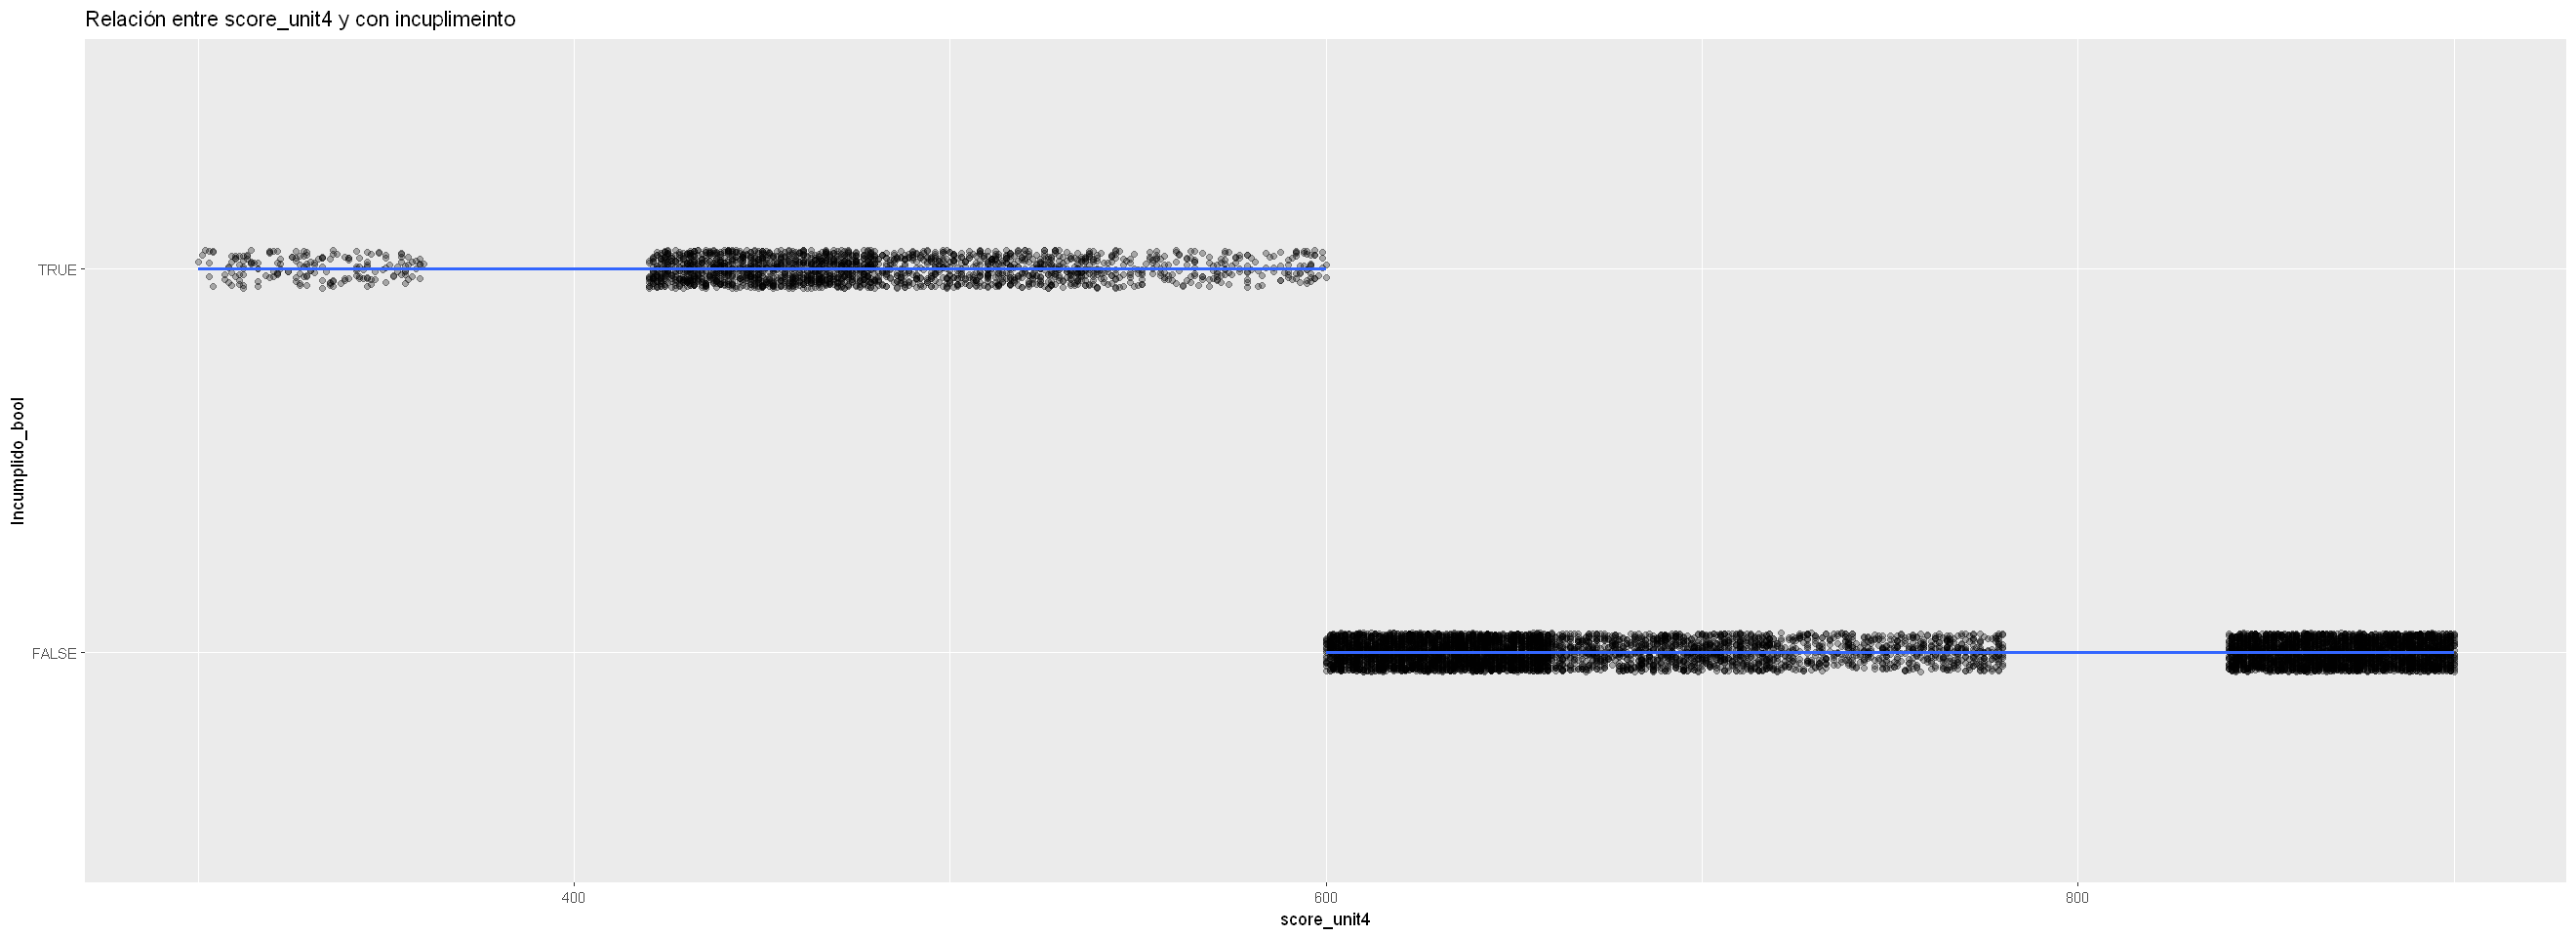

In [61]:
# Score_unit4 vs incumplimiento
ggplot(datos, aes(x = score_unit4, y = Incumplido_bool)) +
  geom_jitter(width = 0, height = 0.05, alpha = 0.3) +
  geom_smooth(method = "loess") +
  labs(title = "Relación entre score_unit4 y con incuplimeinto")

In [62]:

datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(score_unit4, na.rm = TRUE),
    Q1_score  = quantile(score_unit4, 0.25, na.rm = TRUE),
    mediana_score = median(score_unit4, na.rm = TRUE),
    promedio_score = mean(score_unit4, na.rm = TRUE),
    Q3_score  = quantile(score_unit4, 0.75, na.rm = TRUE),
    max_score = max(score_unit4, na.rm = TRUE),
    RI = quantile(score_unit4, 0.75, na.rm = TRUE)- quantile(score_unit4, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,600,639,708,743.2736,863,900,224
TRUE,2146,300,439,467,468.6608,508,600,69


* Del análisis realizado sobre el score_unit4 y el incumplimiento de los clientes, se observa que la mayoría de los clientes (7.852) no incurrió en incumplimiento, mientras que 2.146 clientes sí lo hicieron.
* Los clientes que incumplieron presentan scores mucho más bajos, con un mínimo de 300 y un máximo de 600, en comparación con los que no incumplieron, cuyo rango va de 600 a 900. respectivaent.
* Los percentiles muestran algunas diferencis:  la mediana de los incumplidos es 467, mientras que la de los que cumplieron es 708..
* El rango Intercuartílico en los dos grupos de población ( Clientes que no incumplen: 224 vs clientes incumplidos: 69), indican que existe mayor dispersion de scores de cleintes que no incumplen vs los que incumplen. scores altos para clientes que cumplen y scores muy concentrados en valores bajos traduciendose en un grupo con un riesgo alto.
* score_unit4 es un buen indicador de riesgo, debido a que distingue bien entre clientes de bajo y alto riesgo, porque los incumplidos están todos en el rango bajo y poco disperso, mientras que los cumplidos tienen una dispersión más amplia y mayor puntaje.

### Variables numéricas (score_TU)

`geom_smooth()` using formula = 'y ~ x'


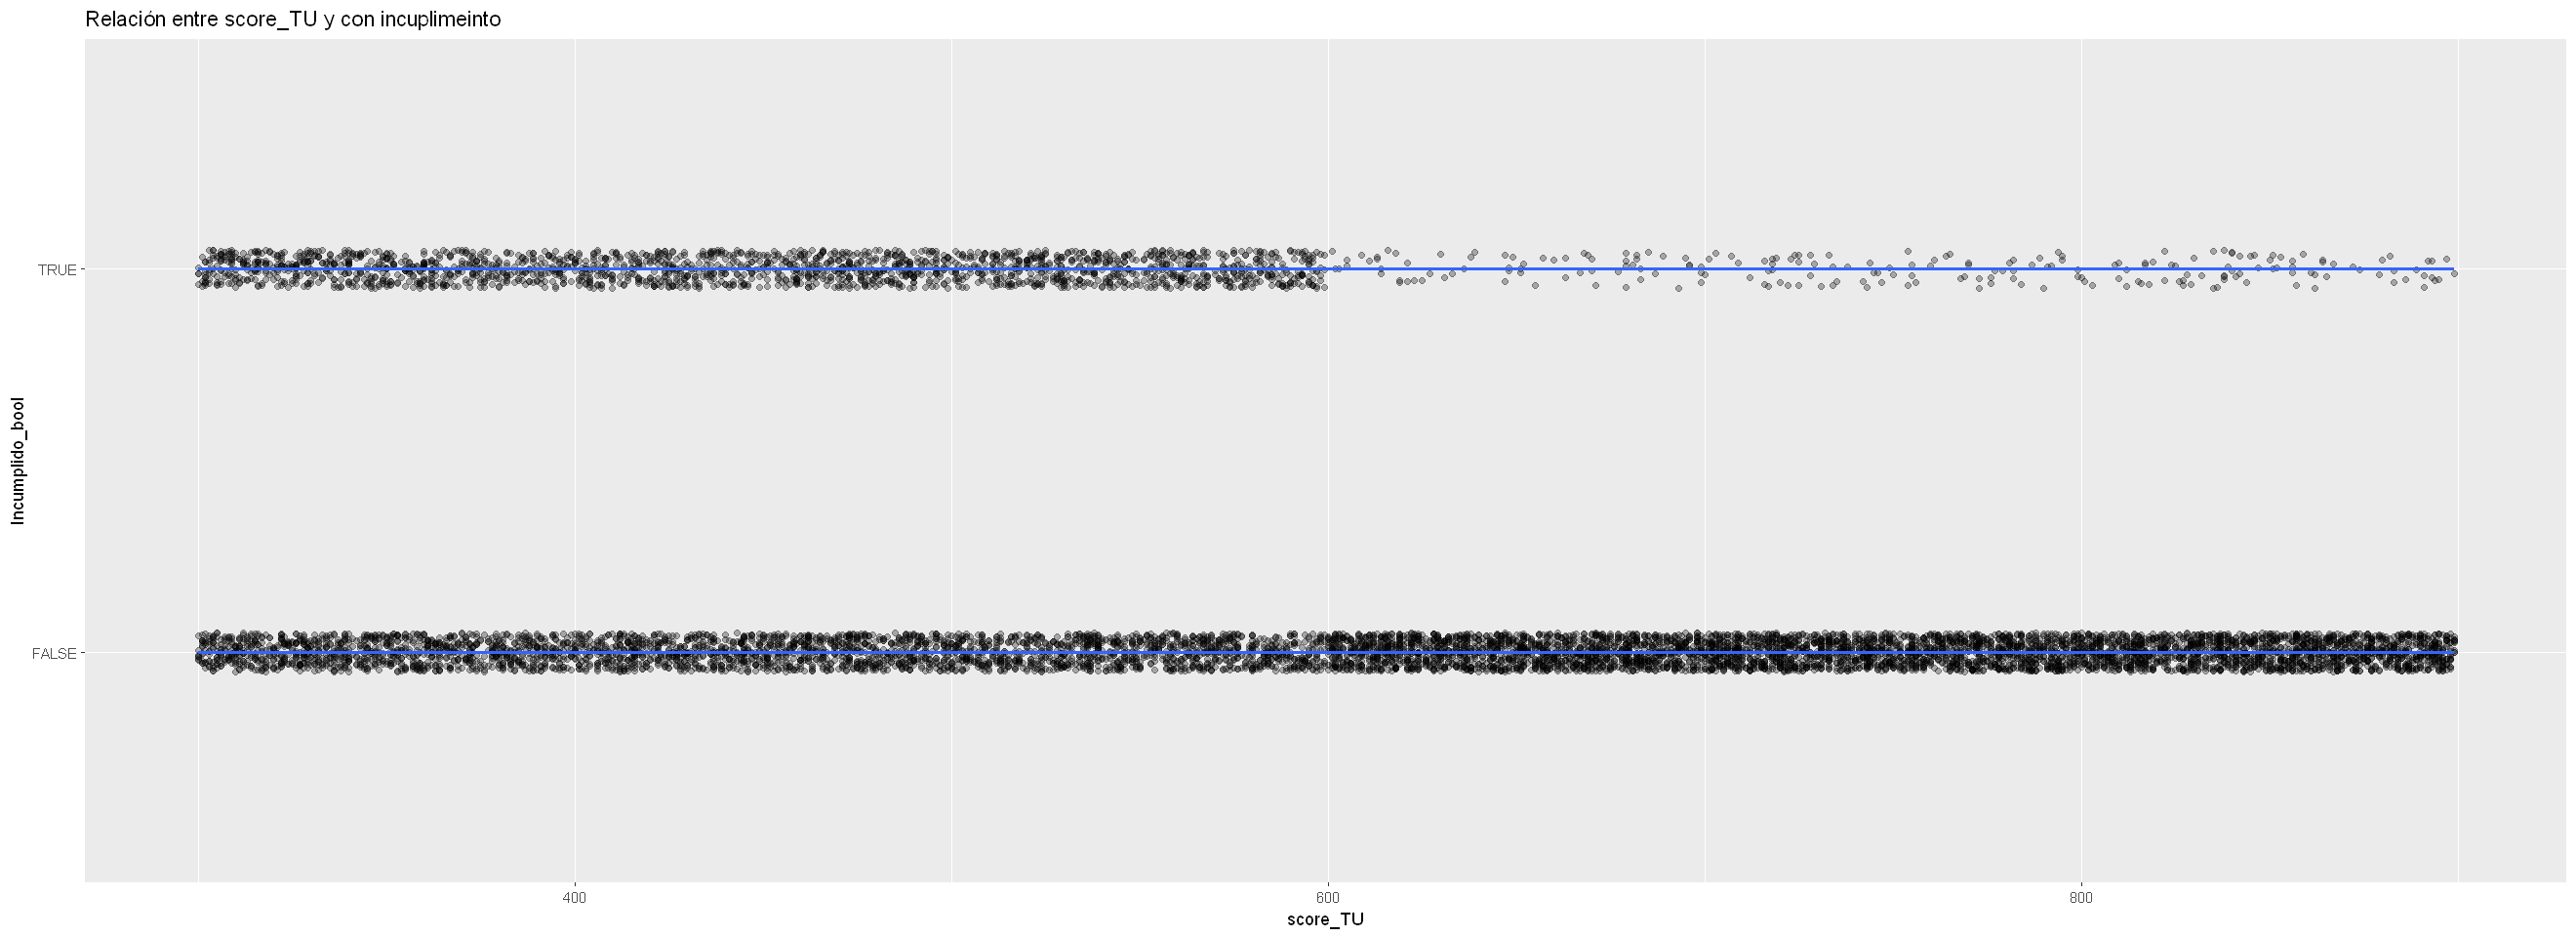

In [75]:
# Score_unit4 vs incumplimiento
ggplot(datos, aes(x = score_TU, y = Incumplido_bool)) +
  geom_jitter(width = 0, height = 0.05, alpha = 0.3) +
  geom_smooth(method = "loess") +
  labs(title = "Relación entre score_TU y con incuplimeinto")


In [76]:

datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(score_TU, na.rm = TRUE),
    Q1_score  = quantile(score_TU, 0.25, na.rm = TRUE),
    mediana_score = median(score_TU, na.rm = TRUE),
    promedio_score = mean(score_TU, na.rm = TRUE),
    Q3_score  = quantile(score_TU, 0.75, na.rm = TRUE),
    max_score = max(score_TU, na.rm = TRUE),
    RI = quantile(score_TU, 0.75, na.rm = TRUE)- quantile(score_TU, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,300,488,652,630.6899,776,899,288
TRUE,2146,300,380,467,478.7027,546,899,166


se observa una clara diferencia entre los clientes que cumplen y los que incumplen sus obligaciones:

* Distribución de clientes: 7.852 clientes no presentaron incumplimiento, mientras que 2.146 sí lo hicieron.
* Niveles de score: Los clientes cumplidos tienen en promedio un score significativamente más alto (630) que los incumplidos (479), lo que refleja una relación inversa entre score y probabilidad de incumplir.

### Variables numéricas (score_FICO_money)

`geom_smooth()` using formula = 'y ~ x'


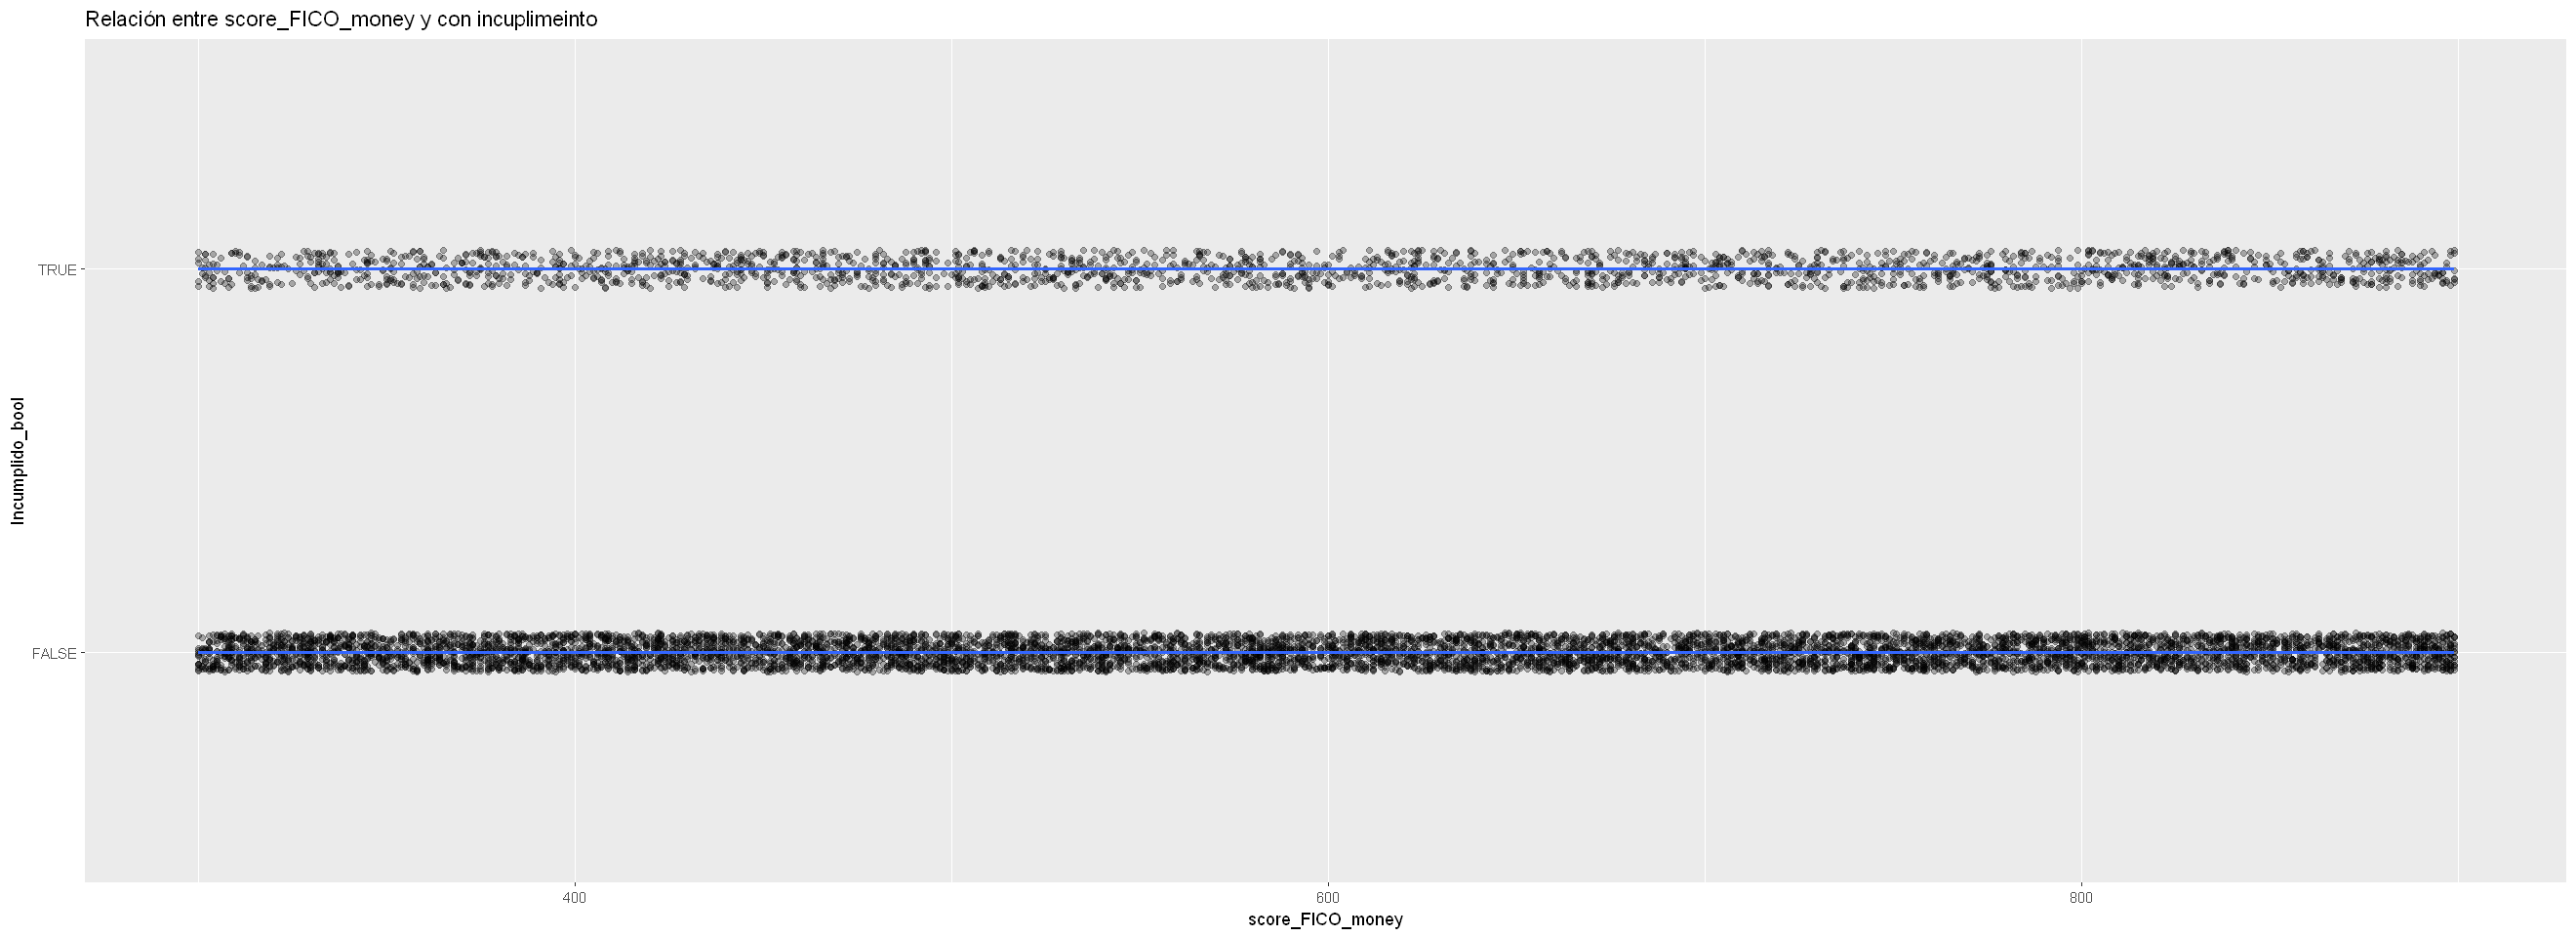

In [77]:
# Score_unit4 vs incumplimiento
ggplot(datos, aes(x = score_FICO_money, y = Incumplido_bool)) +
  geom_jitter(width = 0, height = 0.05, alpha = 0.3) +
  geom_smooth(method = "loess") +
  labs(title = "Relación entre score_FICO_money y con incuplimeinto")

In [78]:

datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(score_FICO_money, na.rm = TRUE),
    Q1_score  = quantile(score_FICO_money, 0.25, na.rm = TRUE),
    mediana_score = median(score_FICO_money, na.rm = TRUE),
    promedio_score = mean(score_FICO_money, na.rm = TRUE),
    Q3_score  = quantile(score_FICO_money, 0.75, na.rm = TRUE),
    max_score = max(score_FICO_money, na.rm = TRUE),
    RI = quantile(score_FICO_money, 0.75, na.rm = TRUE)- quantile(score_FICO_money, 0.25, na.rm = TRUE)
  )


Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,300,452.00,602,601.4524,752.00,899,300.0
TRUE,2146,300,453.25,600,603.0592,755.75,899,302.5


Se observa en este score que no hay una diferencia significativa entre los clientes que incumplen y los que no:

* Se observa una distribución similar, Los clientes cumplidos y los incumplidos presentan distribuciones muy parecidas, con promedios de 601.45 y 603.05 respectivamente.
* Las medianas son casi iguales: 602 en cumplidos vs 603 en incumplidos.

score_FICO_money no discrimina adecuadamente el riesgo de incumplimiento.

### Variables numéricas (score_lexisnexis)

`geom_smooth()` using formula = 'y ~ x'


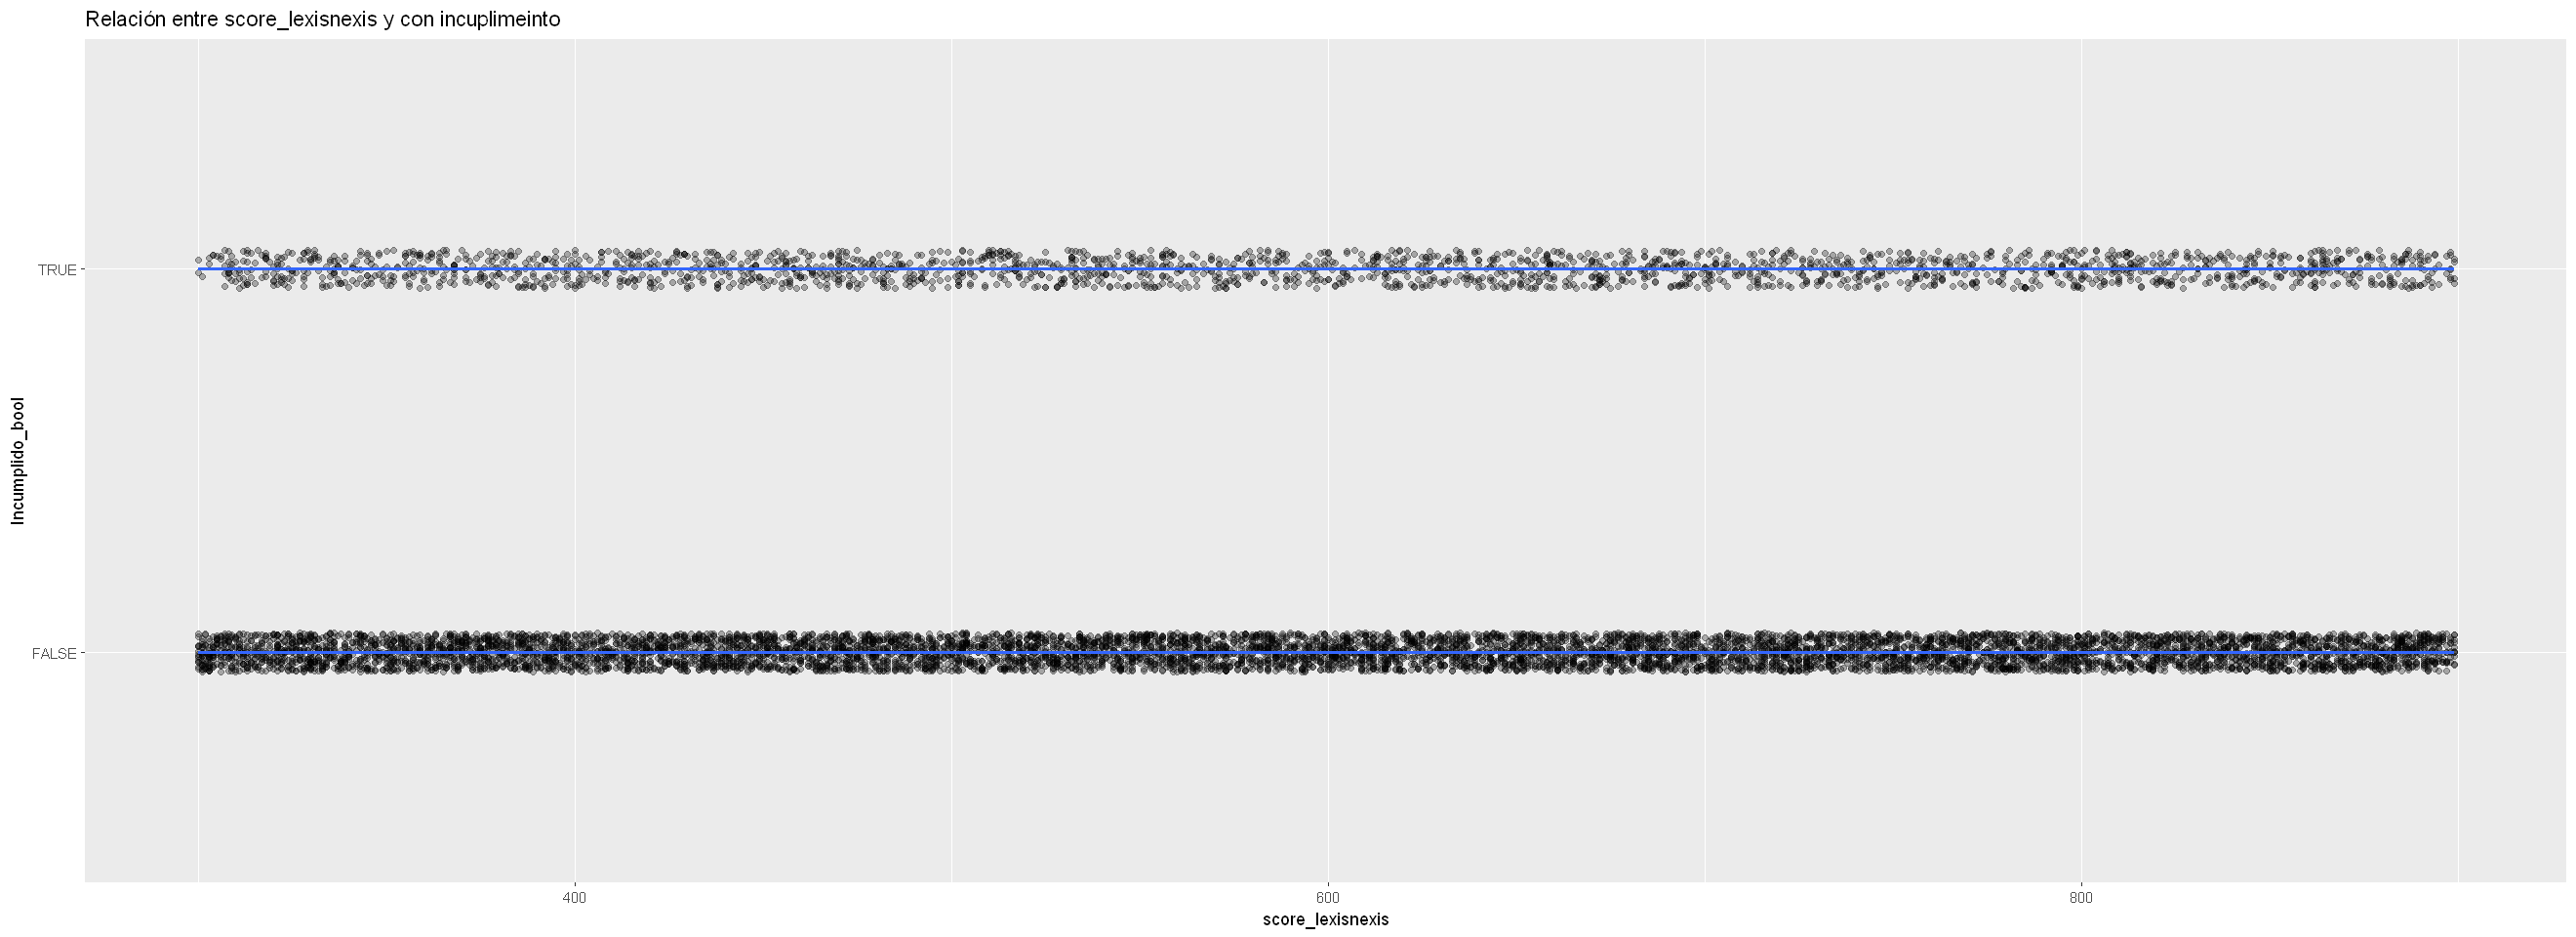

In [79]:
# Score_unit4 vs incumplimiento
ggplot(datos, aes(x = score_lexisnexis, y = Incumplido_bool)) +
  geom_jitter(width = 0, height = 0.05, alpha = 0.3) +
  geom_smooth(method = "loess") +
  labs(title = "Relación entre score_lexisnexis y con incuplimeinto")

In [80]:

datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(score_lexisnexis, na.rm = TRUE),
    Q1_score  = quantile(score_lexisnexis, 0.25, na.rm = TRUE),
    mediana_score = median(score_lexisnexis, na.rm = TRUE),
    promedio_score = mean(score_lexisnexis, na.rm = TRUE),
    Q3_score  = quantile(score_lexisnexis, 0.75, na.rm = TRUE),
    max_score = max(score_lexisnexis, na.rm = TRUE),
    RI = quantile(score_lexisnexis, 0.75, na.rm = TRUE)- quantile(score_lexisnexis, 0.25, na.rm = TRUE)
  )

Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,300,449,599,598.9805,749.00,899,300.00
TRUE,2146,300,455,600,600.2372,746.75,899,291.75


Caso imilar con score_FICO_money, para este caso score_lexisnexis no discrimina adecuadamente el riesgo de incumplimiento.

### Variables numéricas (score_lexisnexis)

`geom_smooth()` using formula = 'y ~ x'


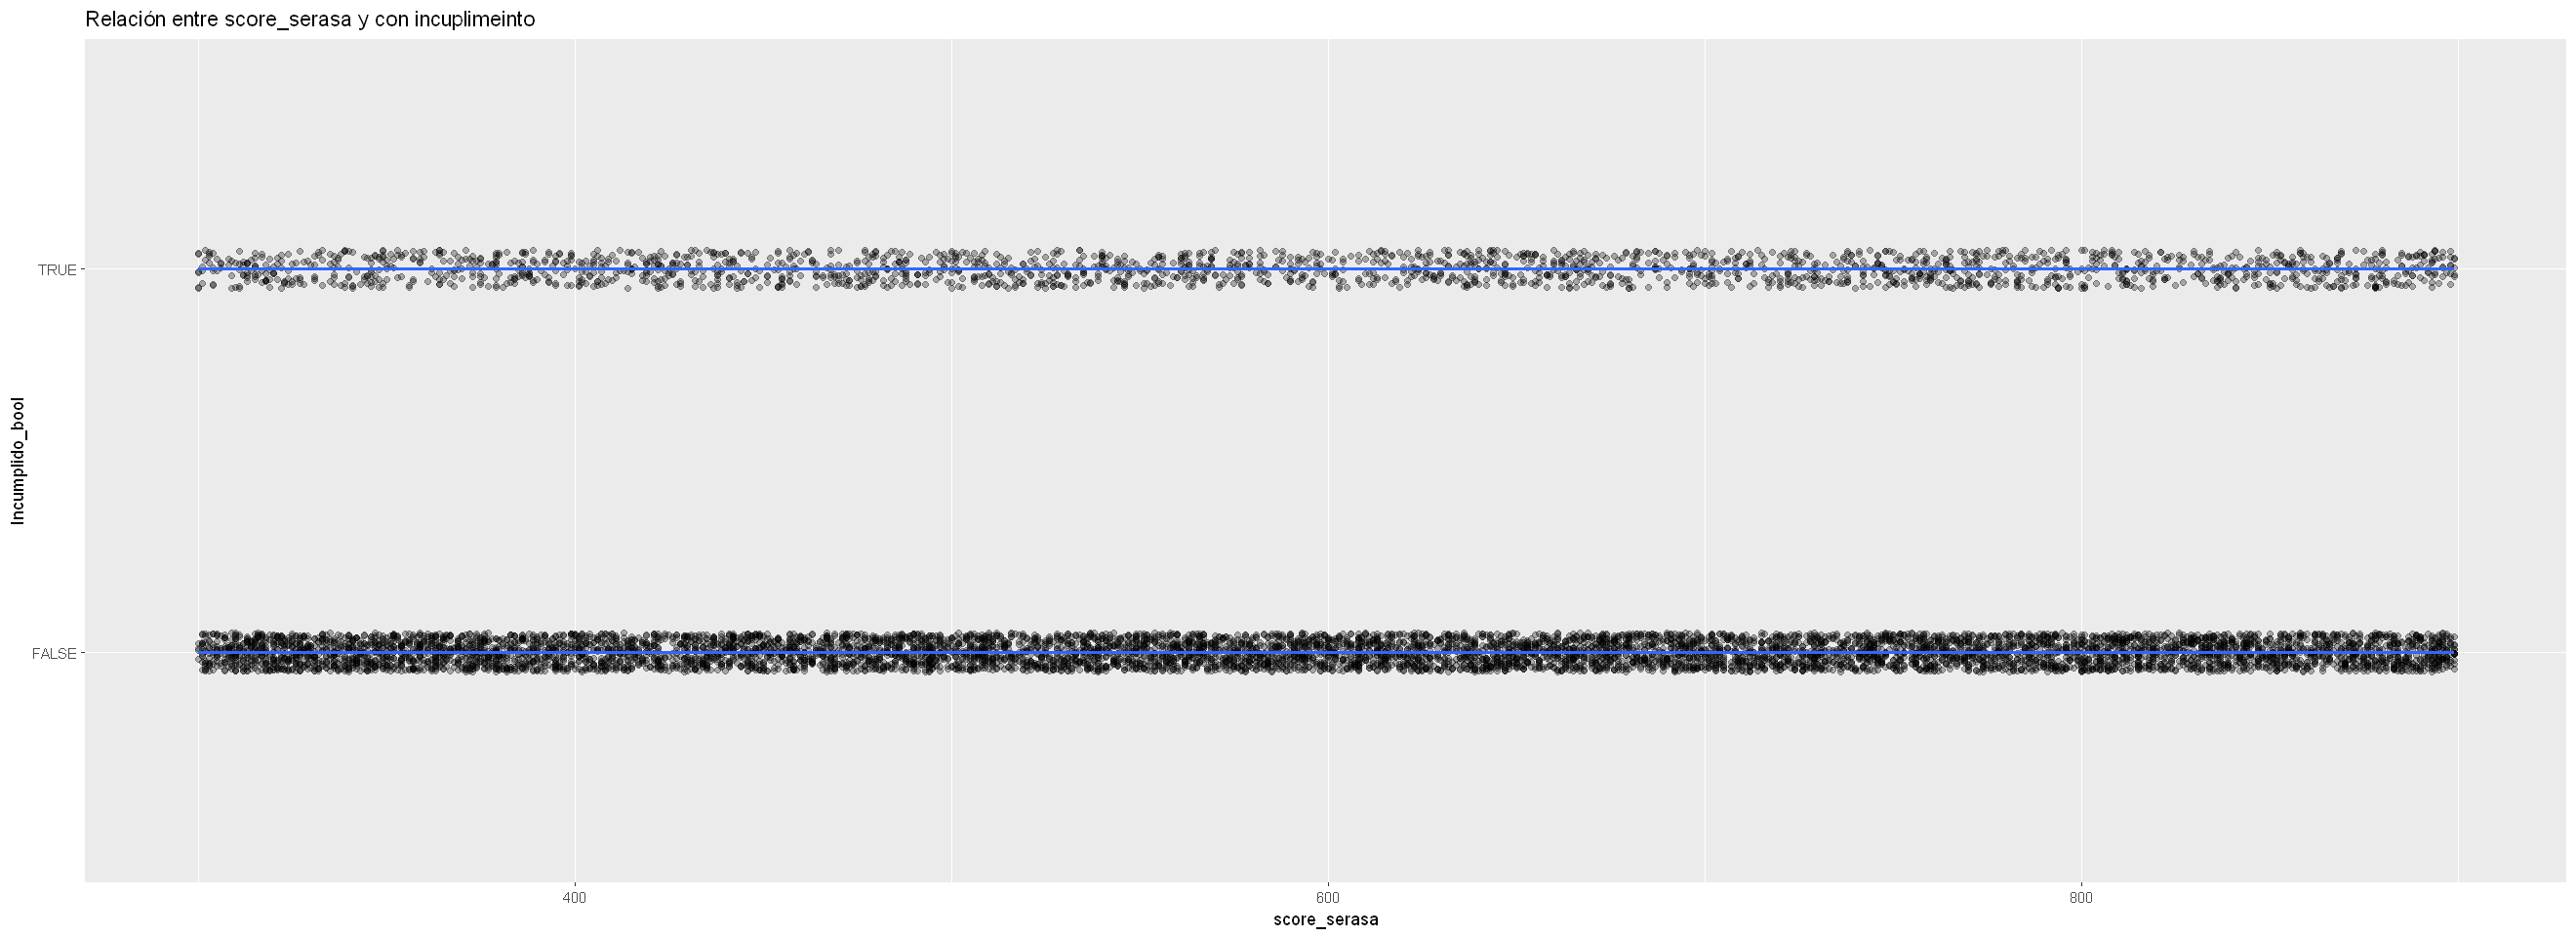

In [81]:
# Score_unit4 vs incumplimiento
ggplot(datos, aes(x = score_serasa, y = Incumplido_bool)) +
  geom_jitter(width = 0, height = 0.05, alpha = 0.3) +
  geom_smooth(method = "loess") +
  labs(title = "Relación entre score_serasa y con incuplimeinto")

In [82]:
datos %>%
  group_by(Incumplido_bool) %>%
  summarise(
    n = n(),
    min_score = min(score_serasa, na.rm = TRUE),
    Q1_score  = quantile(score_serasa, 0.25, na.rm = TRUE),
    mediana_score = median(score_serasa, na.rm = TRUE),
    promedio_score = mean(score_serasa, na.rm = TRUE),
    Q3_score  = quantile(score_serasa, 0.75, na.rm = TRUE),
    max_score = max(score_serasa, na.rm = TRUE),
    RI = quantile(score_serasa, 0.75, na.rm = TRUE)- quantile(score_serasa, 0.25, na.rm = TRUE)
  )

Incumplido_bool,n,min_score,Q1_score,mediana_score,promedio_score,Q3_score,max_score,RI
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,7852,300,450,600.0,599.7900,750,899,300
TRUE,2146,300,455,609.5,604.8267,757,899,302


Caso similar con score_FICO_money y score_lexisnexis. El score score_serasa no discrimina adecuadamente el riesgo de incumplimiento.

### Colinealidad

Un problema común en Estadística es llamado **la colinealidad** y ocurre en modelos de regresión, como los Modelos Lineales Generalizados (GLM), espec´ficamente cuando dos o más variables predictoras (o independientes) están altamente correlacionadas entre sí. En otras palabras, significa que estas variables miden la misma información o casi lo mismo. Esto afecta la capacidad predictiva de modelos y sobre todo la interpretación de los coeficientes. La forma más usual de atacar el problema de colinealidad es conla matriz de correlaciones.



In [64]:
datos$Incumplido_dummy <- as.numeric(datos$Incumplido_bool)


num_vars <- datos %>% 
  dplyr::select_if(is.numeric)

correlaciones <- cor(num_vars, use = "pairwise.complete.obs")

correlaciones


,id_1,score_unit4,Edad,Ingresos_mensuales,score_TU,score_FICO_money,score_lexisnexis,score_serasa,Cupo_solicitado,Cupo_aprobado,Gasto_mensual,cantidad_creditos,n_incumplimientos,n_cumplimientos,anio_cliente_hasta,mes_cliente_hasta,anio_fecha_aplicacion,mes_fecha_aplicacion,Incumplido_dummy
id_1,1.000000000,-0.009505285,0.010361229,-0.001059278,-0.004229212,-0.0037651620,0.0060643306,0.007582982,0.011751900,0.0098477573,0.0020182478,0.0105382097,0.0175239906,-0.0171474293,0.001254680,-0.0029215539,0.001254680,-0.0029215539,0.002649668
score_unit4,-0.009505285,1.000000000,-0.009572015,0.397289730,0.690681283,-0.0039156746,-0.0040410827,-0.018863756,-0.159750449,-0.1872214187,-0.1365615683,-0.0189052966,-0.6997798118,0.6992150510,-0.001229814,0.0058742999,-0.001229814,0.0058742999,-0.742954744
Edad,0.010361229,-0.009572015,1.000000000,0.005313443,-0.010509705,-0.0083969318,0.0014267704,0.014117217,0.001750761,0.0011288437,0.0024345653,-0.0108661732,0.0017663639,-0.0021579322,-0.004946898,-0.0014487211,-0.004946898,-0.0014487211,-0.008493228
Ingresos_mensuales,-0.001059278,0.397289730,0.005313443,1.000000000,0.008655594,-0.0065824702,-0.0121856575,-0.008460830,0.004253209,0.0048521984,0.0078751886,-0.0148247199,-0.2588310031,0.2583400884,-0.021950752,0.0064133561,-0.021950752,0.0064133561,-0.412709392
score_TU,-0.004229212,0.690681283,-0.010509705,0.008655594,1.000000000,0.0075033478,0.0047669291,-0.015232105,0.005968623,0.0061939869,0.0093794657,-0.0107501263,-0.5123987501,0.5120965860,0.006935296,-0.0036221132,0.006935296,-0.0036221132,-0.359100912
score_FICO_money,-0.003765162,-0.003915675,-0.008396932,-0.006582470,0.007503348,1.0000000000,-0.0175130513,-0.015833344,0.001790963,0.0005385112,-0.0056691072,-0.0052828091,-0.0056028164,0.0054135186,0.007663292,-0.0076213676,0.007663292,-0.0076213676,0.003802446
score_lexisnexis,0.006064331,-0.004041083,0.001426770,-0.012185658,0.004766929,-0.0175130513,1.0000000000,-0.006084196,0.009205345,0.0121080150,0.0153291353,-0.0007165627,-0.0008221567,0.0007964905,0.007374770,-0.0127211918,0.007374770,-0.0127211918,0.002987069
score_serasa,0.007582982,-0.018863756,0.014117217,-0.008460830,-0.015232105,-0.0158333438,-0.0060841957,1.000000000,-0.008411762,-0.0064098815,-0.0117230354,-0.0135669200,0.0217396644,-0.0222317935,0.002361024,-0.0211133908,0.002361024,-0.0211133908,0.011921653
Cupo_solicitado,0.011751900,-0.159750449,0.001750761,0.004253209,0.005968623,0.0017909629,0.0092053451,-0.008411762,1.000000000,0.9595979735,0.7403238860,0.0123834568,0.0966869428,-0.0962570584,0.002830492,-0.0079193102,0.002830492,-0.0079193102,0.253789946
Cupo_aprobado,0.009847757,-0.187221419,0.001128844,0.004852198,0.006193987,0.0005385112,0.0121080150,-0.006409881,0.959597973,1.0000000000,0.7676531899,0.0101812207,0.1147263698,-0.1143787749,0.003587196,-0.0031012311,0.003587196,-0.0031012311,0.296453753


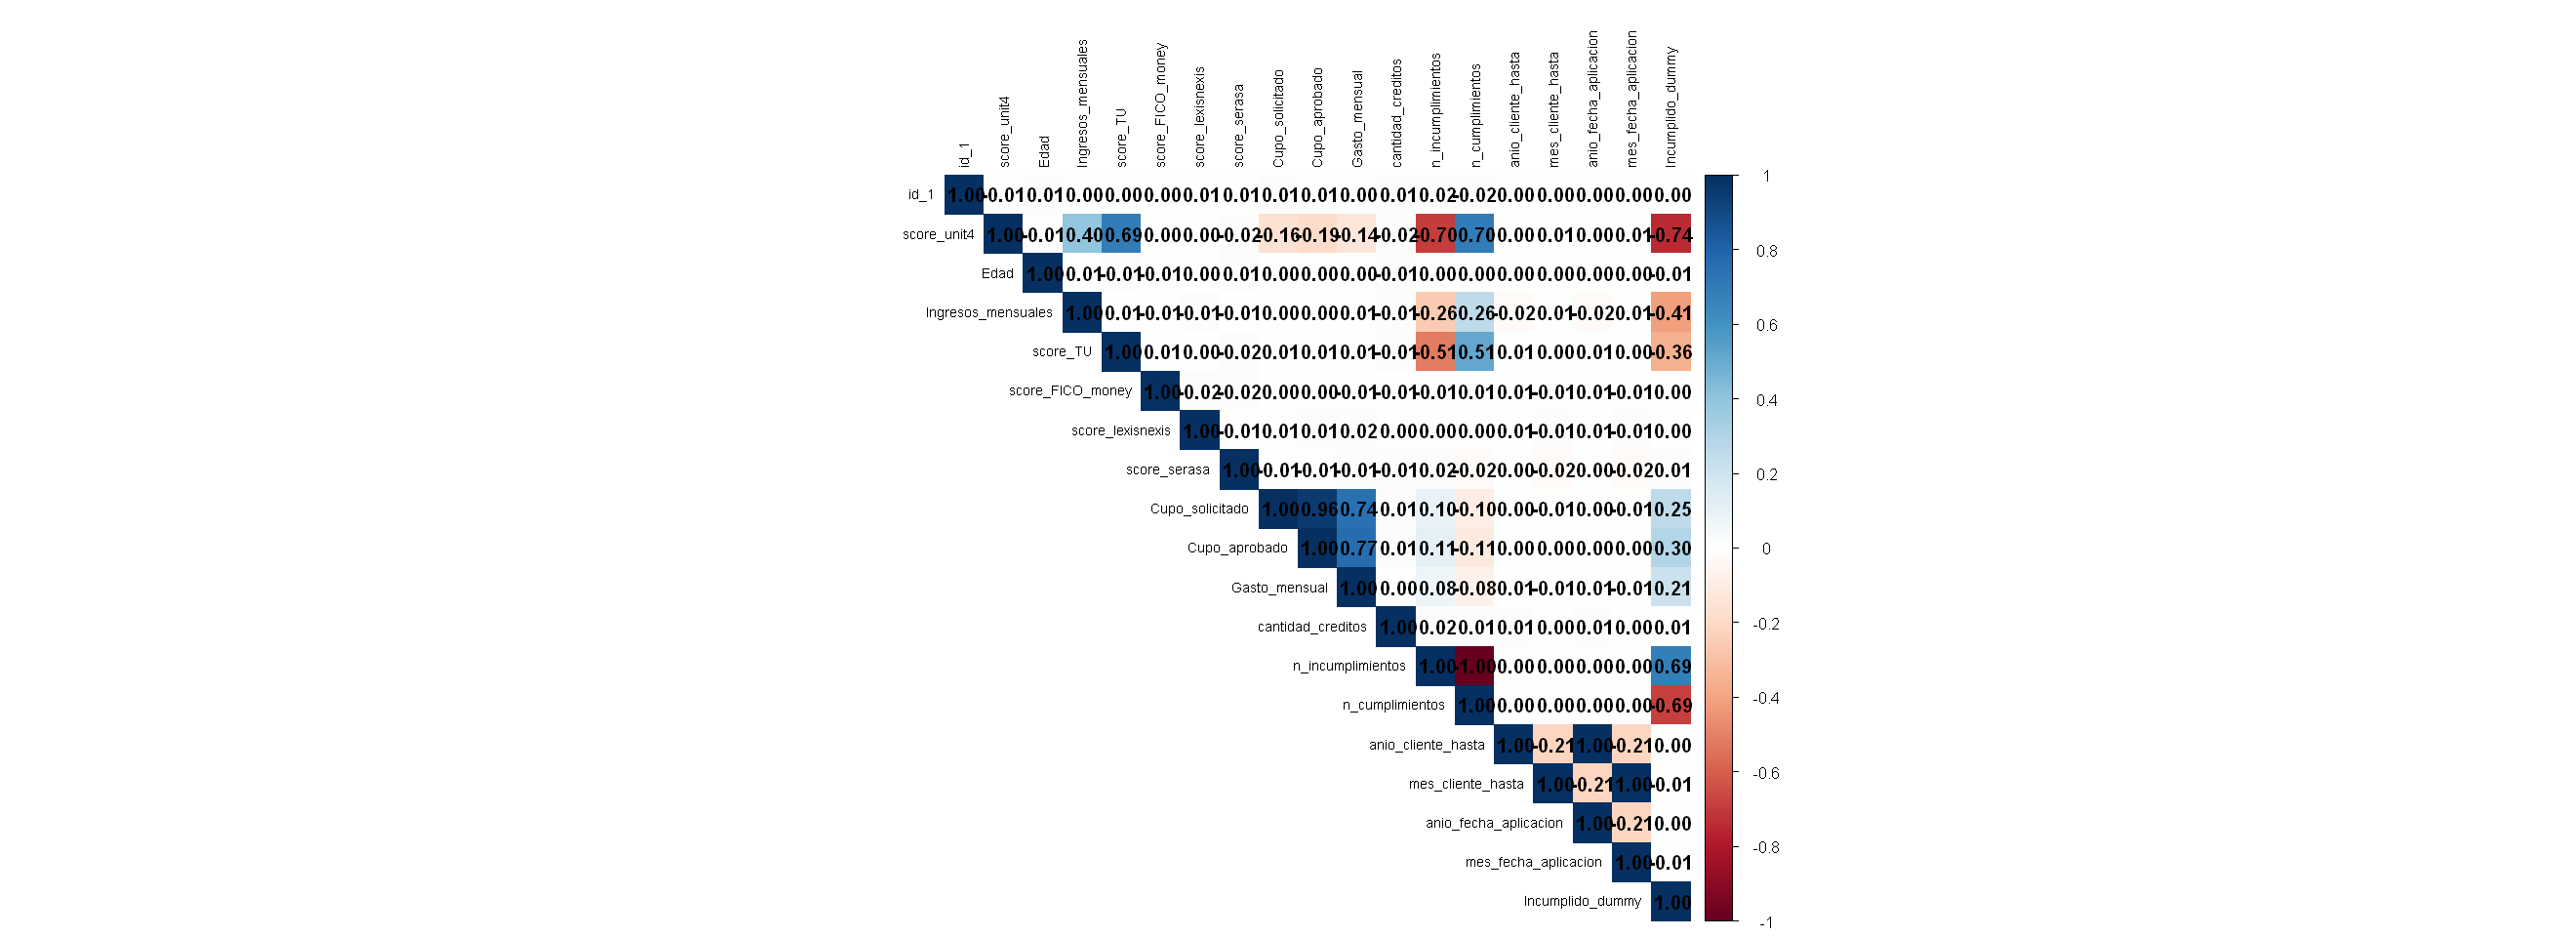

In [66]:
library(corrplot)

corrplot(correlaciones, method = "color", type = "upper",
         tl.cex = 0.7, tl.col = "black", addCoef.col = "black")


Seleccionando variable objetivo para identificar colinealidad con **Incumplido_dummy**

In [67]:
cor_objetivo <- correlaciones[,"Incumplido_dummy"]
cor_ordenadas <- sort(abs(cor_objetivo), decreasing = TRUE)  # Ordeno de mayor a menor correlación absoluta
cor_ordenadas

Incumplido_dummy           score_unit4     n_incumplimientos 
          1.000000000           0.742954744           0.687557041 
      n_cumplimientos    Ingresos_mensuales              score_TU 
          0.687317006           0.412709392           0.359100912 
        Cupo_aprobado       Cupo_solicitado         Gasto_mensual 
          0.296453753           0.253789946           0.211974726 
         score_serasa     cantidad_creditos                  Edad 
          0.011921653           0.009831021           0.008493228 
    mes_cliente_hasta  mes_fecha_aplicacion    anio_cliente_hasta 
          0.008003046           0.008003046           0.004344061 
anio_fecha_aplicacion      score_FICO_money      score_lexisnexis 
          0.004344061           0.003802446           0.002987069 
                 id_1 
          0.002649668

* **NOTA**: El análisis de correlaciones muestra que las variables **score_unit4**, **n_incumplimientos** y **n_cumplimientos** presentan la mayor relación con el incumplimiento, siendo **score_unit4** el predictor más fuerte, ya que concentra casi toda la información de la variable respuesta (se observó en anteriores análisis). Así mismo scores externos (score_serasa, score_lexisnexis, score_FICO_money) muestran una relación débil y pueden excluirse.

### Modelo que prediga el riesgo de incumplimiento a partir de los datos disponibles

l modelo más apropiado para abordar el análisis del riesgo de incumplimiento (datos obtenidos de clientes) es la regresión logística y a continuación la formulo como un modelo lineal generalizado (GLM) con familia binomial y función de enlace logit. Esta elección se fundamenta en la naturaleza dicotómica de la variable dependiente (incumplimiento).

Procedo a organizar las variables independientes (por factores) y quitar de mi conjunto de datos la variables con alta colinealidad:

In [69]:
source("macros.txt") 

In [70]:
datos_m <-within(datos,{Ciudad  <- factor(Ciudad , levels=c("Bogotá","Barranquilla","Bucaramanga","Cali","Medellín") )})
datos_m <-within(datos_m,{Sexo  <- factor(Sexo , levels=c("male","female") )})
datos_m <-within(datos_m,{Ocupacion  <- factor(Ocupacion , levels=c("Ama de casa","Empleado","Estudiante","Independiente","Pensionado" ) )})
datos_m <-within(datos_m,{Duracion_perfil_de_facebook  <- factor(Duracion_perfil_de_facebook , levels=c("<4 meses","1-3 años","3+ años","4-12 meses" ) )})
datos_m <-within(datos_m,{Canal_cobranza  <- factor(Canal_cobranza , levels=c("Call center","Correo","Ninguno","SMS","Whatsapp" ) )})
datos_m <-within(datos_m,{Resultado_cobranza  <- factor(Resultado_cobranza , levels=c("Pago parcial","Promesa de pago","No contactado","No aplica","Sin gestión" ) )})

str(datos_m)

tibble [9,998 × 29] (S3: tbl_df/tbl/data.frame)
 $ id_1                       : num [1:9998] 8e+07 8e+07 8e+07 8e+07 8e+07 ...
 $ score_unit4                : num [1:9998] 858 678 753 532 655 890 846 859 687 762 ...
 $ Fecha_aplicacion           : Date[1:9998], format: "2019-01-18" "2022-06-09" ...
 $ Ciudad                     : Factor w/ 5 levels "Bogotá","Barranquilla",..: 4 1 2 1 1 4 3 1 1 1 ...
 $ Edad                       : num [1:9998] 50 27 31 19 20 21 57 25 57 44 ...
 $ Sexo                       : Factor w/ 2 levels "male","female": 1 2 2 1 2 2 2 2 1 1 ...
 $ Ocupacion                  : Factor w/ 5 levels "Ama de casa",..: 2 4 3 1 5 4 1 3 5 3 ...
 $ Ingresos_mensuales         : num [1:9998] 3017 636 1631 2706 3172 ...
 $ Duracion_perfil_de_facebook: Factor w/ 4 levels "<4 meses","1-3 años",..: 2 4 3 4 1 2 3 1 2 4 ...
 $ score_TU                   : num [1:9998] 694 769 685 562 355 683 796 644 743 871 ...
 $ score_FICO_money           : num [1:9998] 740 740 536 799 466 599 6

In [71]:
datos_m <- datos_m[, !(names(datos_m) %in% c("id_1", "Fecha_aplicacion", "Cliente_hasta","Incumplido","score_unit4", "n_incumplimientos", "n_cumplimientos","Incumplido_bool"))]
str(datos_m)

tibble [9,998 × 21] (S3: tbl_df/tbl/data.frame)
 $ Ciudad                     : Factor w/ 5 levels "Bogotá","Barranquilla",..: 4 1 2 1 1 4 3 1 1 1 ...
 $ Edad                       : num [1:9998] 50 27 31 19 20 21 57 25 57 44 ...
 $ Sexo                       : Factor w/ 2 levels "male","female": 1 2 2 1 2 2 2 2 1 1 ...
 $ Ocupacion                  : Factor w/ 5 levels "Ama de casa",..: 2 4 3 1 5 4 1 3 5 3 ...
 $ Ingresos_mensuales         : num [1:9998] 3017 636 1631 2706 3172 ...
 $ Duracion_perfil_de_facebook: Factor w/ 4 levels "<4 meses","1-3 años",..: 2 4 3 4 1 2 3 1 2 4 ...
 $ score_TU                   : num [1:9998] 694 769 685 562 355 683 796 644 743 871 ...
 $ score_FICO_money           : num [1:9998] 740 740 536 799 466 599 652 786 355 502 ...
 $ score_lexisnexis           : num [1:9998] 528 615 708 427 714 884 416 662 744 860 ...
 $ score_serasa               : num [1:9998] 510 305 473 515 539 747 747 674 783 333 ...
 $ Cupo_solicitado            : num [1:9998] 15872 1337

primer modelo (un poco saturado de variables)

In [72]:
eta <- Incumplido_dummy~ Ciudad +Edad+Sexo+Ocupacion+Ingresos_mensuales+Duracion_perfil_de_facebook+Cupo_solicitado+Cupo_aprobado+Gasto_mensual+cantidad_creditos+anio_cliente_hasta+
          mes_cliente_hasta+score_TU+score_FICO_money+score_lexisnexis+score_serasa

fit1<-glm(eta, family = binomial("logit"), data = datos_m) 
summary(fit1)


Call:
glm(formula = eta, family = binomial("logit"), data = datos_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5287  -0.3648  -0.1140  -0.0151   3.5686  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -5.534e+00  5.352e+01  -0.103  0.91765
CiudadBarranquilla                    -1.124e-01  1.117e-01  -1.006  0.31434
CiudadBucaramanga                     -2.261e-01  1.262e-01  -1.791  0.07329
CiudadCali                            -3.352e-01  1.111e-01  -3.016  0.00256
CiudadMedellín                        -9.478e-02  9.808e-02  -0.966  0.33387
Edad                                  -2.942e-03  2.435e-03  -1.208  0.22701
Sexofemale                            -8.001e-02  7.277e-02  -1.100  0.27155
OcupacionEmpleado                      1.651e-02  1.162e-01   0.142  0.88697
OcupacionEstudiante                    8.711e-02  1.160e-01   0.751  0.45269
OcupacionIndependiente         

In [73]:
eta <- Incumplido_dummy~ Ciudad +Edad+Sexo+Ocupacion+Ingresos_mensuales+Cupo_solicitado+Cupo_aprobado+Gasto_mensual+cantidad_creditos+score_TU
fit1<-glm(eta, family = binomial("logit"), data = datos_m) 
summary(fit1)


Call:
glm(formula = eta, family = binomial("logit"), data = datos_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4685  -0.3663  -0.1146  -0.0152   3.5704  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             8.864e+00  6.144e+00   1.443  0.14907    
CiudadBarranquilla     -1.153e-01  1.117e-01  -1.033  0.30177    
CiudadBucaramanga      -2.258e-01  1.260e-01  -1.791  0.07324 .  
CiudadCali             -3.334e-01  1.110e-01  -3.003  0.00267 ** 
CiudadMedellín         -9.668e-02  9.799e-02  -0.987  0.32383    
Edad                   -3.080e-03  2.433e-03  -1.266  0.20547    
Sexofemale             -7.849e-02  7.268e-02  -1.080  0.28022    
OcupacionEmpleado       2.126e-02  1.159e-01   0.183  0.85444    
OcupacionEstudiante     9.113e-02  1.157e-01   0.788  0.43071    
OcupacionIndependiente  1.167e-01  1.152e-01   1.013  0.31089    
OcupacionPensionado     2.102e-01  1.146e-01   1.835  0.06655 .  
Ingresos_

Usaré el step_glm que es un procedimeinto iterativo para seleccionar automáticamente las variables más relevantes en un modelo de regresión en este caso uno de respuesta bernulli. (regresión logística). El método se inicia con el modelo saturado (backward).

In [74]:
step_glm(fit1,direction="backward",criterion="BIC")    


  Family:  binomial 
    Link:  logit 

Initial model:
Incumplido_dummy ~ 1 + Ciudad + Edad + Sexo + Ocupacion + Ingresos_mensuales + Cupo_solicitado + Cupo_aprobado + Gasto_mensual + cantidad_creditos + score_TU 

Step 0 :    
                     Df       BIC       AIC   Deviance+  Pearson^  p-value*
- Ocupacion           4   5034.8054 4941.0736    0.5268    0.1387    0.3706
- Ciudad              4   5040.8848 4947.1530    0.5262    0.1441    0.0364
- cantidad_creditos   1   5058.2452 4942.8830    0.5270    0.1398    0.7995
- Sexo                1   5059.3344 4943.9722    0.5269    0.1452    0.2802
- Edad                1   5059.7716 4944.4093    0.5269    0.1440    0.2055
- Gasto_mensual       1   5060.3665 4945.0043    0.5268    0.1487    0.1384
<none>                    5067.3782 4944.8058    0.5270    0.1398          
- Cupo_solicitado     1   5219.1535 5103.7912    0.5115    0.1656    0.0000
- Cupo_aprobado       1   5645.0224 5529.6601    0.4705    0.1026    0.0000
- score_TU 

$$Incumplido dummy = 1 + Ingresos mensuales + Cupo solicitado + Cupo aprobado + score TU $$

In [79]:
eta <- Incumplido_dummy~Ingresos_mensuales+Cupo_solicitado+Cupo_aprobado+cantidad_creditos+score_TU

fit2<-glm(eta , family = binomial("logit"), data = datos_m)
summary(fit2)


Call:
glm(formula = eta, family = binomial("logit"), data = datos_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5088  -0.3681  -0.1152  -0.0155   3.5010  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         8.661e+00  5.626e+00   1.539    0.124    
Ingresos_mensuales -2.905e-03  7.581e-05 -38.323   <2e-16 ***
Cupo_solicitado    -1.814e-04  1.480e-05 -12.259   <2e-16 ***
Cupo_aprobado       4.186e-04  1.846e-05  22.669   <2e-16 ***
cantidad_creditos  -1.574e+00  5.620e+00  -0.280    0.779    
score_TU           -1.100e-02  3.061e-04 -35.946   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10398.8  on 9997  degrees of freedom
Residual deviance:  4930.5  on 9992  degrees of freedom
AIC: 4942.5

Number of Fisher Scoring iterations: 7


In [76]:
step_glm(fit2,direction="backward",criterion="BIC")  


  Family:  binomial 
    Link:  logit 

Initial model:
Incumplido_dummy ~ 1 + Ingresos_mensuales + Cupo_solicitado + Cupo_aprobado + cantidad_creditos + score_TU 

Step 0 :    
                     Df       BIC       AIC   Deviance+  Pearson^  p-value*
- cantidad_creditos   1   4976.6695 4940.6188    0.5257    0.1618    0.7794
<none>                    4985.7858 4942.5250    0.5256    0.1618          
- Cupo_solicitado     1   5138.1644 5102.1137    0.5101    0.1864    0.0000
- Cupo_aprobado       1   5597.9501 5561.8994    0.4659    0.0961    0.0000
- score_TU            1   7248.9737 7212.9230    0.3071    0.1235    0.0000
- Ingresos_mensuales  1   7885.4989 7849.4482    0.2458    0.1427    0.0000

Step 1 :  - cantidad_creditos 
                     Df       BIC       AIC   Deviance+  Pearson^  p-value*
<none>                    4976.6695 4940.6188    0.5257    0.1618          
- Cupo_solicitado     1   5129.2038 5100.3633    0.5101    0.1864    0.0000
- Cupo_aprobado       1   5589

Validar las interacciones en el modelo es importante porque permite identificar cómo el efecto de una variable sobre el incumplimiento puede cambiar dependiendo de otra. Por ejemplo, el impacto del cupo aprobado podría variar según el nivel de ingresos o el score de crédito. Incluir estas relaciones mejora la capacidad explicativa y hace que el modelo sea más realista frente al comportamiento de los clientes. Por lo tanto se realiza el análisis con interacciones dobles y triples

In [89]:
fit3<-glm(Incumplido_dummy~ 1 + Ingresos_mensuales * Cupo_aprobado * score_TU , family = binomial("logit"), data = datos_m)
summary(fit3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Incumplido_dummy ~ 1 + Ingresos_mensuales * Cupo_aprobado * 
    score_TU, family = binomial("logit"), data = datos_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1549  -0.1134  -0.0206   0.0000   3.8448  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                8.901e+01  2.994e+00   29.73
Ingresos_mensuales                        -5.266e-02  1.755e-03  -30.00
Cupo_aprobado                             -4.073e-03  1.466e-04  -27.79
score_TU                                  -1.306e-01  4.448e-03  -29.36
Ingresos_mensuales:Cupo_aprobado           2.579e-06  8.791e-08   29.33
Ingresos_mensuales:score_TU                6.901e-05  2.374e-06   29.07
Cupo_aprobado:score_TU                     6.205e-06  2.234e-07   27.77
Ingresos_mensuales:Cupo_aprobado:score_TU -3.582e-09  1.239e-10  -28.92
                                          Pr(>|z|)    
(Intercept)                 

**NOTA SOBRE EL MODELO:**

* El modelo de regresión logística ajustado es altamente significativo y presenta un buen nivel de ajuste. 

* Las variables Ingresos_mensuales, Cupo_aprobado y score_TU, junto con sus interacciones, tienen un impacto estadísticamente relevante en la probabilidad de incumplimiento. En general, niveles altos de ingreso, score y cupo aprobado se asocian con menor riesgo de incumplimiento, y sus efectos combinados potencian este comportamiento.

## Análisis de sensibilidad 

La siguiente gráfica es la de los residuos cuantil, sirve para evaluar la calidad del ajuste de tu modelo logístico. En concreto, permite ver si los residuos tipo desviancia (las diferencias entre lo que el modelo predice y lo que realmente ocurrió) se comportan de manera aleatoria o si muestran patrones sistemáticos que indicarían problemas en el modelo.

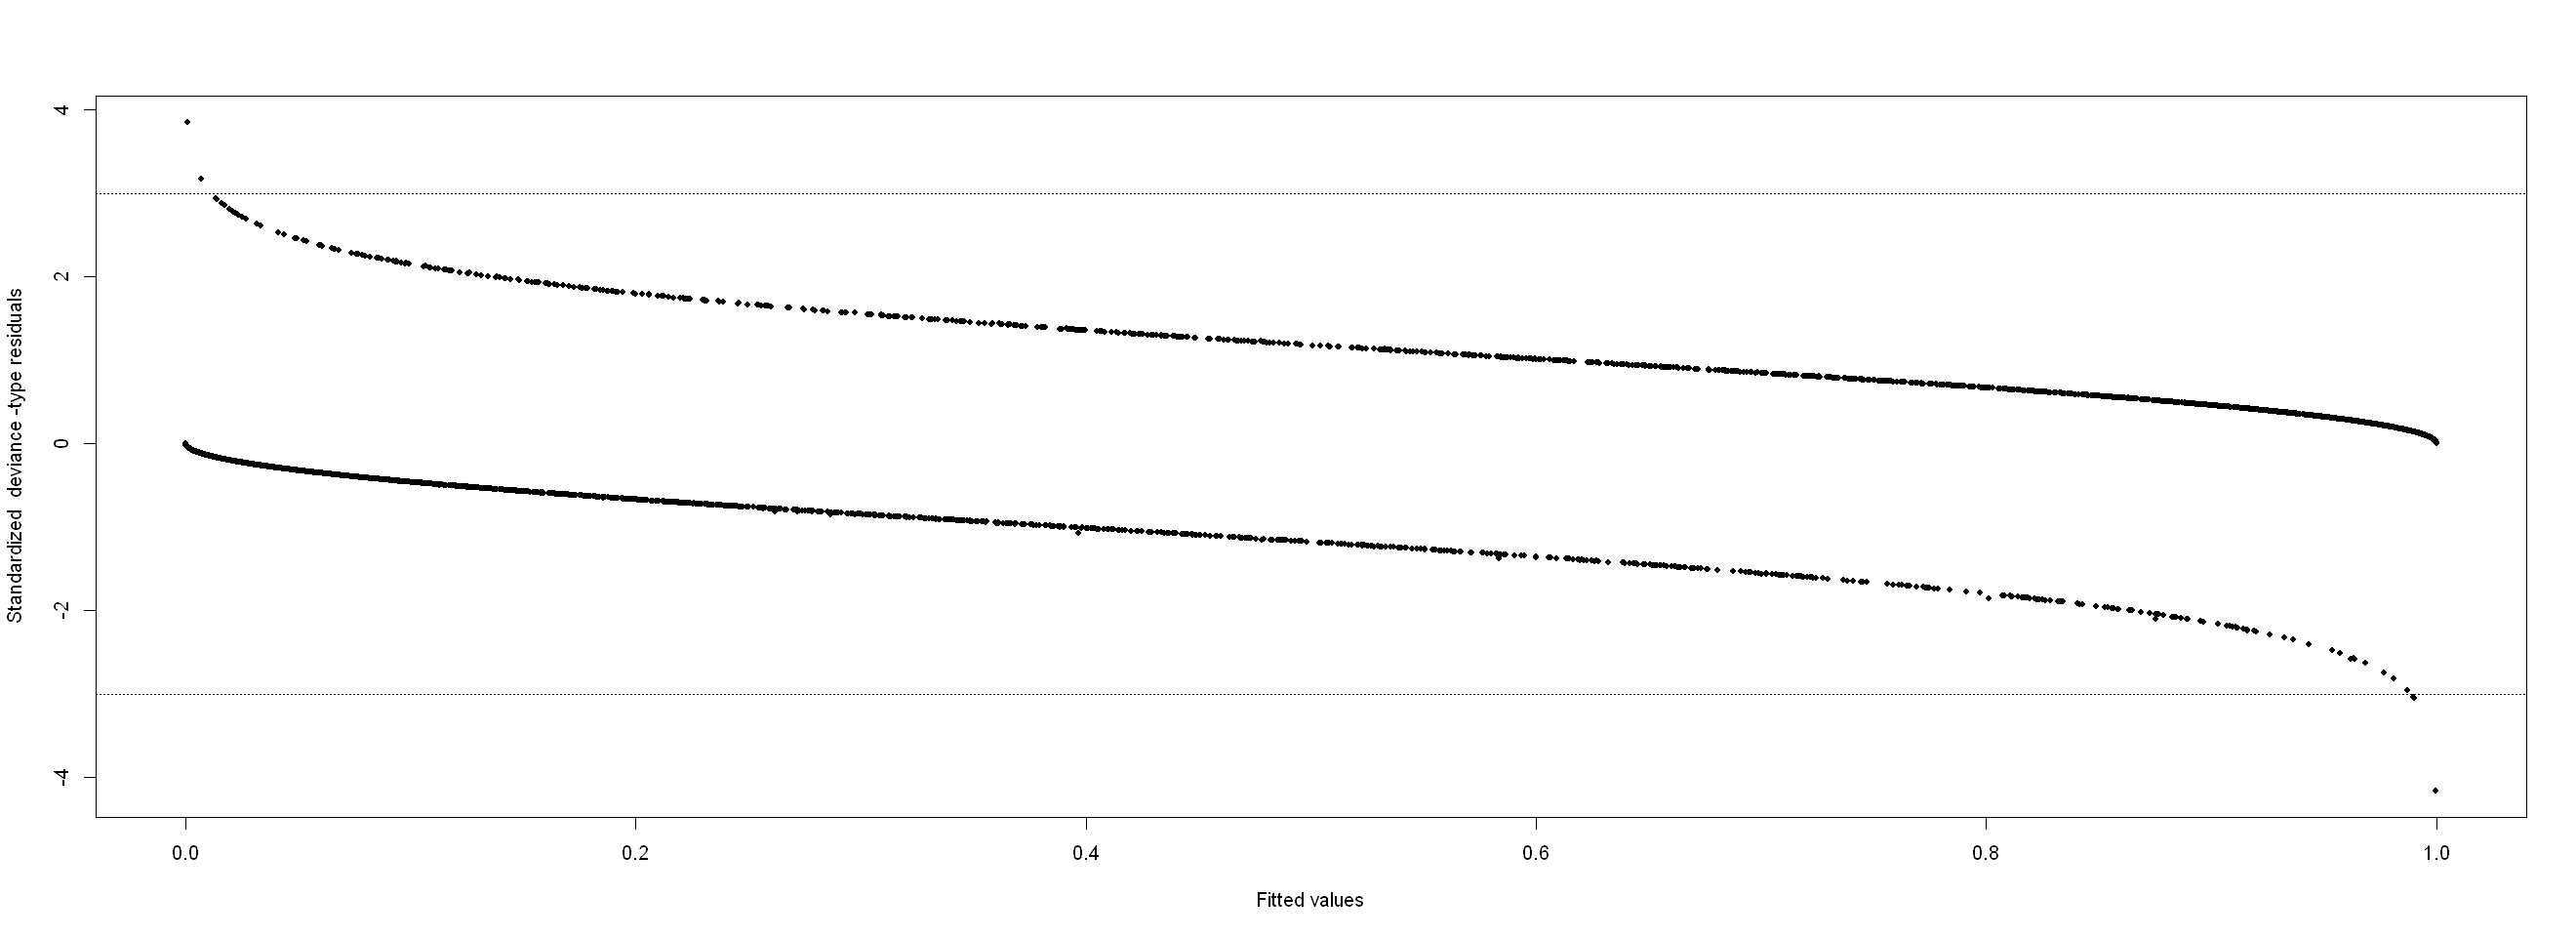

In [90]:
residuals_glm(fit3, type="deviance")

el gráfico que se observa, corresponde a los residuos tipo desviancia (deviance residuals) frente a los valores ajustados (fitted values)

* Muestra un patrón esperado para un modelo logístico bien ajustado.
* No presenta una tendencia sistemática clara ni valores atípicos excesivos.
* Sugiere que la especificación del modelo es razonabl.

por el momento omito analisis de residuos Peearson.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


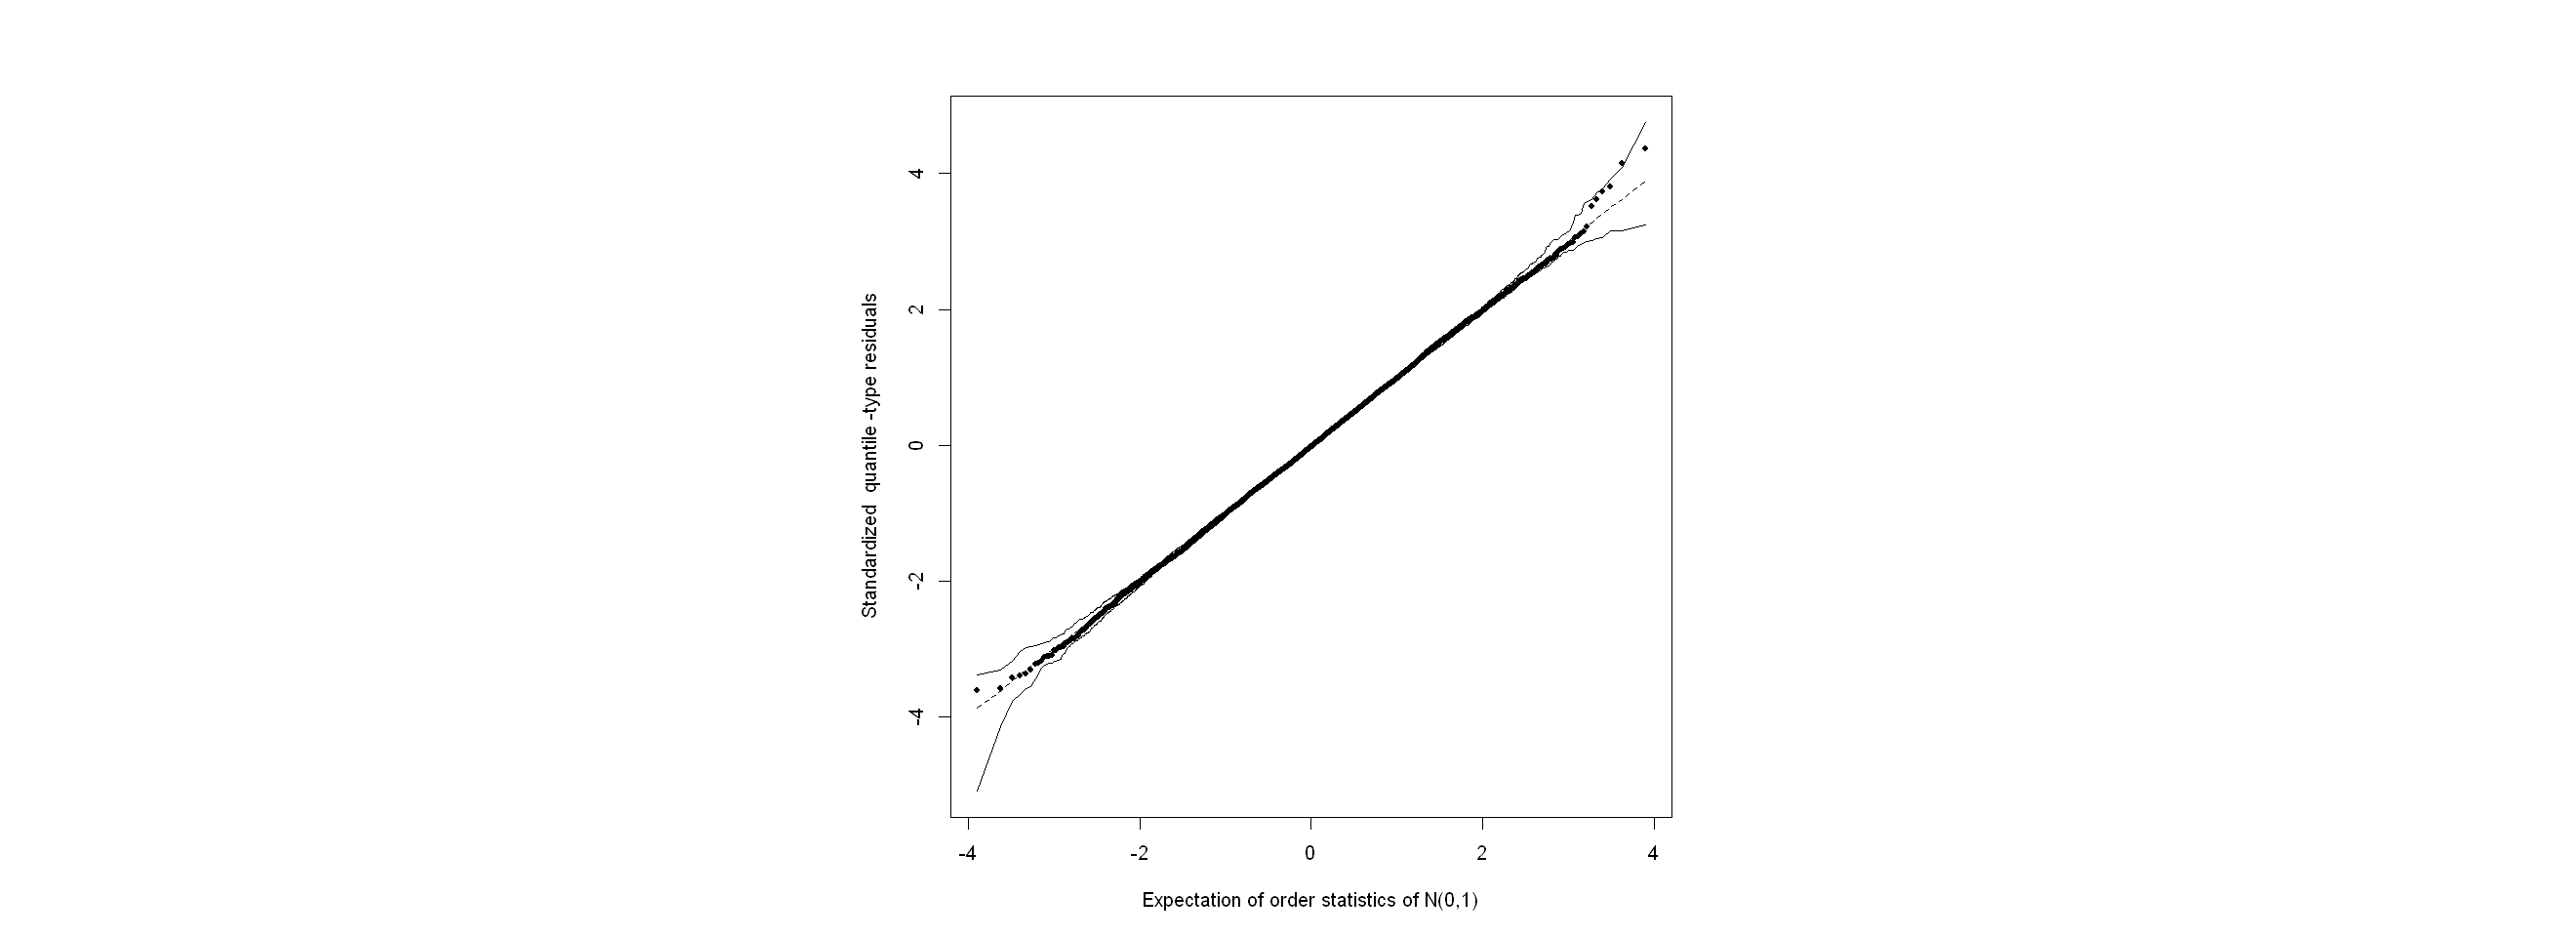

In [91]:
envelope_glm(fit3)

El gráfico “envelope” permite evaluar la adecuación del modelo comparando los residuos estandarizados con los cuantiles teóricos de una distribución normal. En este caso, los puntos se alinean de manera cercana a la línea de referencia y la mayoría se encuentra dentro del intervalo simulado, lo que sugiere que el modelo presenta un buen ajuste y no evidencia problemas importantes en los supuestos de la regresión logística.

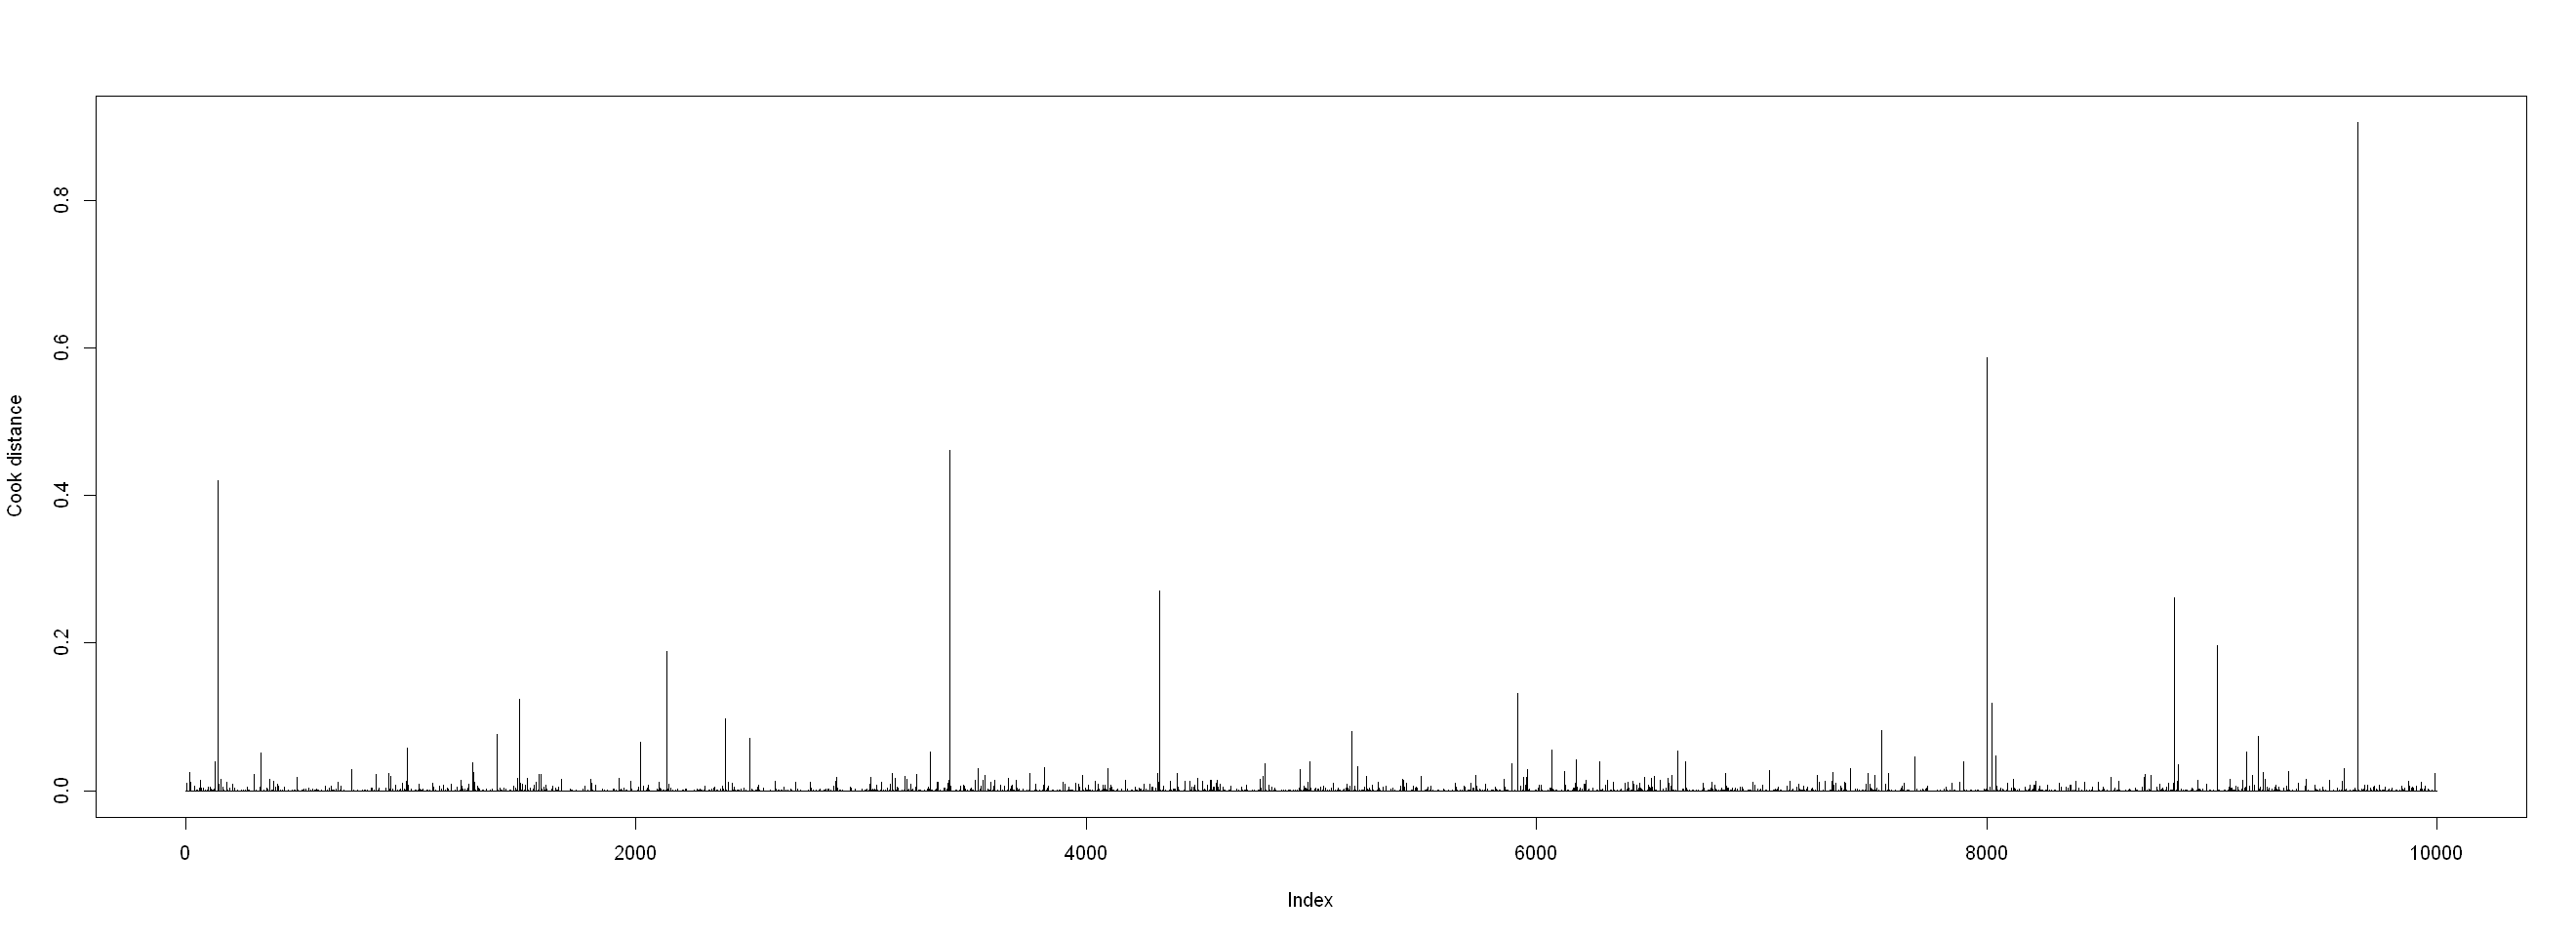

In [92]:
Cookdis_glm(fit3)

Para determinar cuánto influye cada observación individual en el ajuste global del modelo, se realiza la gráfica de distancias de cook. para un mejor modelo se deben quitr observaciones, esto mejorará considerable la estimación de los paráetros del modelo.


El mejor modelo hasta este punto es:


$$Incumplido \sim 1 + Ingresos mensuales * Cupo aprobado * score TU$$

In [97]:
coef(fit3)

(Intercept) 
                             8.900598e+01 
                       Ingresos_mensuales 
                            -5.265708e-02 
                            Cupo_aprobado 
                            -4.072910e-03 
                                 score_TU 
                            -1.305760e-01 
         Ingresos_mensuales:Cupo_aprobado 
                             2.578772e-06 
              Ingresos_mensuales:score_TU 
                             6.901278e-05 
                   Cupo_aprobado:score_TU 
                             6.204827e-06 
Ingresos_mensuales:Cupo_aprobado:score_TU 
                            -3.582500e-09



# Interpretación de los $\beta$ dada la función de enlace Logit


 
Considerando que $\hat{\beta}_2=-0.05$, se tiene:

  $$exp(\hat{\beta}_2) = exp(-0.05)= 0.951229424500714$$
 
* **Interpretación ingresos mensuales:** Cada aumento unitario en ingresos mensuales reduce la razón de probabilidades de incumplir en aproximadamente 5%.


In [100]:
exp(-0.05)

[1] 0.9512294

In [103]:
1- exp(-0.05)

[1] 0.04877058

In [101]:
exp(-0.004)

[1] 0.996008

In [102]:
1 -exp(-0.004)

[1] 0.003992011

Considerando que $\hat{\beta}_3=-0.004$, se tiene:

  $$exp(\hat{\beta}_2) = exp(-0.004)= 0.99$$
 
* **Cupo_aprobado:** En cada aumento unitario en ingresos mensuales se espera también una ligera disminución en la probabilidad de incumplimiento.



  $$exp(\hat{\beta}_3) = exp(-0.13)= 0.87$$
 
* **Score_TU:** Al comparar dos clientes con las mismas condiciones, pero uno de ellos con una unidad de score_TU mayor.  El chance de ser incumplido para el que tiene una unidad mayor en Score_TU es  12%.


  $$exp(\hat{\beta}_4) = exp(2.55)= 12.18$$
 
* **ngresos_mensuales:Cupo_aprobado** Por cada unidad adicional en esta interacción, el chance de ser incumplido aumenta  12%
 .



In [106]:
exp(-0.13)

[1] 0.8780954

In [107]:
1-exp(-0.13)

[1] 0.1219046

In [108]:
exp(2.5)

[1] 12.18249

---
# 2: Segmentación de clientes

Se realizó un modelo lineal generalizado con respuesta binomial (convertida en Bernulli) y función de enlace Logit, cuyo parámetros son:

In [109]:
summary(fit3)


Call:
glm(formula = Incumplido_dummy ~ 1 + Ingresos_mensuales * Cupo_aprobado * 
    score_TU, family = binomial("logit"), data = datos_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1549  -0.1134  -0.0206   0.0000   3.8448  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                8.901e+01  2.994e+00   29.73
Ingresos_mensuales                        -5.266e-02  1.755e-03  -30.00
Cupo_aprobado                             -4.073e-03  1.466e-04  -27.79
score_TU                                  -1.306e-01  4.448e-03  -29.36
Ingresos_mensuales:Cupo_aprobado           2.579e-06  8.791e-08   29.33
Ingresos_mensuales:score_TU                6.901e-05  2.374e-06   29.07
Cupo_aprobado:score_TU                     6.205e-06  2.234e-07   27.77
Ingresos_mensuales:Cupo_aprobado:score_TU -3.582e-09  1.239e-10  -28.92
                                          Pr(>|z|)    
(Intercept)                 

Una propueta para poder segmentar los clientes en perfiles de riesgo basado en el modelo anteriormente determinado, podría considerar las variables más influyentes 

* Score_TU
* Ingresos_mensaules
* Cupo_aprobado

usaré las probabilidades de incumplimiento para identificar Grupos de riesgo asociado a una segmentación solicitada:

In [115]:
datos_m$prob_incumplimiento <- predict(fit3, type = "response")

In [119]:
head(datos_m)

Ciudad,Edad,Sexo,Ocupacion,Ingresos_mensuales,Duracion_perfil_de_facebook,score_TU,score_FICO_money,score_lexisnexis,score_serasa,⋯,Canal_cobranza,Resultado_cobranza,cantidad_creditos,anio_cliente_hasta,mes_cliente_hasta,anio_fecha_aplicacion,mes_fecha_aplicacion,Incumplido_dummy,prob_incumplimiento,segmento_riesgo
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
Cali,50,male,Empleado,3017,1-3 años,694,740,528,510,⋯,Ninguno,No aplica,1,2020,5,2020,5,0,2.909058e-04,Bajo
Bogotá,27,female,Independiente,636,4-12 meses,769,740,615,305,⋯,Ninguno,No aplica,1,2024,9,2024,9,0,2.290535e-02,Bajo
Barranquilla,31,female,Estudiante,1631,3+ años,685,536,708,473,⋯,Ninguno,No aplica,1,2021,8,2021,8,0,4.147588e-01,Medio
Bogotá,19,male,Ama de casa,2706,4-12 meses,562,799,427,515,⋯,Call center,No contactado,1,2022,1,2022,1,1,7.836862e-02,Bajo
Bogotá,20,female,Pensionado,3172,<4 meses,355,466,714,539,⋯,Ninguno,No aplica,1,2021,4,2021,4,0,1.493969e-07,Bajo
Cali,21,female,Independiente,2398,1-3 años,683,599,884,747,⋯,Ninguno,No aplica,1,2023,5,2023,5,0,6.719780e-04,Bajo


Defino un grupo de riesgo Bajo, medio y alto:

In [117]:
# Segmentos de riesgo
datos_m$segmento_riesgo <- cut(datos_m$prob_incumplimiento,
                               breaks = c(0, 0.33, 0.66, 1),
                               labels = c("Bajo", "Medio", "Alto"))


In [118]:
table(datos_m$segmento_riesgo)


 Bajo Medio  Alto 
 7564   608  1826 

Esto crea tres grupos:

* Bajo riesgo: probabilidad de incumplir menor a 0.33
* Riesgo medio: entre 0.33 y 0.66
* Alto riesgo: mayor a 0.66


Ahora bien puedo usar los **Ingresos_mensuales** y la segmentacion anterior para definir un cupo máximo recomendado por cliente:

In [120]:
datos_m$cupo_maximo <- case_when(
  datos_m$segmento_riesgo == "Bajo"  ~ datos_m$Ingresos_mensuales * 4,
  datos_m$segmento_riesgo == "Medio" ~ datos_m$Ingresos_mensuales * 2,
  datos_m$segmento_riesgo == "Alto"  ~ datos_m$Ingresos_mensuales * 1,
  TRUE ~ NA_real_
)


Lo que la anterior salida es crear una nueva columna llamada cupo_maximo en mis datos, Luego, dependiendo del segmento de riesgo del cliente:

* Si el cliente tiene riesgo bajo, su cupo máximo recomendado será 4 veces sus ingresos mensuales.
* Si tiene riesgo medio, el cupo será 2 veces sus ingresos mensuales.
* Si tiene riesgo alto, solo se recomienda un cupo igual a sus ingresos mensuales (para minimizar el riesgo).
* Si por alguna razón no tiene segmento asignado, se pone NA (sin valor).

Cabe destacar que es una segmentación inicial y podría mejorarse dependiendo de una mejor elección de los umbrales desde la estadística y desde el conocieminto de experto de linea de negocio.

#### Validación del modelo

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9819

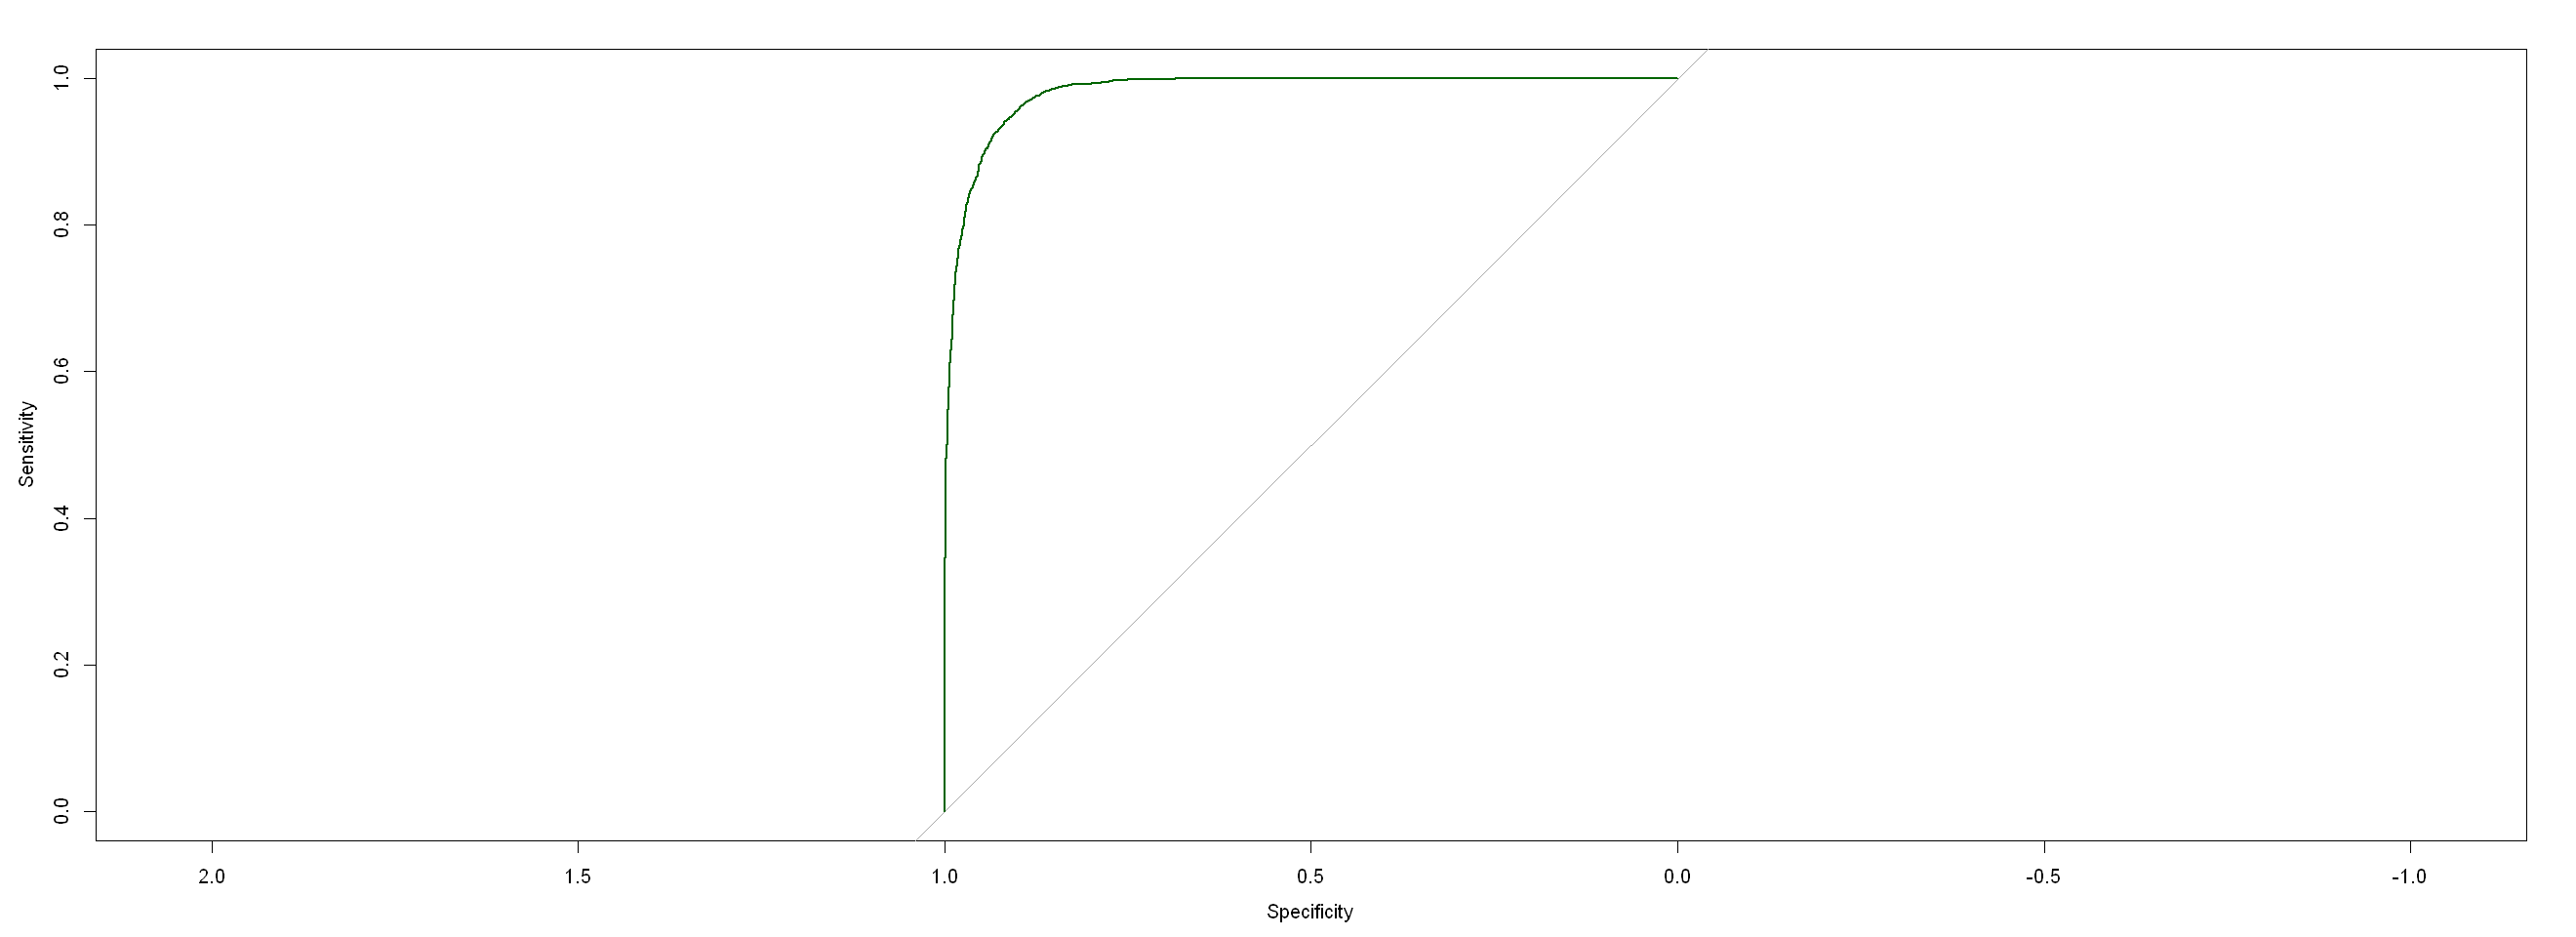

In [126]:
library(pROC)
roc_obj <- roc(datos_m$Incumplido_dummy, datos_m$prob_incumplimiento)
auc(roc_obj)
plot(roc_obj, col = "darkgreen")


Con un AUC > 0.7 ya indica un modelo útil para segmentación. 

**Conclusión:** Se entrenó un modelo Lineal Generalizado con respuesta binomial  (y funcion de enlace Logit), para estimar la probabilidad de incumplimiento a partir de las variables ingresos mensuales, cupo aprobado y score crediticio TU.
Con base en las probabilidades predichas, los clientes fueron clasificados en tres perfiles de riesgo (bajo, medio y alto). A partir de estos grupos se propusieron límites máximos de cupo en función del nivel de riesgo, buscando equilibrar la rentabilidad con la exposición al incumplimiento.

## 3 Cobranzas

Considerando que el el equipo de cobranzas busca entender qué perfiles presentan mayor riesgo de incumplimiento y cómo optimizar la gestión. Se tiene el modelo Lineal Genralizado descrito anteriormente, 
que permite predecir la probabilidad de incumplimiento (Incumplido_dummy) a partir de variables de solicitud (ingresos, cupo aprobado, score TU) y sus interacciones. En otras palabras se está identificando perfiles con riesgo de incumplimiento.

El equipo de cobranzas desea usar estos resultados para tomar desiciones estratégicas que podrían estár encacminadas a:

* Criterios de aprobación actuales generan cartera sana.
* ¿Qué perfiles necesitan estrategias de cobranza diferenciadas?

El modelo establece estimacione de parámetros significativos, esto queire decir que estadísticamente hablando se tienen variables y parámetros significativos en la cartera para pdoer establecer un riesgo al incumplimiento de una servicio financiero. los parámetros estimados son significativos con siggnos dominantes lo cual indica relaciones fuertes:

**Inteeracciones negativas:**

* Ingresos_mensuales
    * Negativo (-) 
        * A mayor ingreso, menor probabilidad de incumplir.
        
* Cupo_aprobado
    * Negativo (-)
        * A mayor cupo aprobado, menor riesgo de incumplir (posiblemente se aprueba más a perfiles confiables).
        
* score_TU
    * Negativo (-)
        * A mayor score de crédito, menor riesgo de incumplir (es la relación esperada).


**Interacciones positivas** 

* (Ingresos_mensuales:Cupo_aprobado, etc.)
    * Positivas (+)
        * El efecto combinado de altos ingresos + alto cupo o altos scores puede no ser lineal; en algunos niveles puede aumentar el riesgo si hay sobreendeudamiento.




* El perfil más riesgoso: son los clientes con bajos ingresos, bajo score TU y cupos aprobados relativamente altos respecto a sus ingresos.
* El perfil más sano: altos ingresos, buen score TU y cupos relativamente moderados o no tan altos.

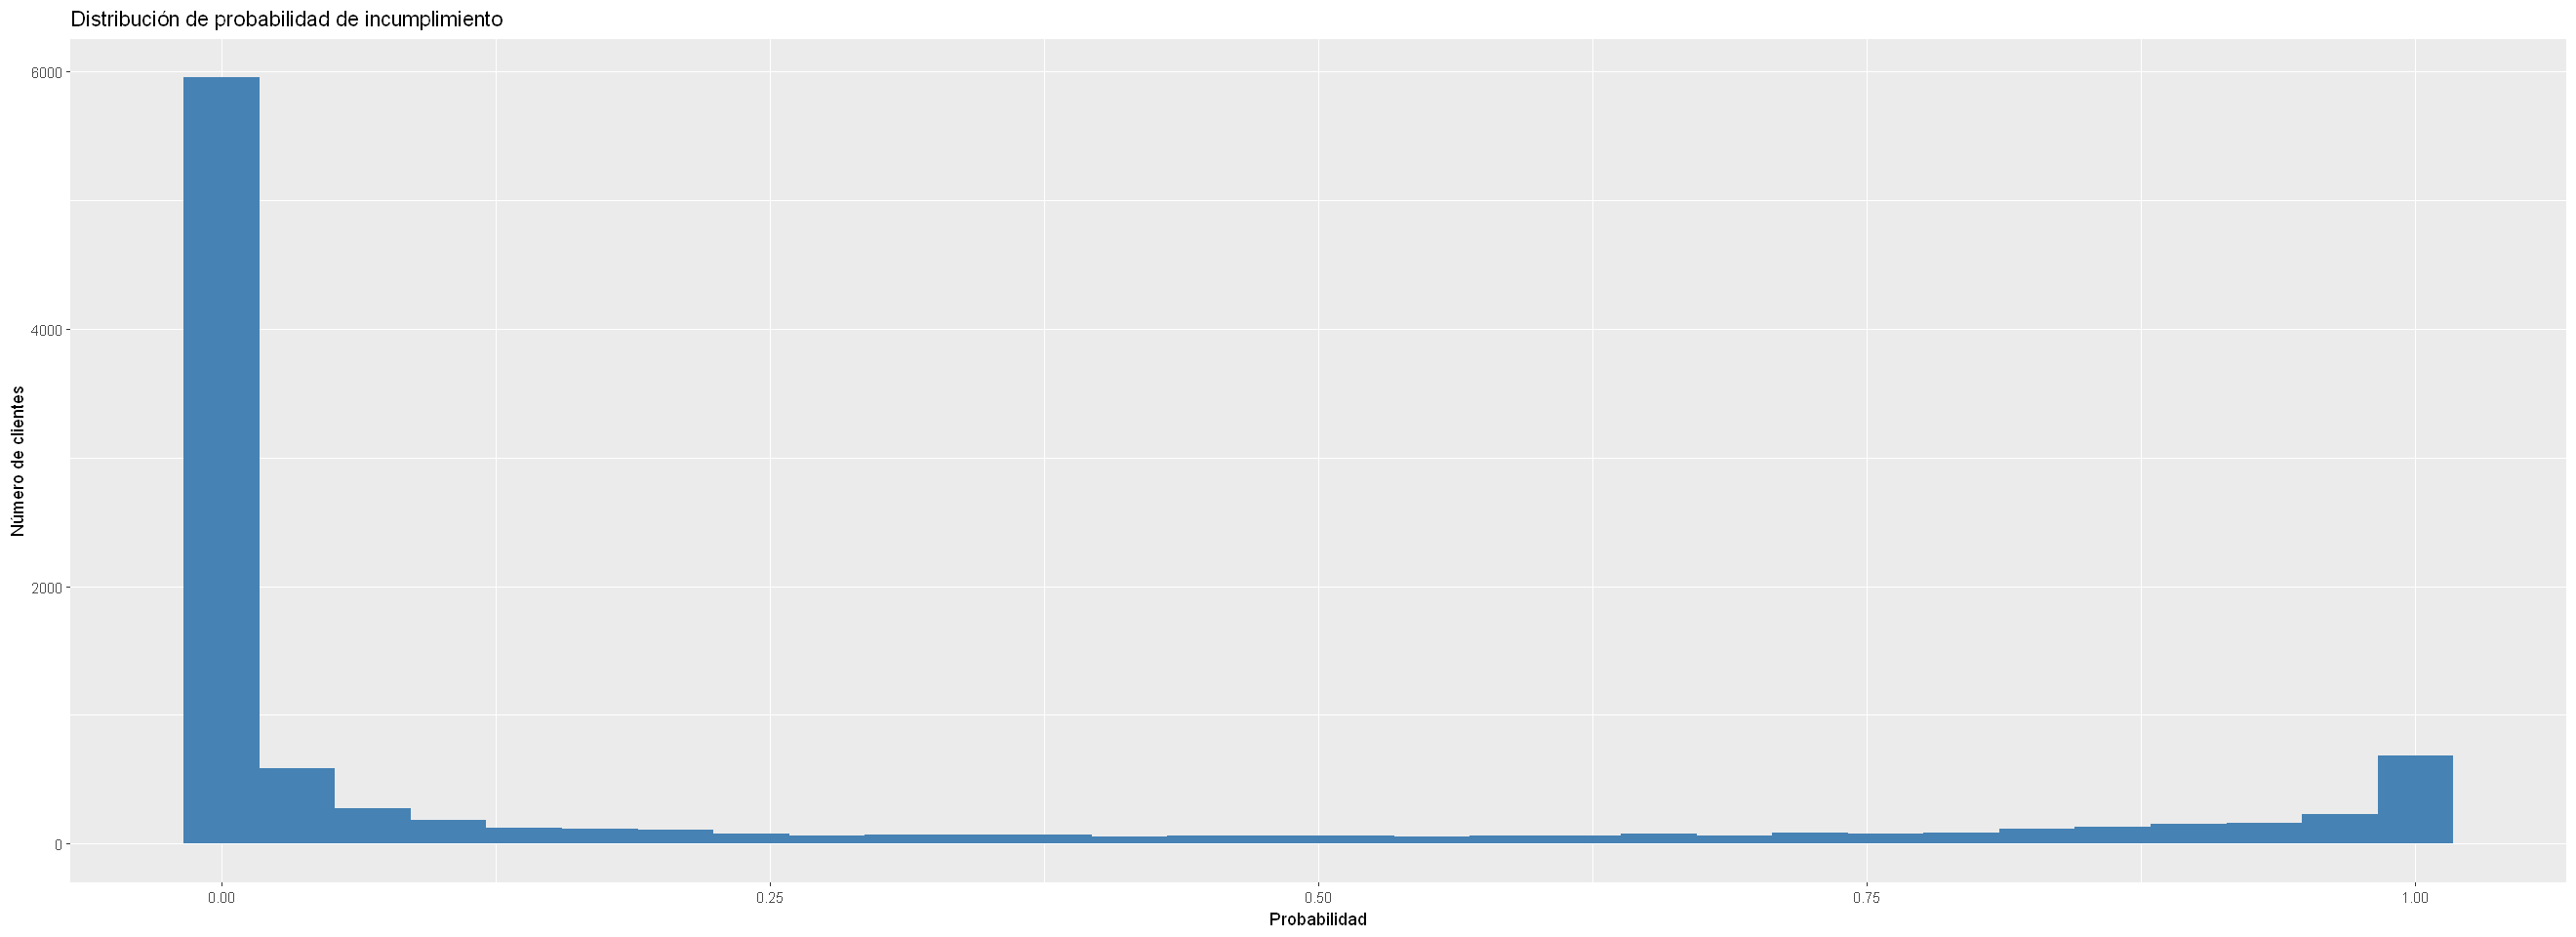

In [129]:
ggplot(datos_m, aes(x = prob_incumplimiento)) +
  geom_histogram(fill = "steelblue", bins = 30) +
  labs(title = "Distribución de probabilidad de incumplimiento", x = "Probabilidad", y = "Número de clientes")


Creeando un segmento de riesgo de forma automática con base en la probabilidad de incumplimiento del modelo:

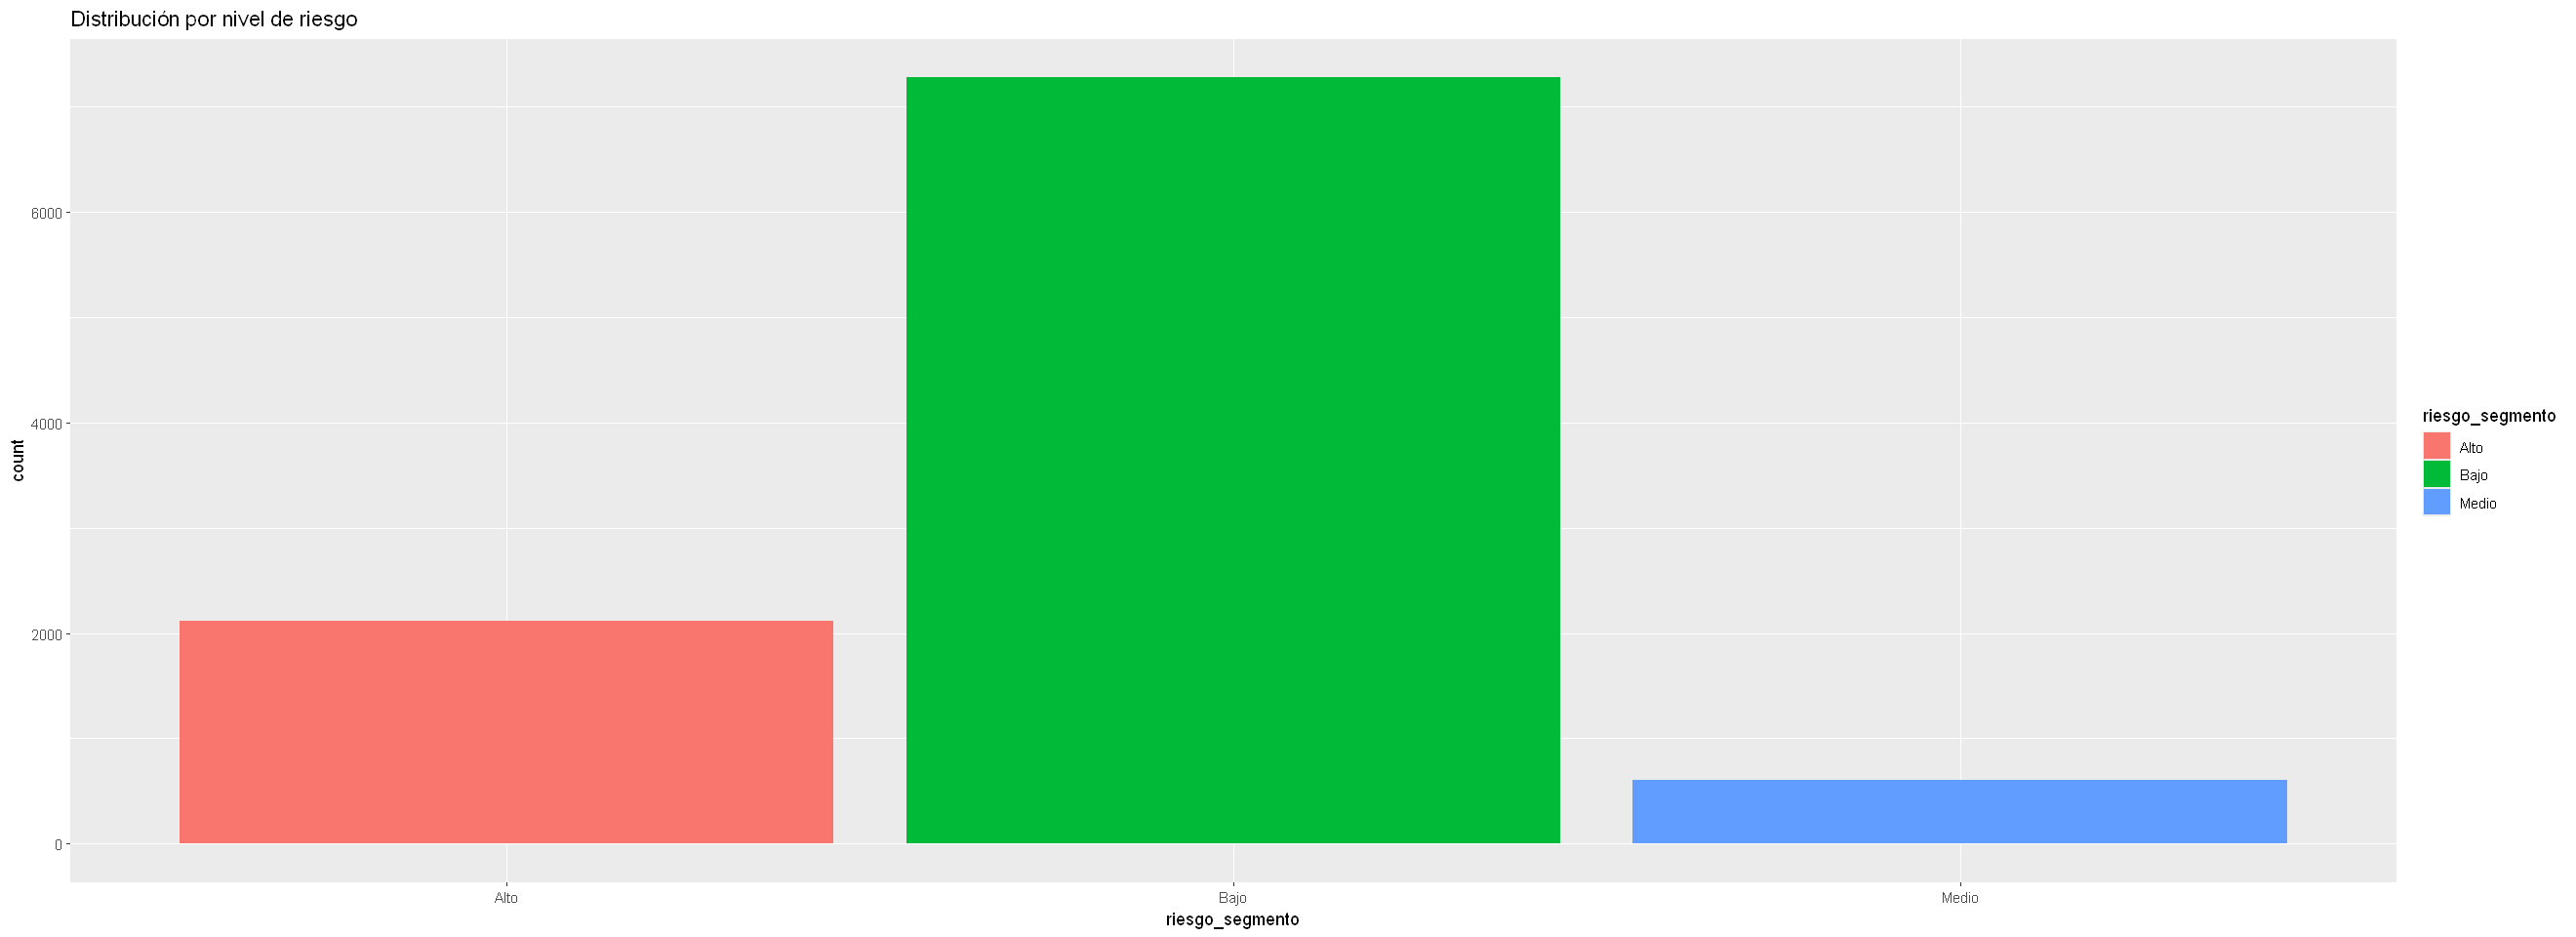

In [134]:
datos2 <- datos_m %>%
  mutate(riesgo_segmento = case_when(
    prob_incumplimiento < 0.2 ~ "Bajo",
    prob_incumplimiento < 0.5 ~ "Medio",
    TRUE ~ "Alto"
  ))

ggplot(datos2, aes(x = riesgo_segmento, fill = riesgo_segmento)) +
  geom_bar() +
  labs(title = "Distribución por nivel de riesgo")

In [137]:
table(datos2$riesgo_segmento, datos2$Canal_cobranza)
table(datos2$riesgo_segmento, datos2$Resultado_cobranza)


       
        Call center Correo Ninguno  SMS Whatsapp
  Alto          373    344     767  320      312
  Bajo          191    196    6470  197      225
  Medio          64     46     414   35       44

       
        Pago parcial Promesa de pago No contactado No aplica Sin gestión
  Alto           410             434           423       423         426
  Bajo           274             256           241      6268         240
  Medio           69              51            55       374          54

El anterior resultado es una buena exploración para entender como se está comportando los canales y los resultados de cobranza según el riesgo del cleinte.

* Primera tabla:

    * Los clientes de riesgo bajo están concentrados en “Ninguno” (6470 casos), lo cual sugiere que no se gestionan tanto porque no incumplen o están al día.
    * En cambio, los de riesgo alto y medio tienen más proporción en “Call center”, “Correo”, “SMS”, etc., lo cual coincide con mayor necesidad de gestión.

* Segunda tabla:
    * Los de riesgo alto tienen muchos registros en “Pago parcial”, “Promesa de pago” y “Sin gestión”.
    * Los de riesgo bajo muestran un gran volumen en “No aplica”, lo cual refuerza que muchos de ellos no están en procesos de cobranza activa.



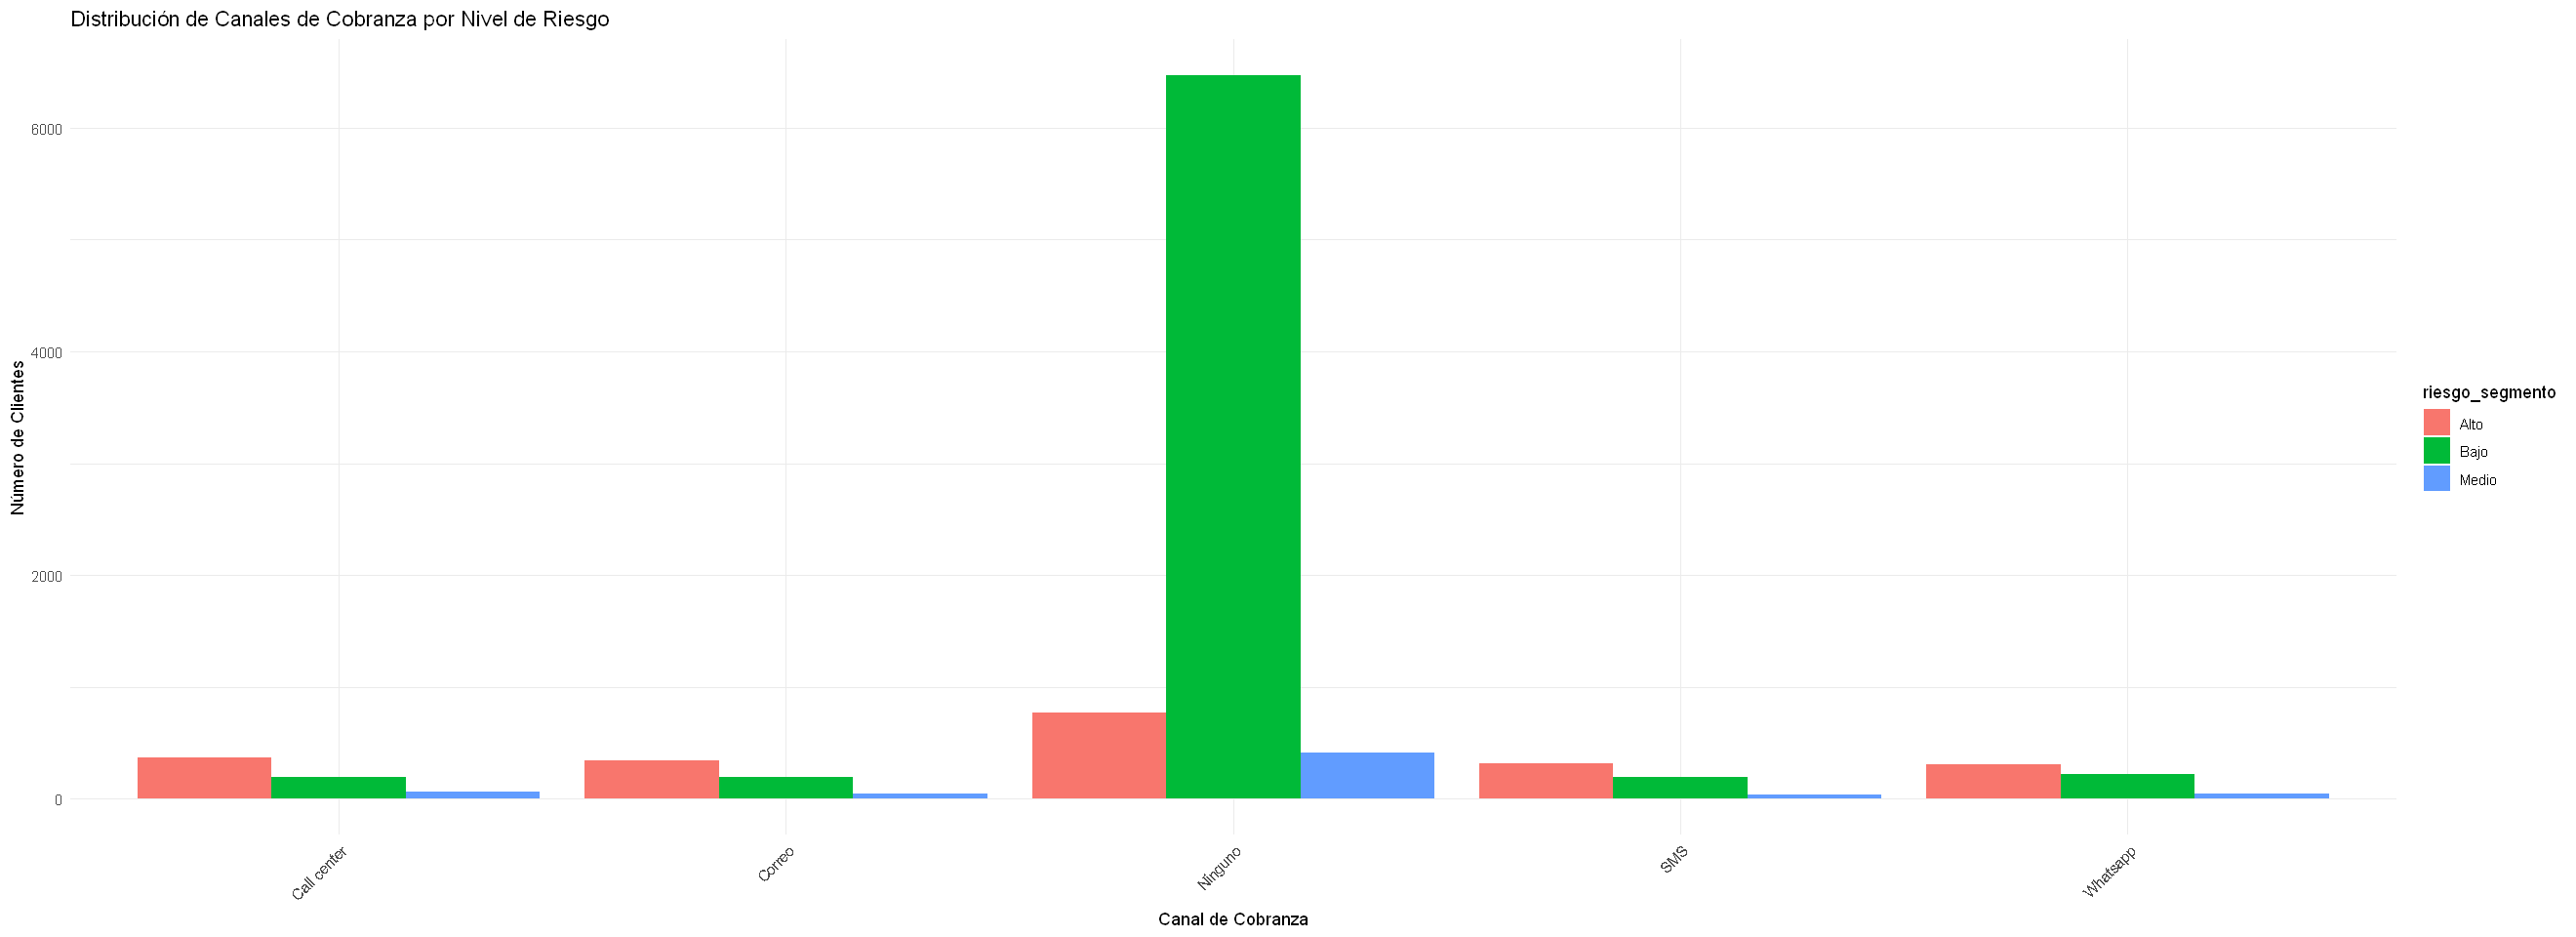

In [138]:
library(ggplot2)
library(dplyr)

# Canal de cobranza
datos2 %>%
  count(riesgo_segmento, Canal_cobranza) %>%
  ggplot(aes(x = Canal_cobranza, y = n, fill = riesgo_segmento)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Distribución de Canales de Cobranza por Nivel de Riesgo",
       x = "Canal de Cobranza", y = "Número de Clientes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

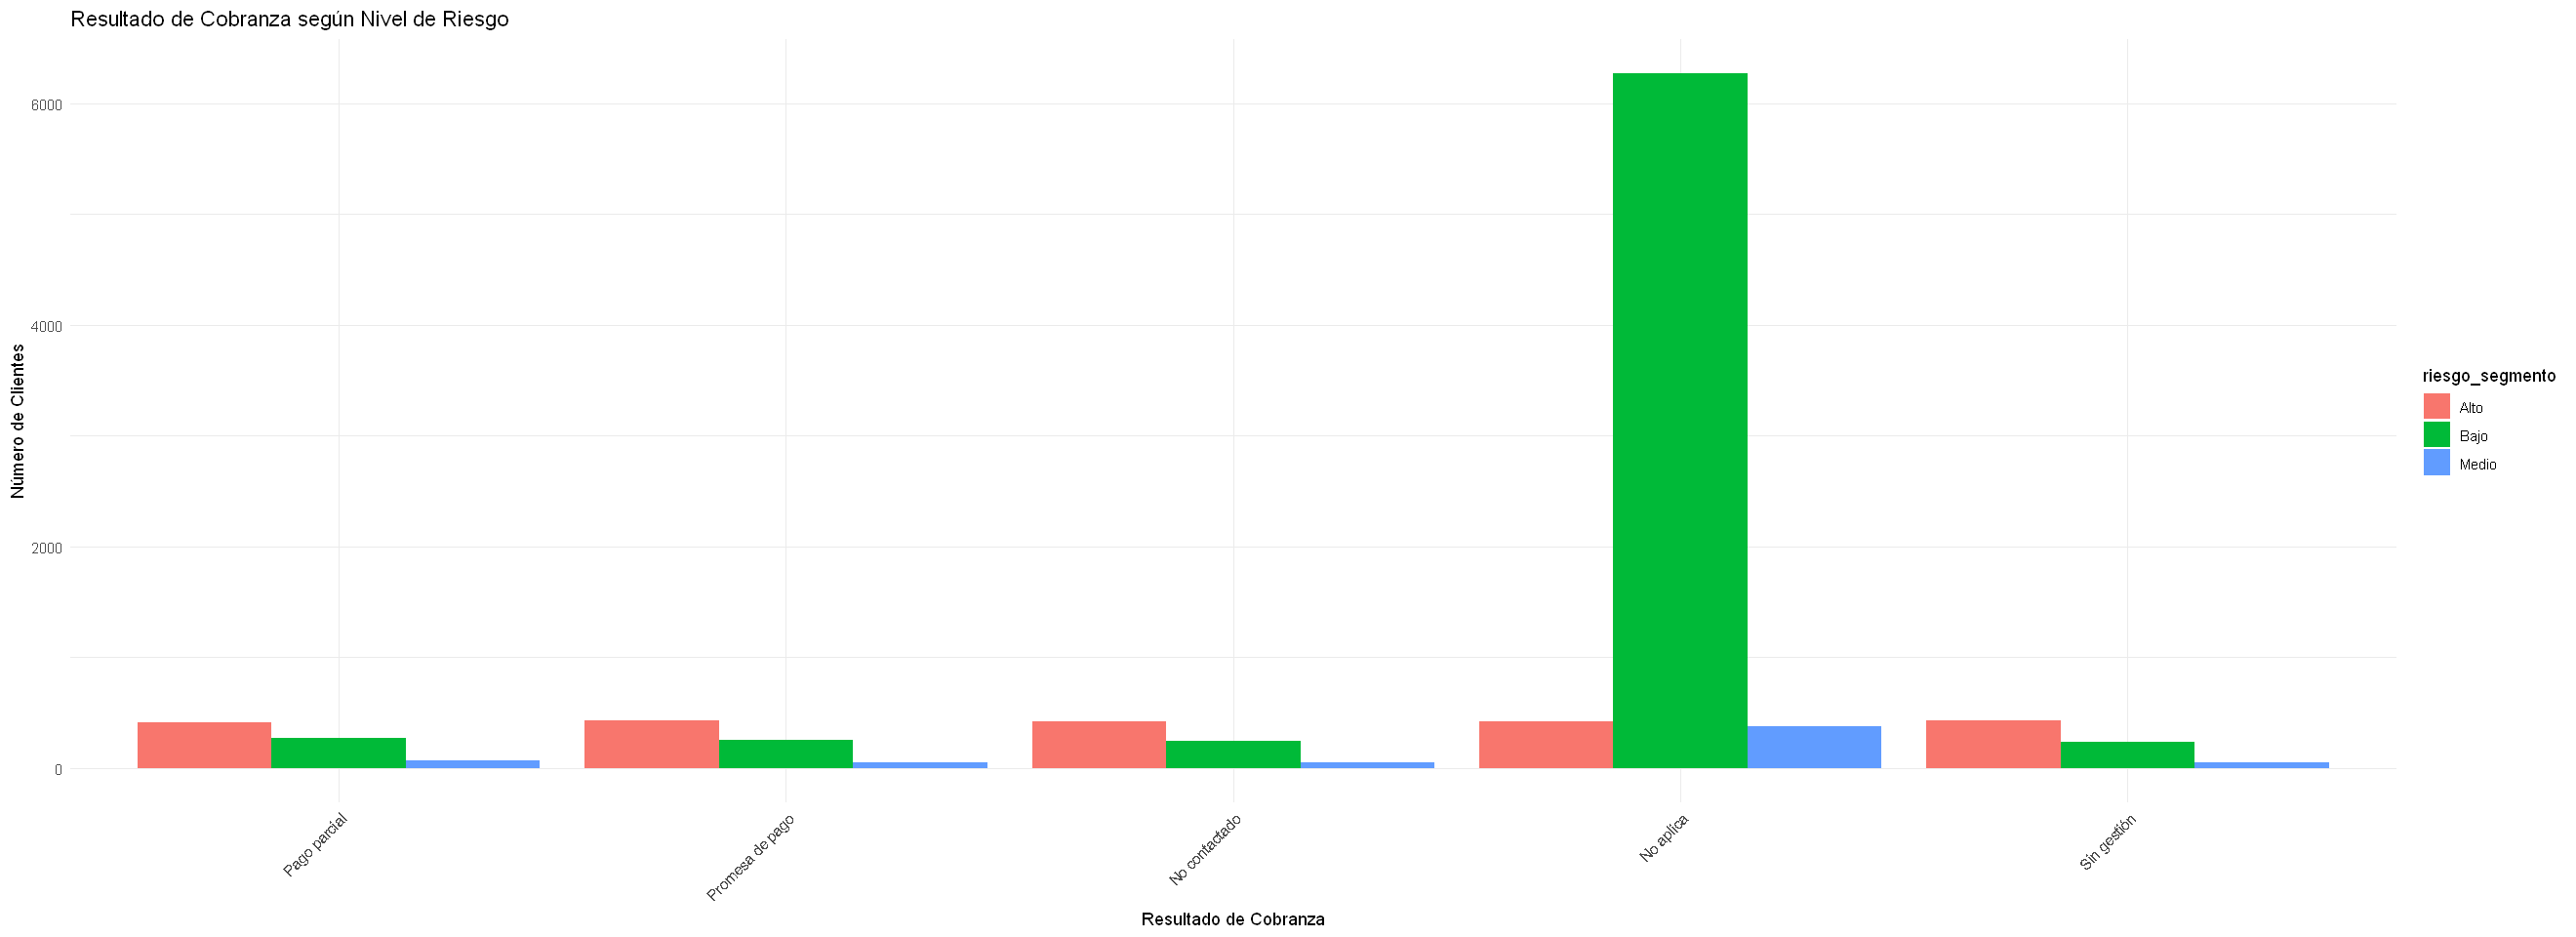

In [139]:
datos2 %>%
  count(riesgo_segmento, Resultado_cobranza) %>%
  ggplot(aes(x = Resultado_cobranza, y = n, fill = riesgo_segmento)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Resultado de Cobranza según Nivel de Riesgo",
       x = "Resultado de Cobranza", y = "Número de Clientes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Estrategia de cobranza por nivel de riesgo

* Riesgo Bajo

    Perfil: Clientes cumplidos, scores altos.
   
    Hallazgo: Mayoría sin gestión activa (“Ninguno”, “No aplica”).
    
    Estrategia:

        Recordatorios automáticos (correo/SMS), posiblemente sea un aspecto a considerar y que es visto en el conjunto de datos.
        Fidelización y beneficios por pago oportuno.
        Monitoreo que se base en lo preventivo.

* Riesgo Medio

    Perfil: Riesgo moderado,.

    Hallazgo:  uso de SMS/Correo.

    Estrategia:

        Seguimiento de promesas.
        Ofrecer planes flexibles.
        Priorización con base en score.

* Riesgo Alto

    Perfil: Alta probabilidad de mora, bajo score o cupo alto.

    Hallazgo: “Sin gestión”, concentrados en call center.

    Estrategia:

        Gestión intensiva (llamadas y WhatsApp).
        Acuerdos de pago o descuentos por pronto pago.

In [143]:
#install.packages("pROC", repos = "https://cloud.r-project.org/")